In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta

import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving QUIMIO_MAIS60_FILTRADO.csv to QUIMIO_MAIS60_FILTRADO.csv


As bases de dados são bem grandes, por isso iremos fazer uma parte do tratamento delas por código. O objetivo dessa parte é realizar o agrupamento por mês dos dados.
Para executar esse colab você deve subir os arquivos com os dados para o ambiente de execução do colab.

# Leitura dos arquivos de dados

Esse dataset ja foi aplicado o filtro de sexo, selecionando apenas o sexo femininio e tambem o filtro na coluna AP_PRIPAL e apenas registros com idade maior que 60 anos, pegando apenas os procedimentos que são aplicados ao nosso problema.


In [ ]:
#IREMOS UTILIZAR O ARQUIVO FILTRADO
df_Original = pd.read_csv('QUIMIO_MAIS60_FILTRADO.csv')
df_Original.shape
#(1790600, 12)

(1790600, 12)

In [ ]:
df_Original.QTD.sum()
#3618640

3618640

Listando os 5 primeiros registros do dataset

In [ ]:
df_Original.head()
df_2 = df_Original.copy()
df_2 =df_2.rename({'Unnamed: 0':'Idx'}, axis='columns')
df_2.head()


Idx  AP_NUIDADE  AP_TPAPAC AP_CIDPRI  ...     DTSOLIC METASTATICO   ANO  QTD
0    0          60          1      C500  ...  30/04/2018         0.0  2018    1
1    1          60          1      C500  ...  31/07/2018         0.0  2018    1
2    2          60          1      C500  ...  31/05/2018         1.0  2018    1
3    3          60          1      C500  ...  31/03/2019         0.0  2019    1
4    4          60          1      C500  ...  31/12/2018         0.0  2018    1

[5 rows x 12 columns]

In [ ]:
df_agrupado = df_2.sort_values(by=['DTSOLIC']).groupby(["DTSOLIC",'METASTATICO'], as_index=False, dropna=False)['QTD'].sum()
df_agrupado.head()

DTSOLIC  METASTATICO    QTD
0  28/02/2017          0.0  36754
1  28/02/2017          1.0  12858
2  28/02/2018          0.0  43443
3  28/02/2018          1.0  14116
4  28/02/2019          0.0  47537

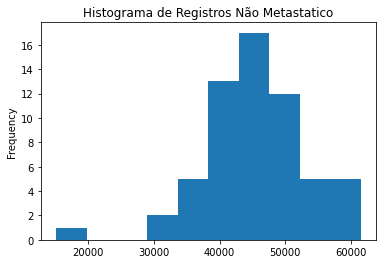

In [ ]:
#Histograma dos dados agrupados por mes/ano
df_agrupado.QTD[df_agrupado['METASTATICO']==0].plot.hist(title='Histograma de Registros Não Metastatico')

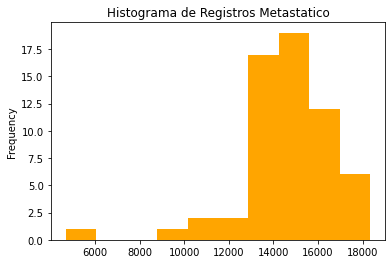

In [ ]:
df_agrupado.QTD[df_agrupado['METASTATICO']==1].plot.hist(title='Histograma de Registros Metastatico', color='orange')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Não Metastatico')

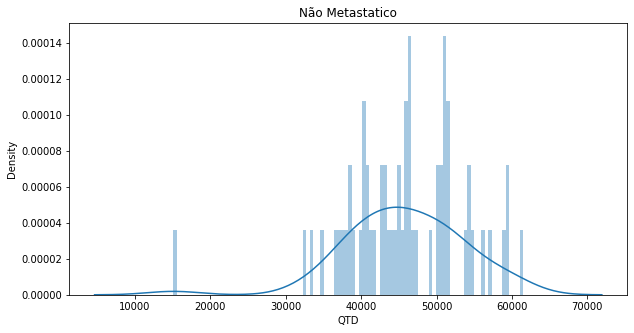

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
sns.distplot(df_agrupado.QTD[df_agrupado['METASTATICO']==0], bins=100, ax=ax1).set_title('Não Metastatico')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Metastatico')

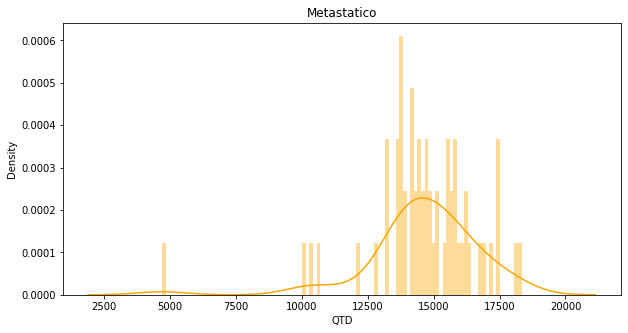

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
sns.distplot(df_agrupado.QTD[df_agrupado['METASTATICO']==1], bins=100, ax=ax1, color='orange').set_title('Metastatico')



In [ ]:
# média
#Histograma dos dados agrupados por mes/ano
print('***** Não Metastatico ***')
print('Média: ', df_agrupado.QTD[df_agrupado['METASTATICO']==0].mean())
print('Min: ', df_agrupado.QTD[df_agrupado['METASTATICO']==0].min())
print('Max: ', df_agrupado.QTD[df_agrupado['METASTATICO']==0].max())
print('***** Metastatico ***')
print('Média: ', df_agrupado.QTD[df_agrupado['METASTATICO']==1].mean())
print('Min: ', df_agrupado.QTD[df_agrupado['METASTATICO']==1].min())
print('Max: ', df_agrupado.QTD[df_agrupado['METASTATICO']==1].max())


***** Não Metastatico ***
Média:  45704.35
Min:  15094
Max:  61473
***** Metastatico ***
Média:  14606.316666666668
Min:  4690
Max:  18338


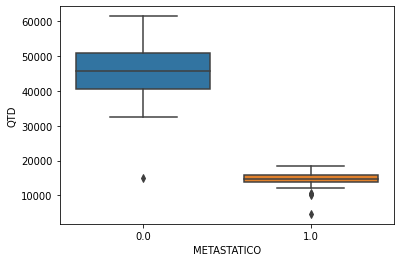

In [ ]:
sns.boxplot(x='METASTATICO', y='QTD', data=df_agrupado)

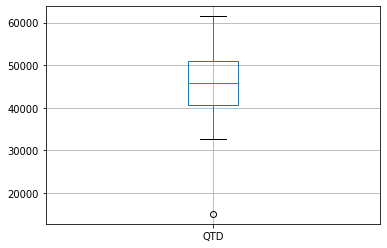

In [ ]:
df_agrupado[df_agrupado['METASTATICO']==0].boxplot(column=['QTD'])

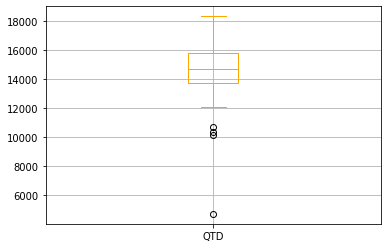

In [ ]:
df_agrupado[df_agrupado['METASTATICO']==1].boxplot(column=['QTD'], color='orange')

Esta é uma função que facilita a visualização dos dados. Essa função vai receber o dataframe como parametro e vai listar o nome da coluna, o tipo dos seues dados, o nº de dados unicos, a quantidade de registros, e a quantidade de dados missing, e o % de missing.

In [ ]:
def infoDf(df):
    info_df = pd.DataFrame({ 'Columns': df.columns,
                        'Type': df.dtypes,
                        'Unique': df.nunique(),                        
                        'Size': df.shape[0],
                        'Missing': df.isna().sum()    
    })
    info_df['% Unique'] = round(info_df['Unique']/info_df['Size'] ,3)
    info_df['% Missing'] = round(info_df['Missing']/info_df['Size'] ,3)
    return info_df

In [ ]:
#missing data
def missingData(df, num=20):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data.head(num)

In [ ]:
# Execução da função passando o dataframe com parametro
infoDf(df_2)

Columns     Type   Unique  ...  Missing  % Unique  % Missing
Idx                  Idx    int64  1790600  ...        0     1.000      0.000
AP_NUIDADE    AP_NUIDADE    int64       40  ...        0     0.000      0.000
AP_TPAPAC      AP_TPAPAC    int64        2  ...        0     0.000      0.000
AP_CIDPRI      AP_CIDPRI   object        9  ...        0     0.000      0.000
AQ_ESTADI      AQ_ESTADI  float64        5  ...        0     0.000      0.000
AQ_ESQU_P2    AQ_ESQU_P2   object    12776  ...   364842     0.007      0.204
ESTADO_UF      ESTADO_UF   object       27  ...        0     0.000      0.000
MAIOR_60        MAIOR_60    int64        1  ...        0     0.000      0.000
DTSOLIC          DTSOLIC   object       60  ...        0     0.000      0.000
METASTATICO  METASTATICO  float64        2  ...        0     0.000      0.000
ANO                  ANO    int64        5  ...        0     0.000      0.000
QTD                  QTD    int64       60  ...        0     0.000      0.000

[12 rows x 7 columns]

In [ ]:
df_2.QTD[df_2.AQ_ESQU_P2.isna() == True].sum()
print(df_2.QTD[df_2.AQ_ESQU_P2.isna() == True].sum(), df_2.QTD.sum())
df_2.QTD[df_2.AQ_ESQU_P2.isna() == True].sum() /  df_2.QTD.sum()

864289 3618640


0.2388435987000641

In [ ]:
missingData(df_2, num=4)

Total   Percent
AQ_ESQU_P2   364842  0.203754
QTD               0  0.000000
ANO               0  0.000000
METASTATICO       0  0.000000

In [ ]:
df_2.describe()

Idx    AP_NUIDADE  ...           ANO           QTD
count  1.790600e+06  1.790600e+06  ...  1.790600e+06  1.790600e+06
mean   8.952995e+05  7.063875e+01  ...  2.018107e+03  2.020909e+00
std    5.169018e+05  8.003976e+00  ...  1.409551e+00  1.899807e+00
min    0.000000e+00  6.000000e+01  ...  2.016000e+03  1.000000e+00
25%    4.476498e+05  6.400000e+01  ...  2.017000e+03  1.000000e+00
50%    8.952995e+05  6.900000e+01  ...  2.018000e+03  2.000000e+00
75%    1.342949e+06  7.600000e+01  ...  2.019000e+03  2.000000e+00
max    1.790599e+06  9.900000e+01  ...  2.020000e+03  6.700000e+01

[8 rows x 8 columns]

A código acima mostrar algumas informaçõese estatisticas do dataset, conseguimos visualizar as informações de quantidade de registros (count), média (mean), devio padrão (std), valor minimo e valor maxima (min e max), valor inicial do segundo quadrante (25%), valor inicial do terceiro quadrante (50%), valor inicio do quarto quadrante (75%).
Esse valores de quadrante são melhor visualizados e entendidos utilizando o boxplot.

# Construindo a tabela de frequencia

In [ ]:
# inicialmente vamos testar criando 5 classes de dados e vamos ver se nos atende.
k = 4
idade_inferior = df_2.AP_NUIDADE.min()
idade_superior = df_2.AP_NUIDADE.max()
amplitude = idade_superior - idade_inferior
largura = round(amplitude / k)
print(idade_inferior, idade_superior , largura)

60 99 10


In [ ]:
idades_freq = pd.DataFrame([
  ["60 - 70", df_2.QTD[(df_2.AP_NUIDADE < 70) & (df_2.METASTATICO == 0)].sum(), 0],
  ["60 - 70", df_2.QTD[(df_2.AP_NUIDADE < 70) & (df_2.METASTATICO == 1)].sum(), 1],
  ["70 - 80", df_2.QTD[((df_2.AP_NUIDADE >= 70) & (df_2.AP_NUIDADE < 80) & (df_2.METASTATICO == 0))].sum(), 0],
  ["70 - 80", df_2.QTD[((df_2.AP_NUIDADE >= 70) & (df_2.AP_NUIDADE < 80) & (df_2.METASTATICO == 1))].sum(), 1],
  ["80 - 90", df_2.QTD[((df_2.AP_NUIDADE >= 80) & (df_2.AP_NUIDADE < 90) & (df_2.METASTATICO == 0))].sum(), 0],
  ["80 - 90", df_2.QTD[((df_2.AP_NUIDADE >= 80) & (df_2.AP_NUIDADE < 90) & (df_2.METASTATICO == 1))].sum(), 1],
  ["90 - 100", df_2.QTD[((df_2.AP_NUIDADE >= 90) & (df_2.METASTATICO == 0))].sum(), 0],
  ["90 - 100", df_2.QTD[((df_2.AP_NUIDADE >= 90) & (df_2.METASTATICO == 1))].sum(), 1]
  
], columns=['Idade','Qtd','Metastatico'])

idades_freq['%freq'] = (idades_freq['Qtd'] / idades_freq['Qtd'].sum())*100
idades_freq

Idade      Qtd  Metastatico      %freq
0   60 - 70  1570129            0  43.390031
1   60 - 70   446343            1  12.334551
2   70 - 80   870509            0  24.056248
3   70 - 80   275995            1   7.627037
4   80 - 90   273759            0   7.565246
5   80 - 90   127715            1   3.529365
6  90 - 100    27864            0   0.770013
7  90 - 100    26326            1   0.727511

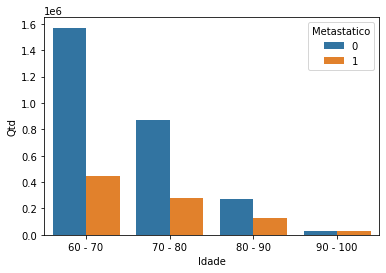

In [ ]:
sns.barplot(x=idades_freq.Idade, y=idades_freq.Qtd, hue=idades_freq.Metastatico)

# Quantidade de Registro por Estado

In [ ]:
#df_2.groupby(['ESTADO_UF','METASTATICO'], as_index=False, dropna=False)['QTD'].sum().sort_values(by='ESTADO_UF',ascending=True)

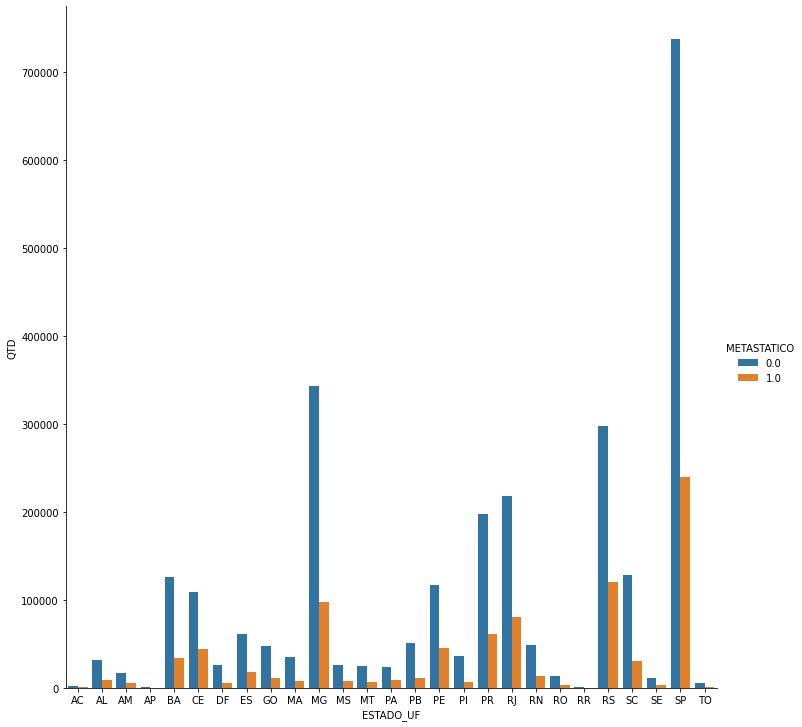

In [ ]:
df01 = df_2.groupby(['ESTADO_UF','METASTATICO'], as_index=False, dropna=False)['QTD'].sum()

sns.catplot(x="ESTADO_UF", y="QTD", hue="METASTATICO", data=df01, kind="bar", height=10)

# Ano

Precisamos olhar como esta distribuido nossos dados em relação aos meses e anos, mas antes disso precisamos ver como os dados de datas estão. Vamos analisar esses dados agora

In [ ]:
# Apenas para visualização, aqui temos todos os anos existentes.
df02 = df_2.groupby(['ANO','METASTATICO'], as_index=False, dropna=False)['QTD'].sum()
df02['ANO'].unique()

array([2016, 2017, 2018, 2019, 2020])

In [ ]:
df02

ANO  METASTATICO     QTD
0  2016          0.0  487259
1  2016          1.0  169623
2  2017          0.0  478585
3  2017          1.0  158541
4  2018          0.0  572911
5  2018          1.0  181695
6  2019          0.0  603852
7  2019          1.0  187116
8  2020          0.0  599654
9  2020          1.0  179404

In [ ]:
print('Média de Todos os anos:', df_2.groupby('ANO')['QTD'].sum().mean())
print('Média de Todos os anos Metastatico=Sim:', df02.QTD[df02.METASTATICO==0].sum().mean())
print('Média de Todos os anos Metastatico=Não:', df02.QTD[df02.METASTATICO==1].sum().mean())


Média de Todos os anos: 723728.0
Média de Todos os anos Metastatico=Sim: 2742261.0
Média de Todos os anos Metastatico=Não: 876379.0


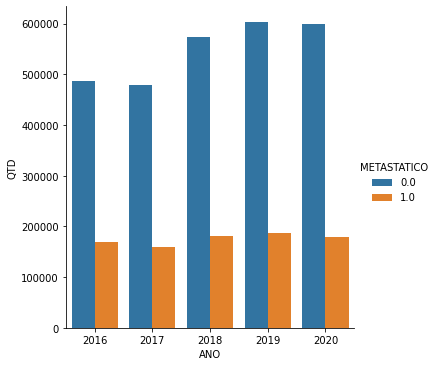

In [ ]:
# Gráfico de Barra com o numero de registro por ANO.
sns.catplot(x="ANO", y="QTD", hue="METASTATICO", data=df02, kind="bar", height=5)

In [ ]:
df_variacao = pd.DataFrame(columns=['Ano','Metastatico', 'Qtd','Variacao'])
i=0
for ano in df02.ANO.unique():
  for meta in df02.METASTATICO.unique():
    anoAtual = df02.QTD[(df02.ANO == ano) & (df02.METASTATICO == meta)].sum()
    anoAnterior = df02.QTD[(df02.ANO == ano-1) & (df02.METASTATICO == meta)].sum()
    variacao = 0
    if anoAnterior != 0 and anoAtual != 0:
      variacao = ((anoAtual / anoAnterior)-1) * 100
    elif anoAnterior != 0 and anoAtual == 0:
      variacao = -100
    else:
      variacao = 0

    vet = [str(ano), meta, anoAtual, variacao]

    df_variacao.loc[i] = vet
    i+=1
df_variacao


Ano  Metastatico     Qtd  Variacao
0  2016          0.0  487259         0
1  2016          1.0  169623         0
2  2017          0.0  478585  -1.78016
3  2017          1.0  158541  -6.53331
4  2018          0.0  572911   19.7094
5  2018          1.0  181695   14.6044
6  2019          0.0  603852   5.40066
7  2019          1.0  187116   2.98357
8  2020          0.0  599654 -0.695203
9  2020          1.0  179404  -4.12151

(<seaborn.axisgrid.FacetGrid at 0x7f56e017f890>,
 <seaborn.axisgrid.FacetGrid at 0x7f56e01d5110>)

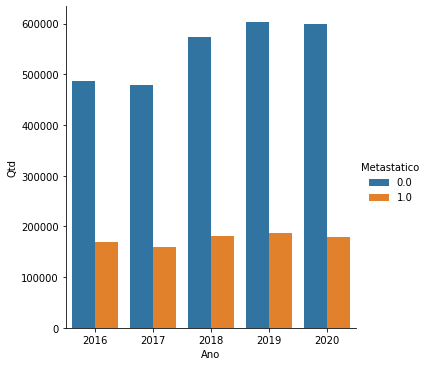

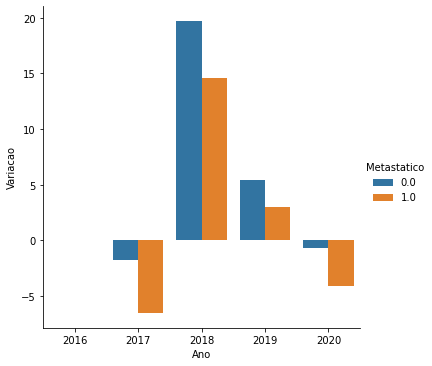

In [ ]:
# Quantidade de Registros por Ano
sns.catplot(x="Ano", y='Qtd', hue="Metastatico", data=df_variacao, kind="bar", height=5), sns.catplot(x="Ano", y='Variacao', hue="Metastatico", data=df_variacao, kind="bar", height=5)

# AP_TPAPAC - Indica se a APAC é 1 – inicial, 2 – continuidade, 3 – única

In [ ]:
df_2.AP_TPAPAC.unique()

array([1, 2])

In [ ]:
df_2.groupby(['AP_TPAPAC','METASTATICO'], as_index=False, dropna=False)['QTD'].sum()

AP_TPAPAC  METASTATICO      QTD
0          1          0.0   958913
1          1          1.0   313469
2          2          0.0  1783348
3          2          1.0   562910

In [ ]:
# Apenas para visualização, aqui temos todos os anos existentes.
df_03 = df_2.groupby(['ANO','AP_TPAPAC','METASTATICO'], as_index=False, dropna=False)['QTD'].sum()
df_03

ANO  AP_TPAPAC  METASTATICO     QTD
0   2016          1          0.0  167756
1   2016          1          1.0   59681
2   2016          2          0.0  319503
3   2016          2          1.0  109942
4   2017          1          0.0  164258
5   2017          1          1.0   56020
6   2017          2          0.0  314327
7   2017          2          1.0  102521
8   2018          1          0.0  197524
9   2018          1          1.0   64273
10  2018          2          0.0  375387
11  2018          2          1.0  117422
12  2019          1          0.0  208127
13  2019          1          1.0   65997
14  2019          2          0.0  395725
15  2019          2          1.0  121119
16  2020          1          0.0  221248
17  2020          1          1.0   67498
18  2020          2          0.0  378406
19  2020          2          1.0  111906

In [ ]:
df_var_03 = pd.DataFrame(columns=['Ano','Ap_Tpapac','Metastatico', 'Qtd','Variacao'])
i=0
for ano in df_03.ANO.unique():
  for meta in df_03.METASTATICO.unique():
    for tpapac in df_03.AP_TPAPAC.unique():
      anoAtual = df_03.QTD[(df_03.ANO == ano) & (df_03.METASTATICO == meta)& (df_03.AP_TPAPAC == tpapac)].sum()
      anoAnterior = df_03.QTD[(df_03.ANO == ano-1) & (df_03.METASTATICO == meta) & (df_03.AP_TPAPAC == tpapac)].sum()
      variacao = 0
      if anoAnterior != 0 and anoAtual != 0:
        variacao = ((anoAtual / anoAnterior)-1) * 100
      elif anoAnterior != 0 and anoAtual == 0:
        variacao = -100
      else:
        variacao = 0

      vet = [str(ano), tpapac, meta, anoAtual, variacao]

      df_var_03.loc[i] = vet
      i+=1
df_var_03




Ano Ap_Tpapac  Metastatico     Qtd Variacao
0   2016         1          0.0  167756        0
1   2016         2          0.0  319503        0
2   2016         1          1.0   59681        0
3   2016         2          1.0  109942        0
4   2017         1          0.0  164258 -2.08517
5   2017         2          0.0  314327 -1.62002
6   2017         1          1.0   56020 -6.13428
7   2017         2          1.0  102521 -6.74992
8   2018         1          0.0  197524  20.2523
9   2018         2          0.0  375387  19.4256
10  2018         1          1.0   64273  14.7322
11  2018         2          1.0  117422  14.5346
12  2019         1          0.0  208127  5.36796
13  2019         2          0.0  395725  5.41788
14  2019         1          1.0   65997  2.68231
15  2019         2          1.0  121119  3.14847
16  2020         1          0.0  221248  6.30432
17  2020         2          0.0  378406 -4.37652
18  2020         1          1.0   67498  2.27435
19  2020         2          1.0  111906 -7.60657

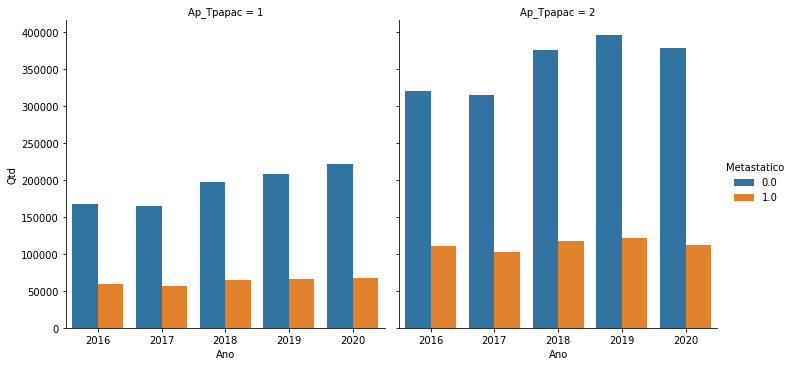

In [ ]:
sns.catplot(x="Ano", y='Qtd', hue="Metastatico",col='Ap_Tpapac', data=df_var_03, kind="bar", ci=0.68, height=5)

# AQ_ESTADI -> Estádio – UICC (0;1;2;3;4)

In [ ]:
# Eu não sei a importancia desse campo, vou fazer a analise apenas dos dados. 
# Sem aplicar nenhuma regra de negócio e nem excluir nenhum registro
df_2.AQ_ESTADI.unique()
# array([0., 1., 2., 3., 4.])

array([0., 1., 2., 3., 4.])

In [ ]:
df_04 = df_2.groupby(['ANO','AQ_ESTADI','METASTATICO'], as_index=False, dropna=False)['QTD'].sum()

In [ ]:
df_04

ANO  AQ_ESTADI  METASTATICO     QTD
0   2016        0.0          0.0    6772
1   2016        0.0          1.0    6034
2   2016        1.0          0.0  151167
3   2016        1.0          1.0   19705
4   2016        2.0          0.0  186491
5   2016        2.0          1.0   43748
6   2016        3.0          0.0  132450
7   2016        3.0          1.0   33805
8   2016        4.0          0.0   10379
9   2016        4.0          1.0   66331
10  2017        0.0          0.0    9582
11  2017        0.0          1.0    6111
12  2017        1.0          0.0  145829
13  2017        1.0          1.0   17546
14  2017        2.0          0.0  184728
15  2017        2.0          1.0   39646
16  2017        3.0          0.0  128104
17  2017        3.0          1.0   32110
18  2017        4.0          0.0   10342
19  2017        4.0          1.0   63128
20  2018        0.0          0.0   12667
21  2018        0.0          1.0    4602
22  2018        1.0          0.0  172358
23  2018        1.0          1.0   20105
24  2018        2.0          0.0  216416
25  2018        2.0          1.0   43766
26  2018        3.0          0.0  155702
27  2018        3.0          1.0   37798
28  2018        4.0          0.0   15768
29  2018        4.0          1.0   75424
30  2019        0.0          0.0   13568
31  2019        0.0          1.0    3968
32  2019        1.0          0.0  178850
33  2019        1.0          1.0   18526
34  2019        2.0          0.0  225517
35  2019        2.0          1.0   43170
36  2019        3.0          0.0  166380
37  2019        3.0          1.0   40632
38  2019        4.0          0.0   19537
39  2019        4.0          1.0   80820
40  2020        0.0          0.0   13710
41  2020        0.0          1.0    4039
42  2020        1.0          0.0  173621
43  2020        1.0          1.0   16255
44  2020        2.0          0.0  224241
45  2020        2.0          1.0   40415
46  2020        3.0          0.0  165813
47  2020        3.0          1.0   37953
48  2020        4.0          0.0   22269
49  2020        4.0          1.0   80742

In [ ]:
df_var_04 = pd.DataFrame(columns=['Ano','Aq_Estadi','Metastatico', 'Qtd','Variacao'])
i=0
for ano in df_04.ANO.unique():
  for meta in df_04.METASTATICO.unique():
    for estadi in df_04.AQ_ESTADI.unique():
      anoAtual = df_04.QTD[(df_04.ANO == ano) & (df_04.METASTATICO == meta)& (df_04.AQ_ESTADI == estadi)].sum()
      anoAnterior = df_04.QTD[(df_04.ANO == ano-1) & (df_04.METASTATICO == meta) & (df_04.AQ_ESTADI == estadi)].sum()
      variacao = 0
      if anoAnterior != 0 and anoAtual != 0:
        variacao = ((anoAtual / anoAnterior)-1) * 100
      elif anoAnterior != 0 and anoAtual == 0:
        variacao = -100
      else:
        variacao = 0

      vet = [str(ano), estadi, meta, anoAtual, variacao]

      df_var_04.loc[i] = vet
      i+=1
#df_var_04

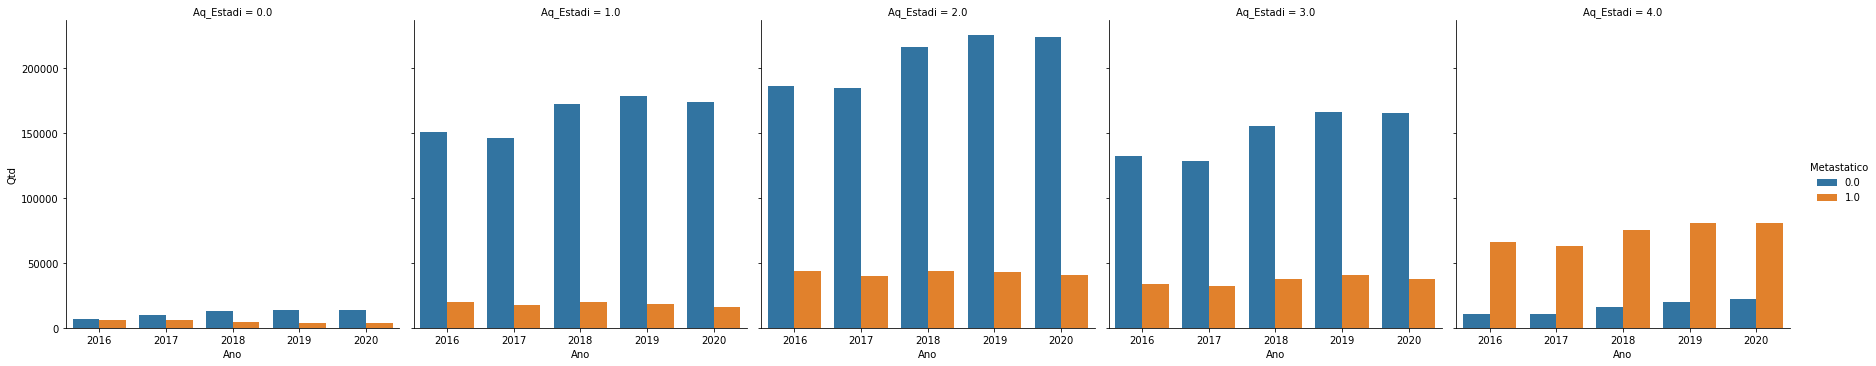

In [ ]:
sns.catplot(x="Ano", y='Qtd', hue="Metastatico",col='Aq_Estadi', data=df_var_04, kind="bar", ci=0.68)

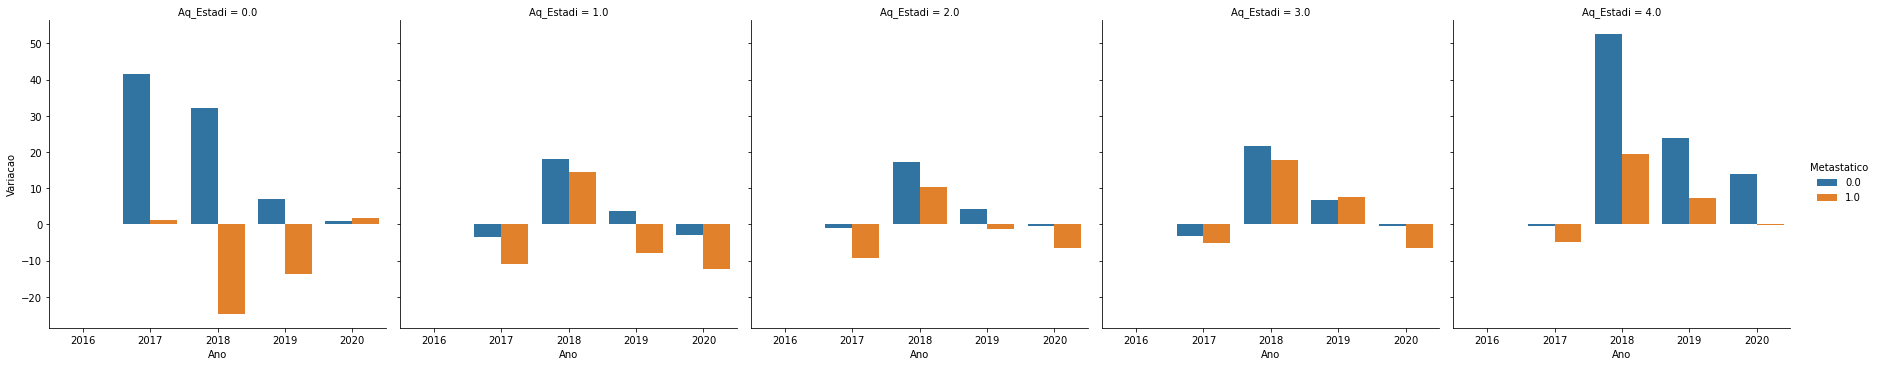

In [ ]:
# Variação
sns.catplot(x="Ano", y='Variacao', hue="Metastatico",col='Aq_Estadi', data=df_var_04, kind="bar", ci=0.68)

# Analise de Toda a Base de Dados por Estado

In [ ]:
df_05 = df_2.groupby(['ANO','ESTADO_UF','METASTATICO'], as_index=False, dropna=False)['QTD'].sum()
df_05.head()

ANO ESTADO_UF  METASTATICO   QTD
0  2016        AC          0.0   563
1  2016        AC          1.0   175
2  2016        AL          0.0  5356
3  2016        AL          1.0  1712
4  2016        AM          0.0  2801

In [ ]:
df_var_05 = pd.DataFrame(columns=['Ano','Estado_Uf','Metastatico', 'Qtd','Variacao'])
i=0
for ano in df_05.ANO.unique():
  for meta in df_05.METASTATICO.unique():
    for uf in df_05.ESTADO_UF.unique():
      anoAtual = df_05.QTD[(df_05.ANO == ano) & (df_05.METASTATICO == meta)& (df_05.ESTADO_UF == uf)].sum()
      anoAnterior = df_05.QTD[(df_05.ANO == ano-1) & (df_05.METASTATICO == meta) & (df_05.ESTADO_UF == uf)].sum()
      variacao = 0
      if anoAnterior != 0 and anoAtual != 0:
        variacao = ((anoAtual / anoAnterior)-1) * 100
      elif anoAnterior != 0 and anoAtual == 0:
        variacao = -100
      else:
        variacao = 0

      vet = [str(ano), uf, meta, anoAtual, variacao]

      df_var_05.loc[i] = vet
      i+=1
#df_var_05

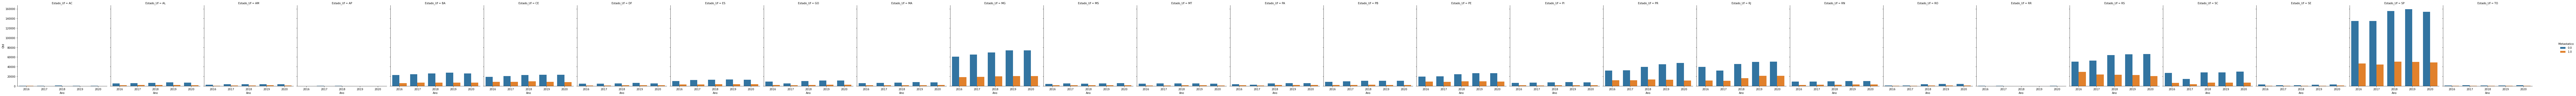

In [ ]:
sns.catplot(x="Ano", y='Qtd', hue="Metastatico",col='Estado_Uf', data=df_var_05, kind="bar", ci=0.68)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning

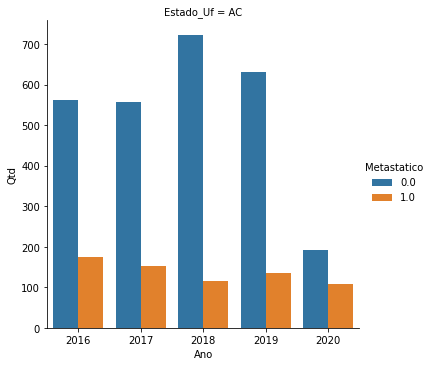

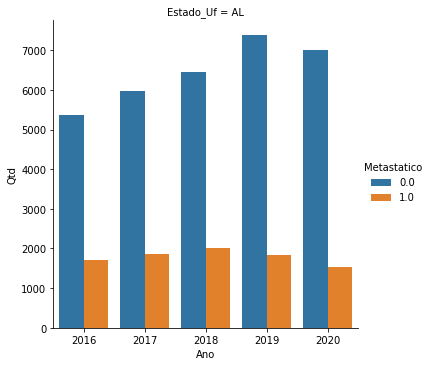

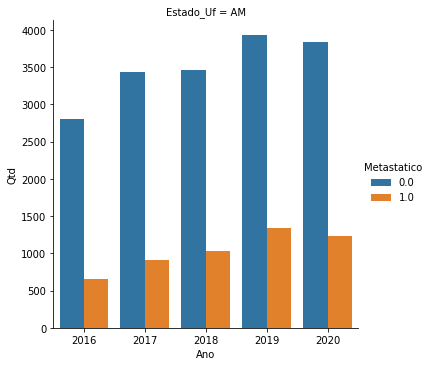

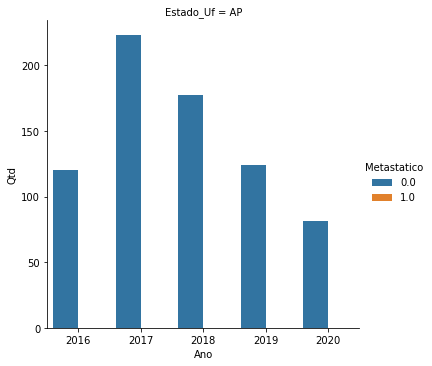

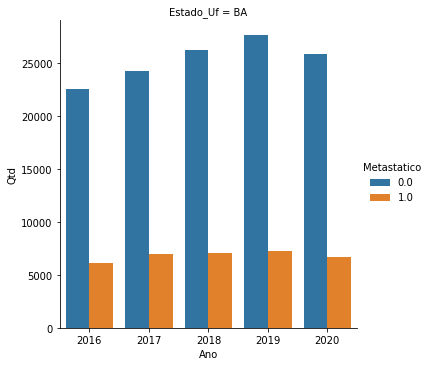

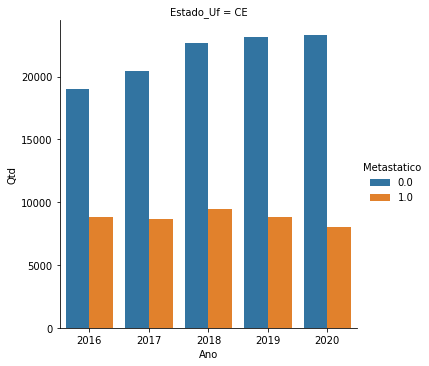

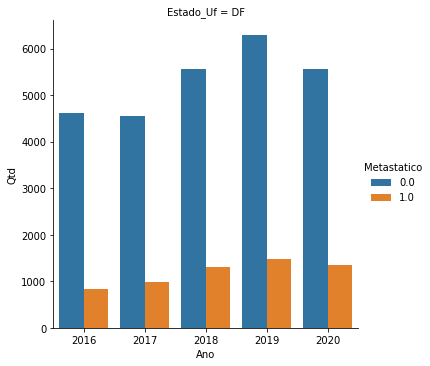

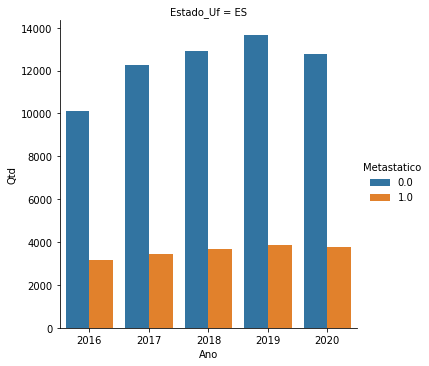

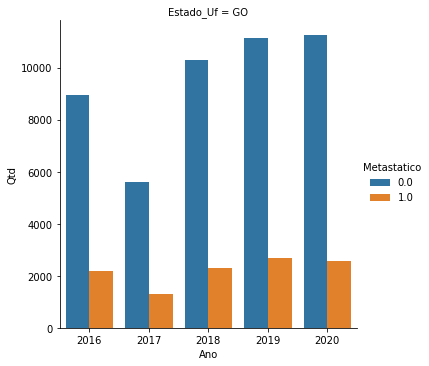

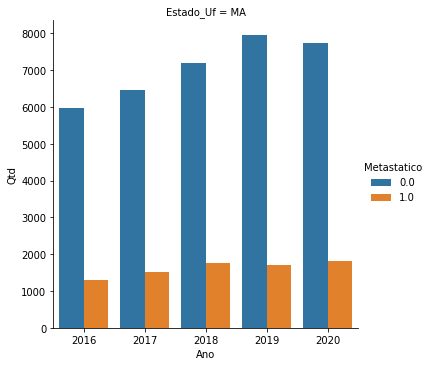

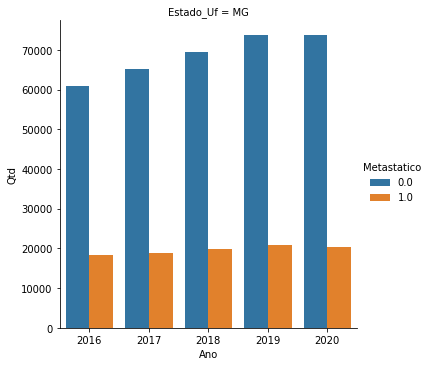

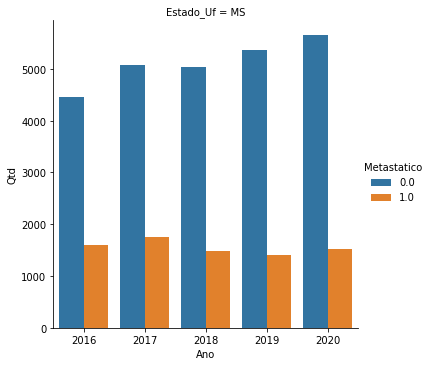

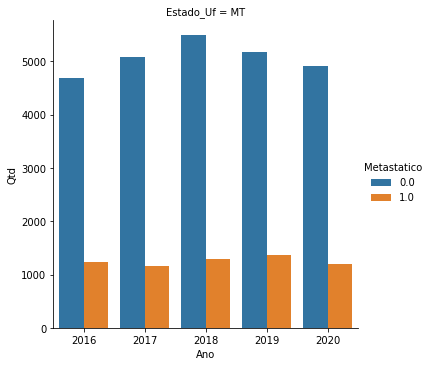

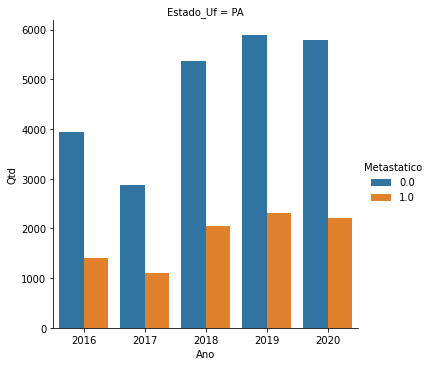

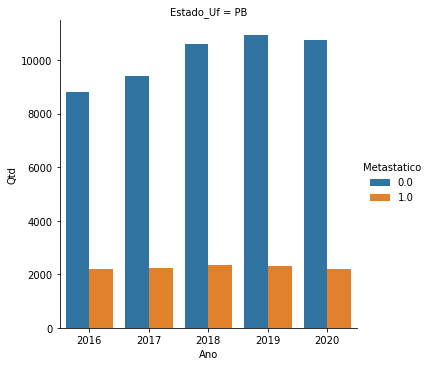

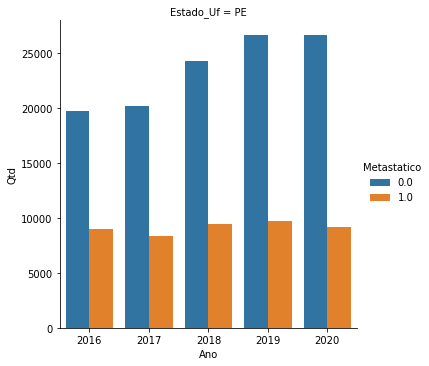

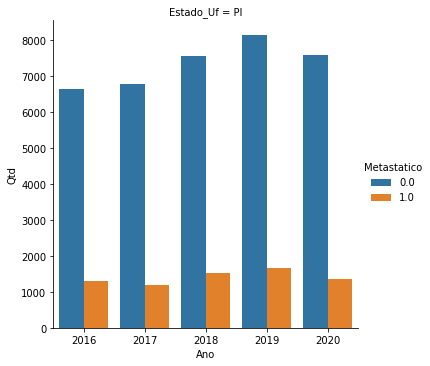

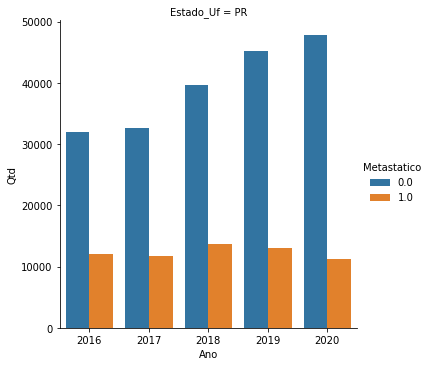

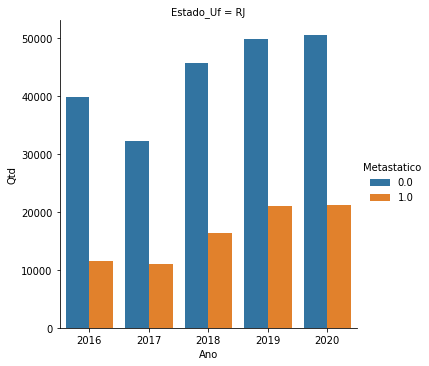

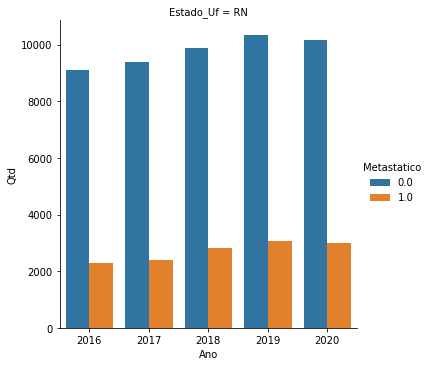

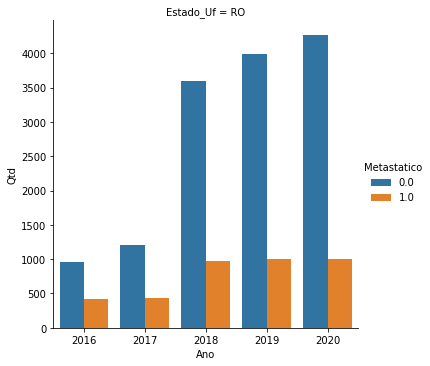

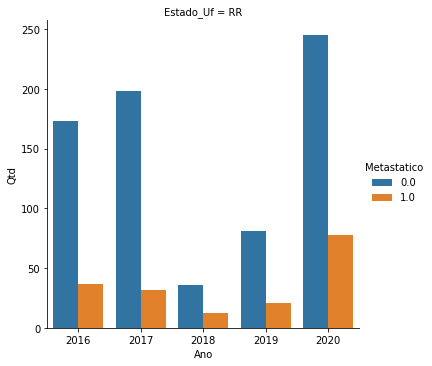

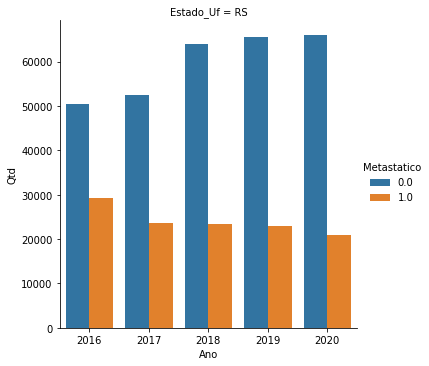

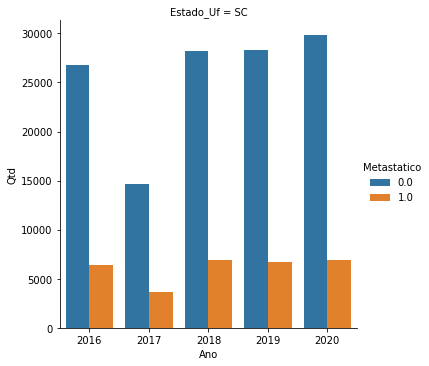

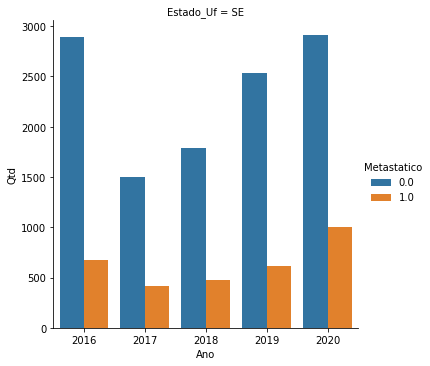

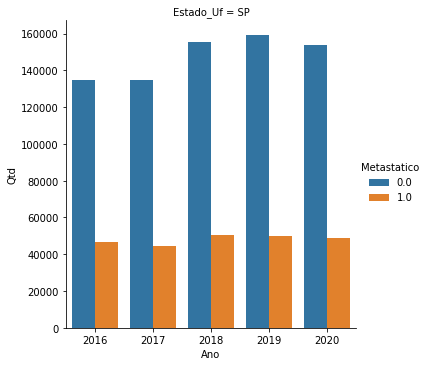

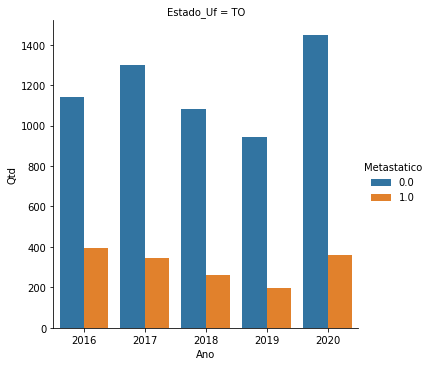

In [ ]:
# N. de Metastatico por Estado e Ano
for uf in df_var_05.Estado_Uf.unique():
  filtro = (df_var_05.Estado_Uf==uf)
  sns.catplot(x="Ano", y='Qtd', hue="Metastatico",col='Estado_Uf', data=df_var_05[filtro], kind="bar", ci=0.68)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning

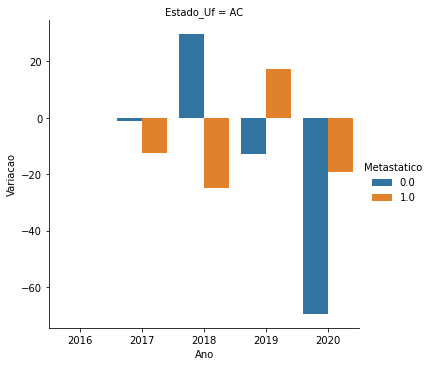

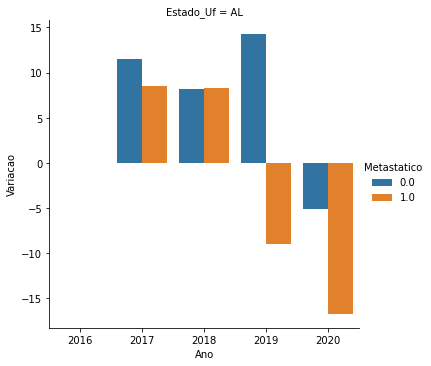

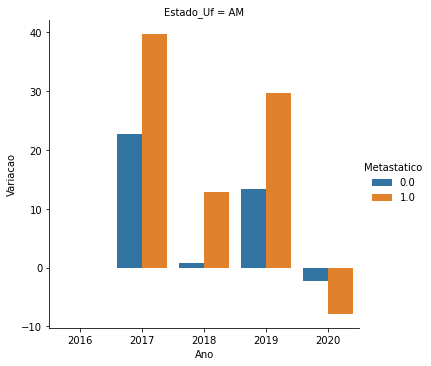

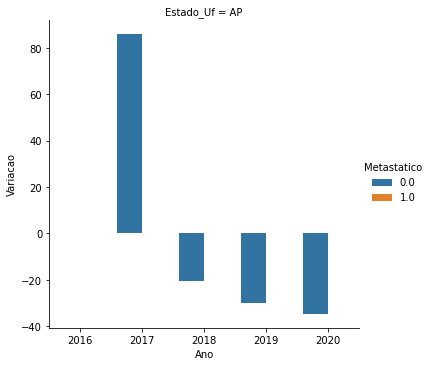

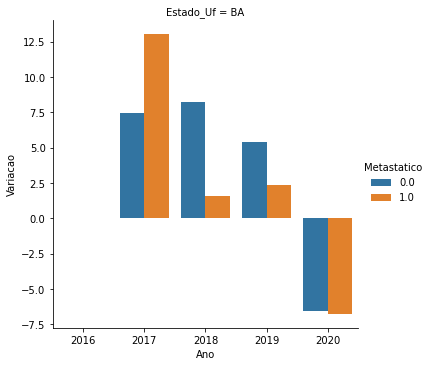

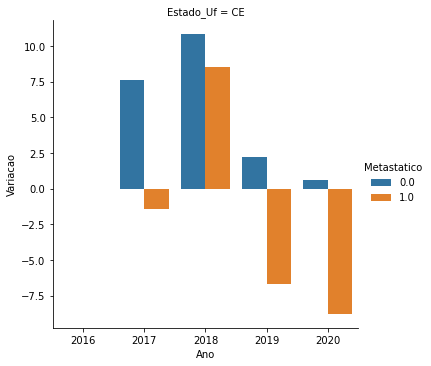

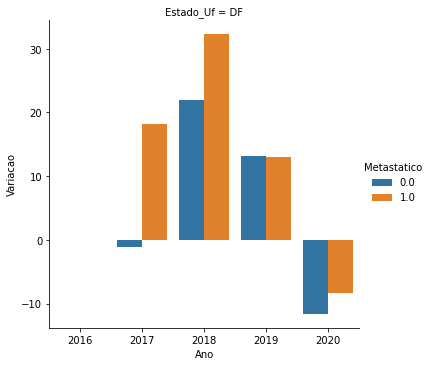

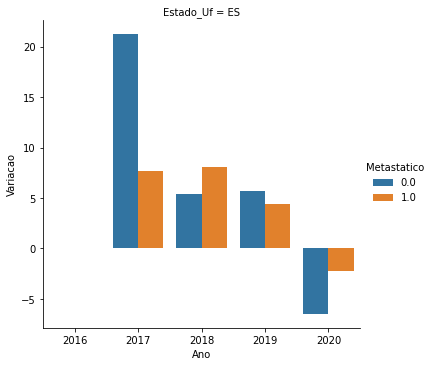

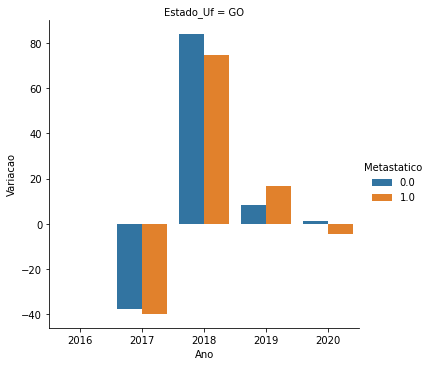

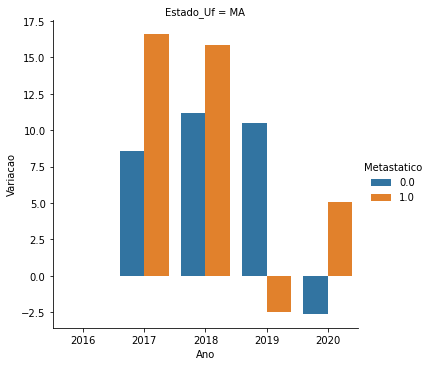

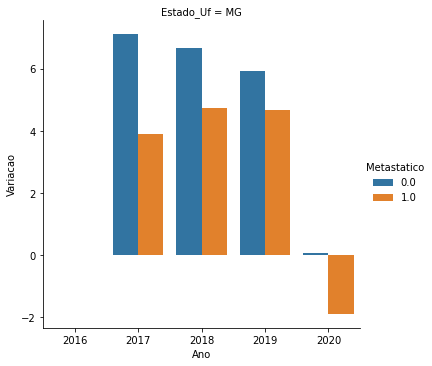

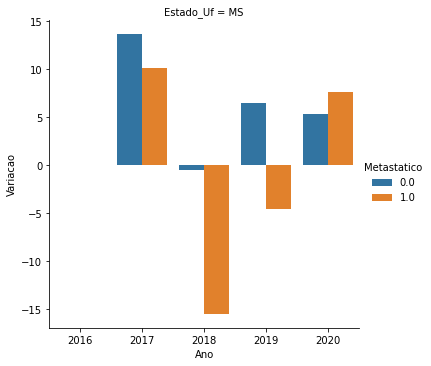

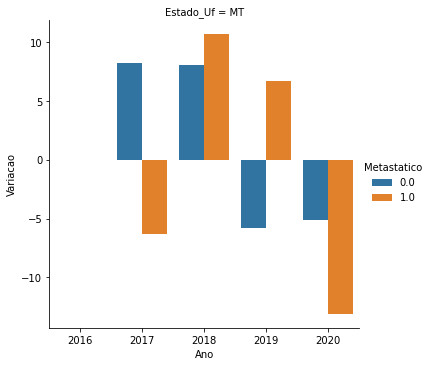

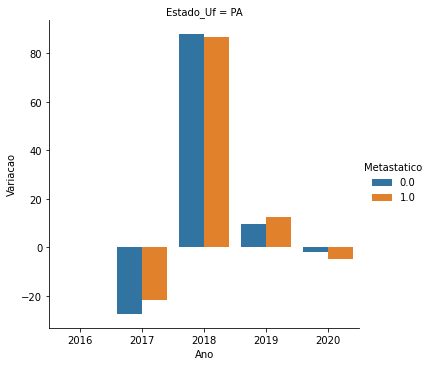

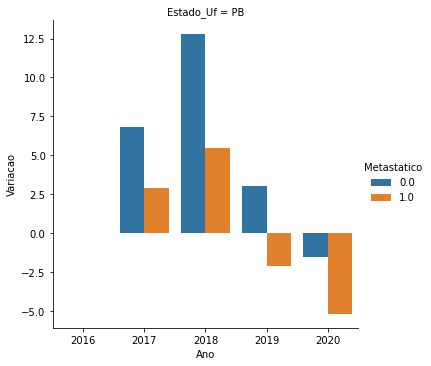

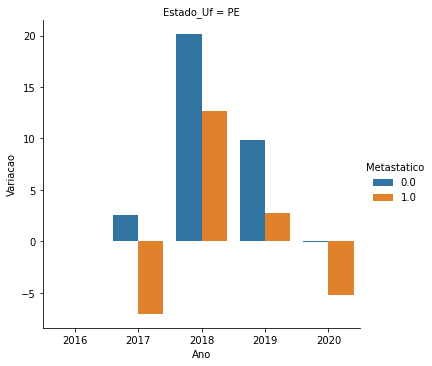

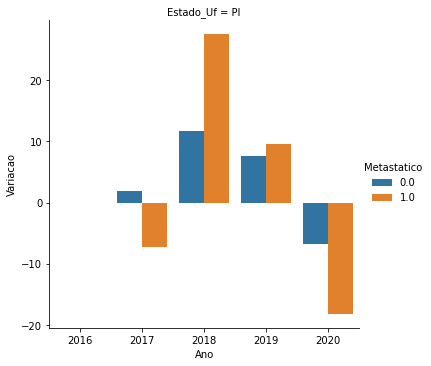

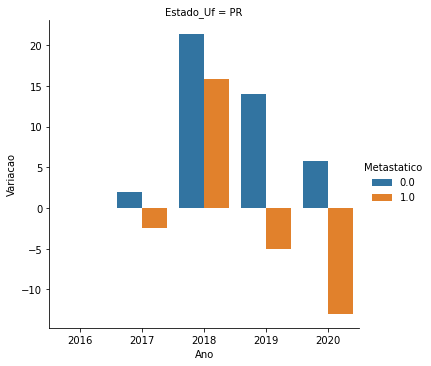

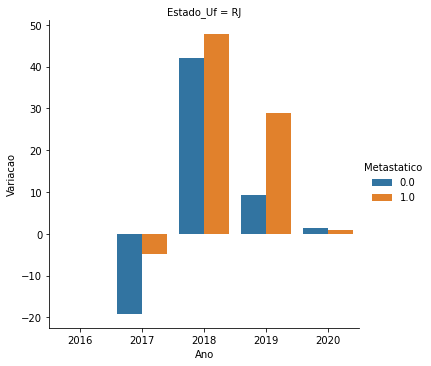

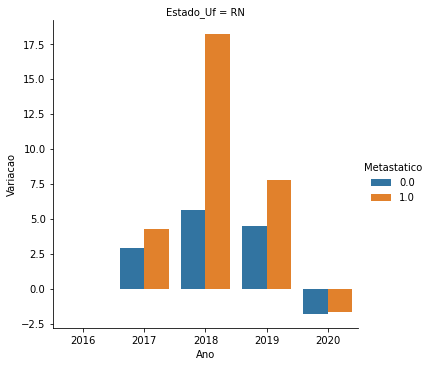

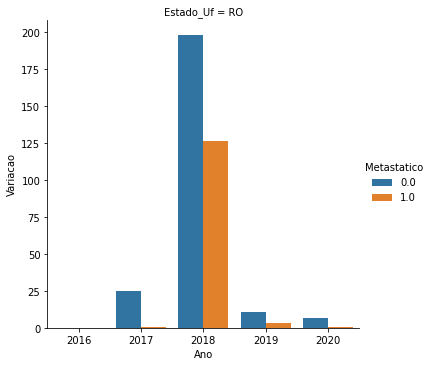

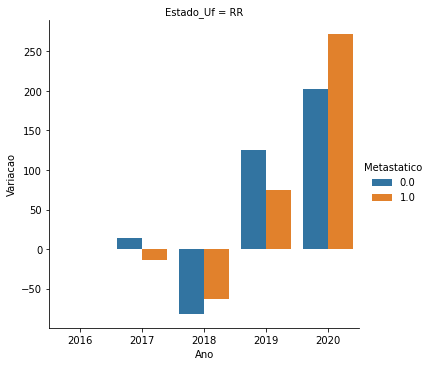

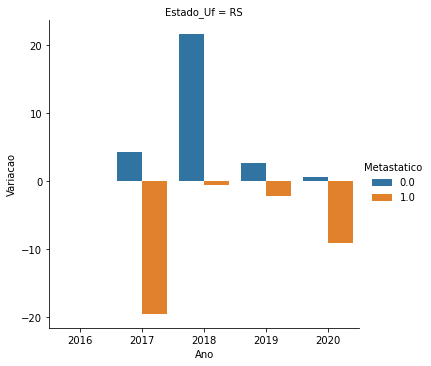

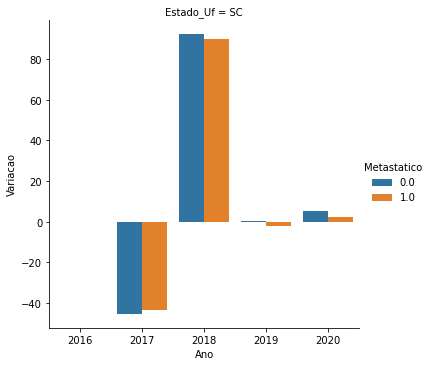

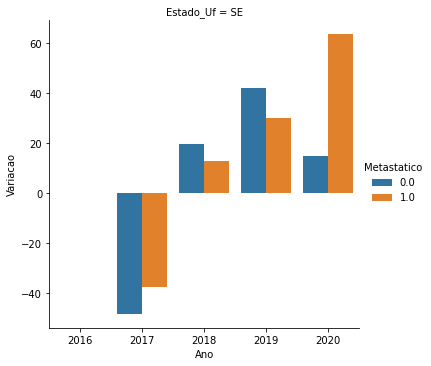

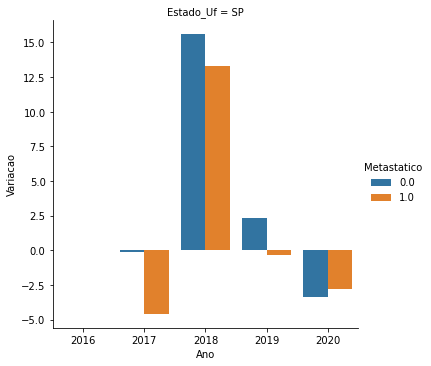

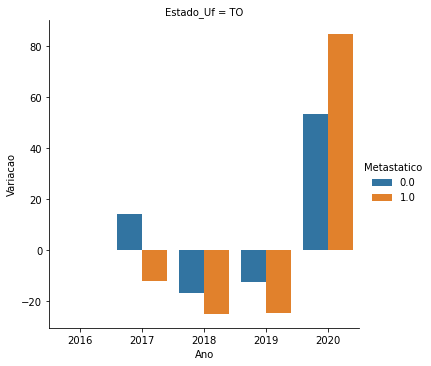

In [ ]:
# Variação Metastatico por Estado e Ano
for uf in df_var_05.Estado_Uf.unique():
  filtro = (df_var_05.Estado_Uf==uf)
  sns.catplot(x="Ano", y='Variacao', hue="Metastatico",col='Estado_Uf', data=df_var_05[filtro], kind="bar", ci=0.68)

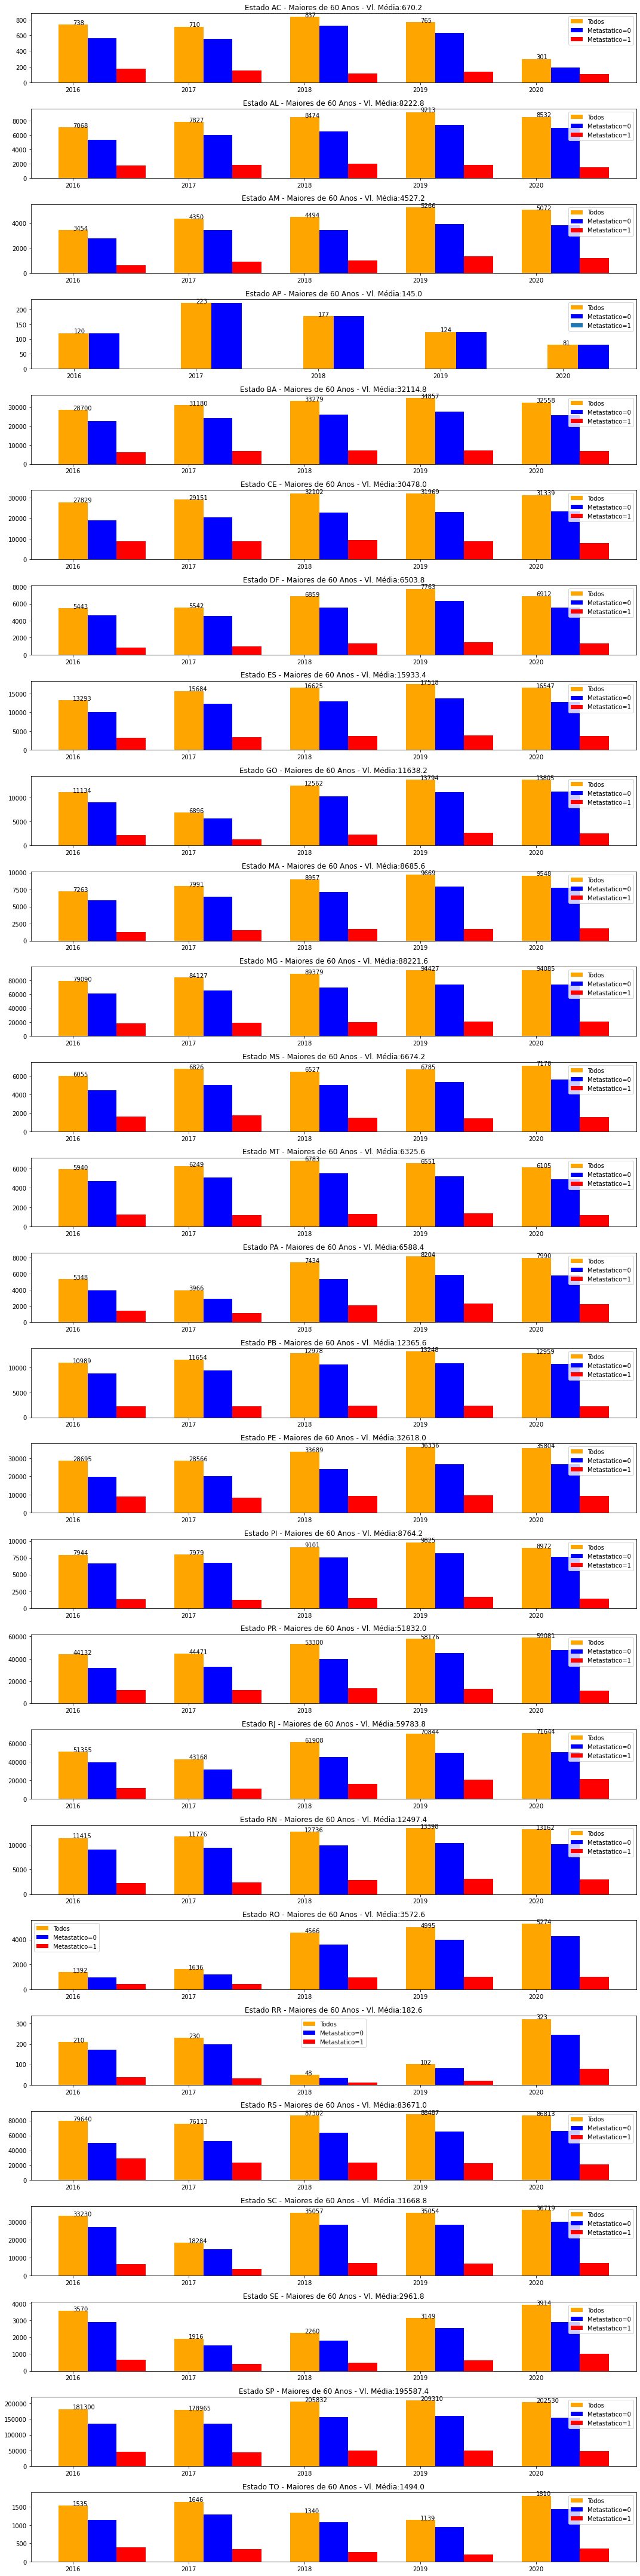

In [ ]:
# Vamos imprimir dois graficos para cada estado apresentando o numero de registros em cada ano de cada estado por faixa de idade
n_estados = df_2.ESTADO_UF.sort_values().unique()
fig, axes = plt.subplots(nrows=len(n_estados), ncols=1, figsize=(15,60))
i = 0
for uf in n_estados:
  filtro = (df_2["ESTADO_UF"]==uf)
  df_est = df_2[filtro].groupby(["ANO"], as_index=False, dropna=False)['QTD'].sum()
  x = df_est.ANO
  y = df_est.QTD
  axes[i].bar(x, y,color = "orange", width = 0.25)
  # Barrar por Metastatico
  filtro2 = ((df_2["ESTADO_UF"]==uf) & (df_2["METASTATICO"]==0) )
  df_est2 = df_2[filtro2].groupby(["ANO",'METASTATICO'], as_index=False, dropna=False)['QTD'].sum()
  
  x2 = df_est2.ANO
  y2 = df_est2.QTD
  axes[i].bar(x2 + 0.25, y2,color = 'b', width = 0.25)

  filtro3 = ((df_2["ESTADO_UF"]==uf) & (df_2["METASTATICO"]==1) )
  df_est3 = df_2[filtro3].groupby(["ANO",'METASTATICO'], as_index=False, dropna=False)['QTD'].sum()
  x3 = df_est3.ANO
  y3 = df_est3.QTD
  axes[i].bar(x3 + 0.50, y3, color = 'r', width = 0.25 )

  axes[i].legend(labels=['Todos', 'Metastatico=0', 'Metastatico=1'])
  axes[i].set_title('Estado '+str(uf)+' - Maiores de 60 Anos - Vl. Média:'+str(y.mean()) )
  for idx in range(0,len(x)):
    axes[i].text(x[idx], y[idx], y[idx], fontsize=10)
  #--
  i=i+1
fig.tight_layout()

# Estado por TPAPAC

In [ ]:
df_2.AP_TPAPAC.unique()

array([1, 2])

In [ ]:
df_06 = df_2.groupby(['ANO','ESTADO_UF','AP_TPAPAC','METASTATICO'], as_index=False, dropna=False)['QTD'].sum()
df_06.head()

ANO ESTADO_UF  AP_TPAPAC  METASTATICO   QTD
0  2016        AC          1          0.0   192
1  2016        AC          1          1.0    61
2  2016        AC          2          0.0   371
3  2016        AC          2          1.0   114
4  2016        AL          1          0.0  1833

In [ ]:
df_var_06 = pd.DataFrame(columns=['Ano','Estado_Uf','Ap_Tpapac','Metastatico', 'Qtd','Variacao'])
i=0
for ano in df_06.ANO.unique():
  for meta in df_06.METASTATICO.unique():
    for uf in df_06.ESTADO_UF.unique():
      for tpapac in df_06.AP_TPAPAC.unique():
      
        anoAtual = df_06.QTD[(df_06.ANO == ano) & (df_06.METASTATICO == meta)& (df_06.ESTADO_UF == uf) & (df_06.AP_TPAPAC == tpapac)].sum()
        anoAnterior = df_06.QTD[(df_06.ANO == ano-1) & (df_06.METASTATICO == meta) & (df_06.ESTADO_UF == uf) & (df_06.AP_TPAPAC == tpapac)].sum()
        variacao = 0
        if anoAnterior != 0 and anoAtual != 0:
          variacao = ((anoAtual / anoAnterior)-1) * 100
        elif anoAnterior != 0 and anoAtual == 0:
          variacao = -100
        else:
          variacao = 0

        vet = [str(ano), uf, tpapac, meta, anoAtual, variacao]

        df_var_06.loc[i] = vet
        i+=1
#df_var_05

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning

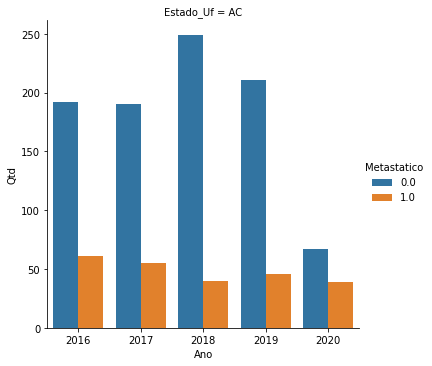

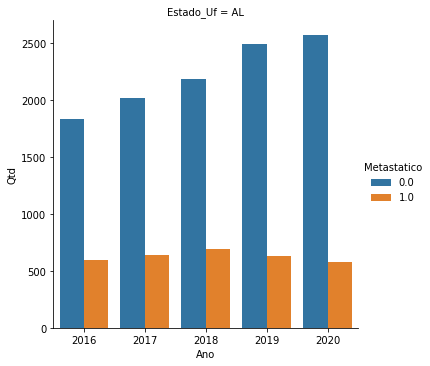

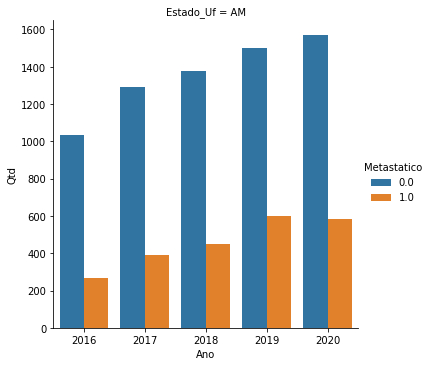

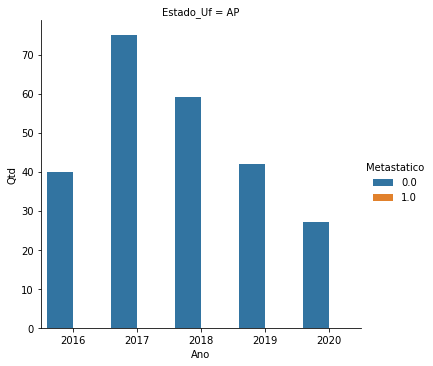

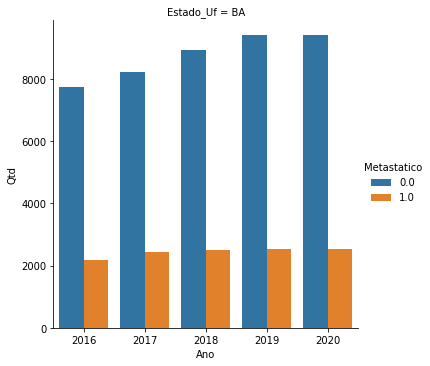

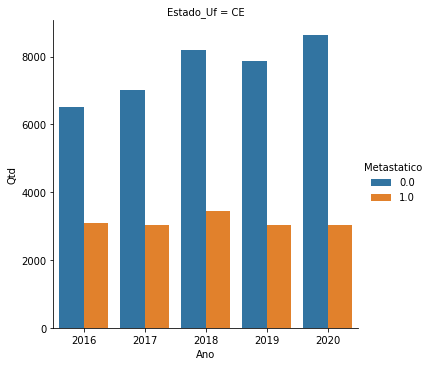

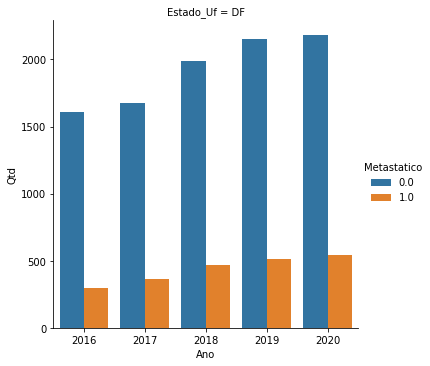

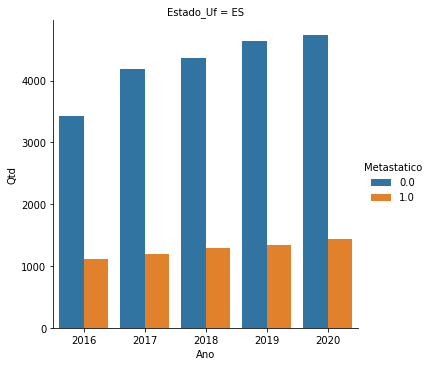

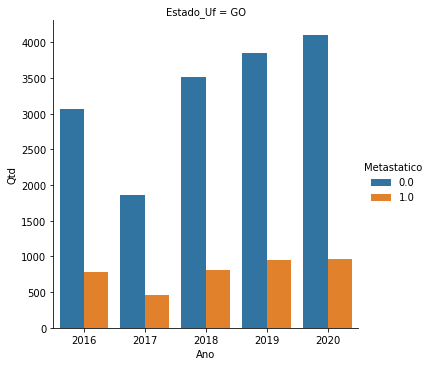

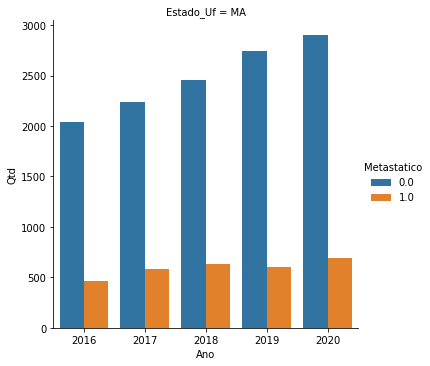

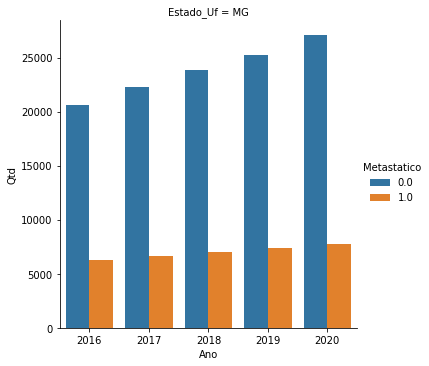

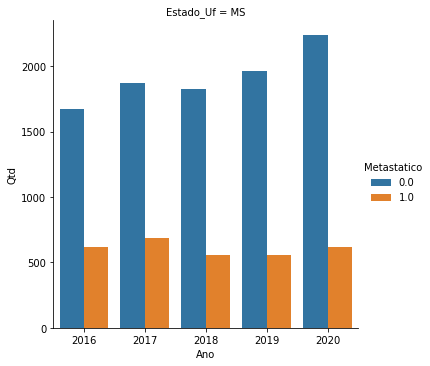

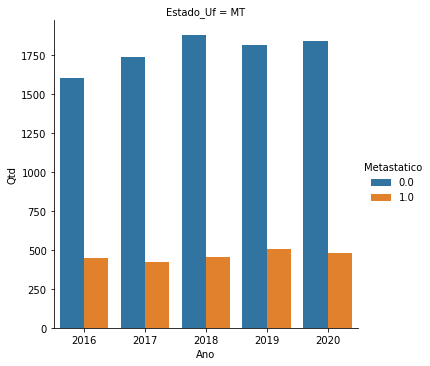

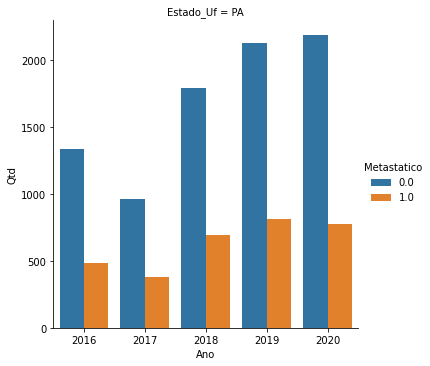

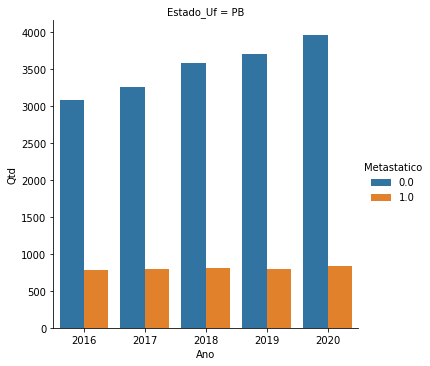

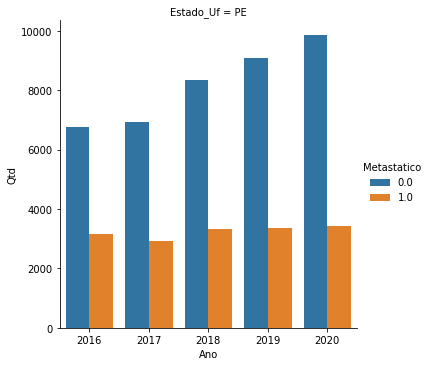

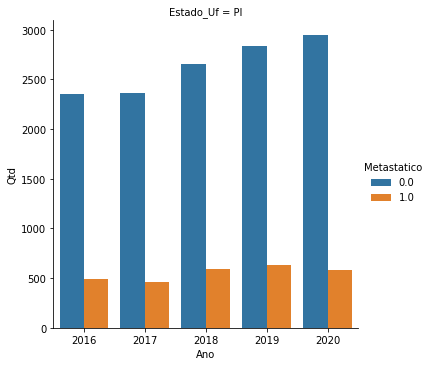

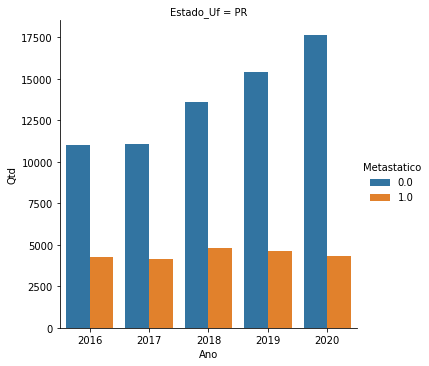

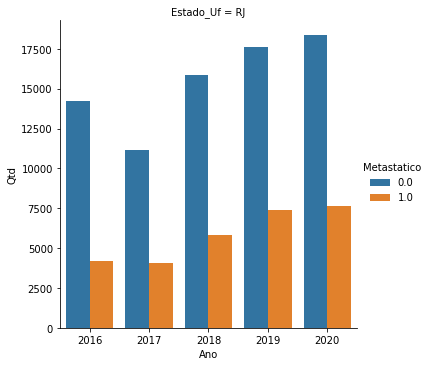

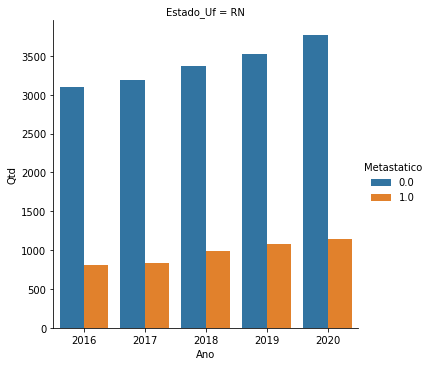

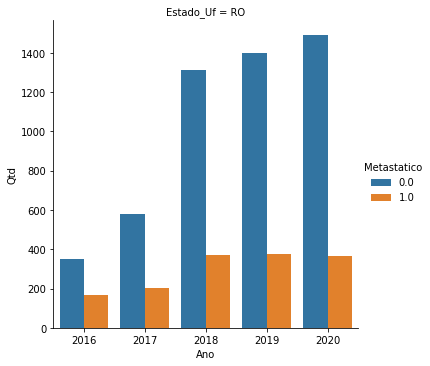

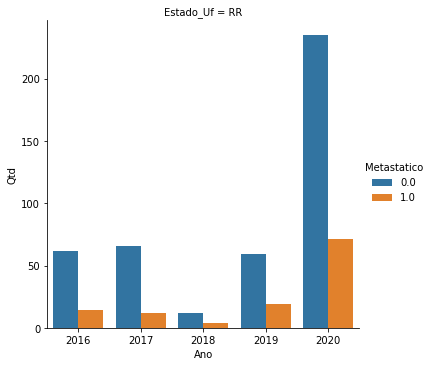

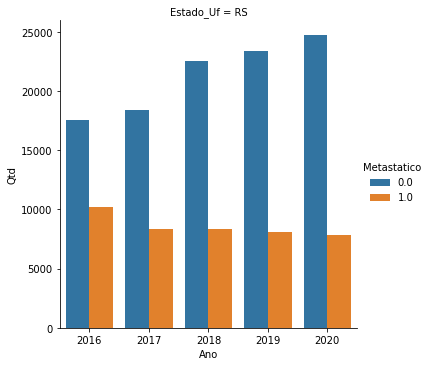

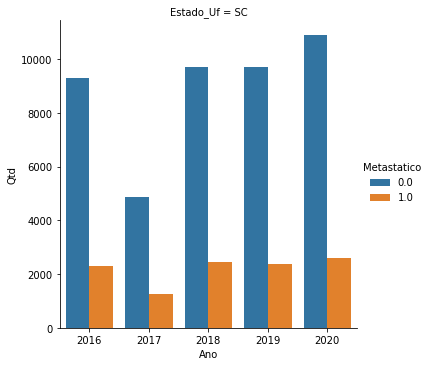

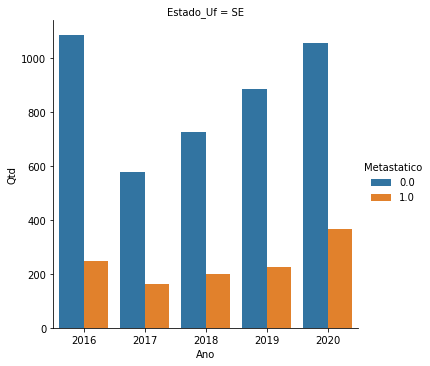

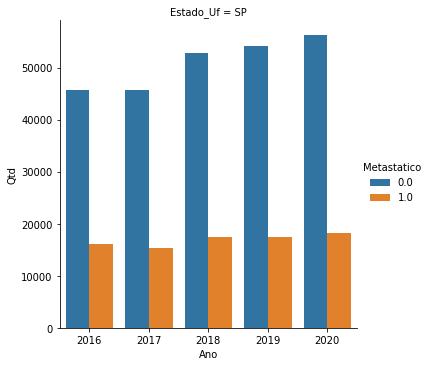

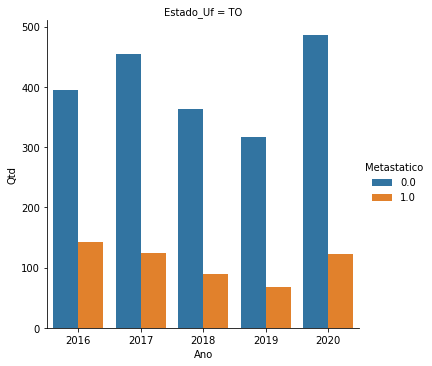

In [ ]:
for uf in df_var_06.Estado_Uf.unique():
  filtro = (df_var_06.Estado_Uf==uf) & (df_var_06.Ap_Tpapac==1)
  sns.catplot(x="Ano", y='Qtd', hue="Metastatico",col='Estado_Uf', data=df_var_06[filtro], kind="bar", ci=0.68)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning

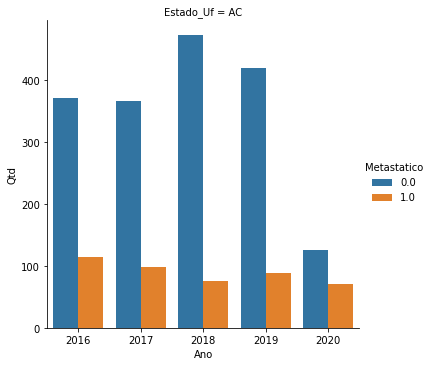

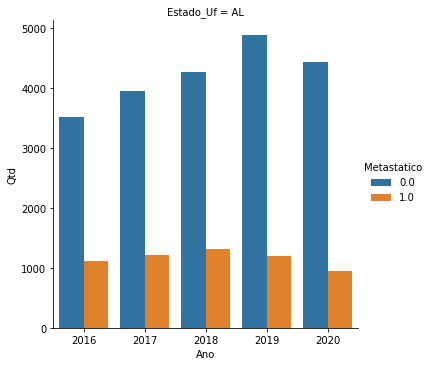

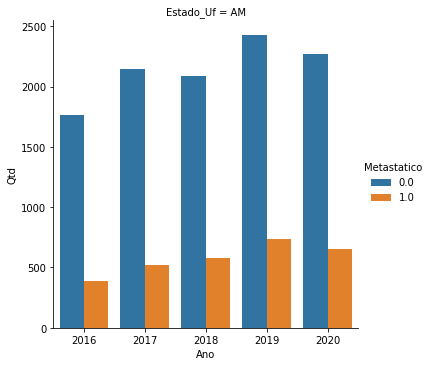

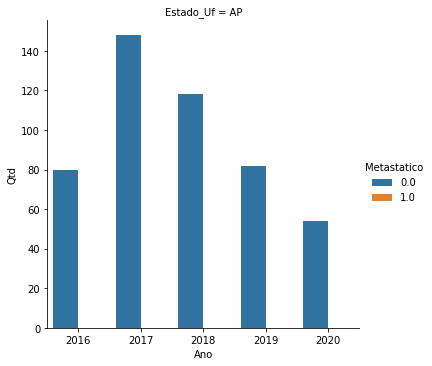

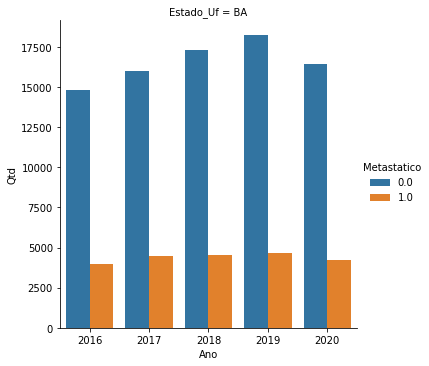

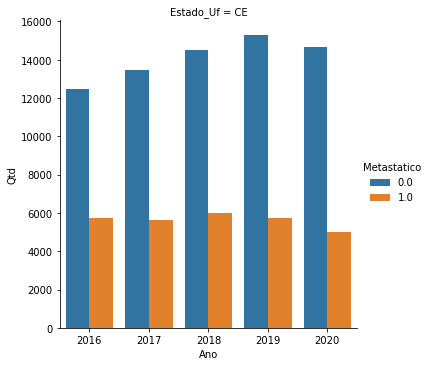

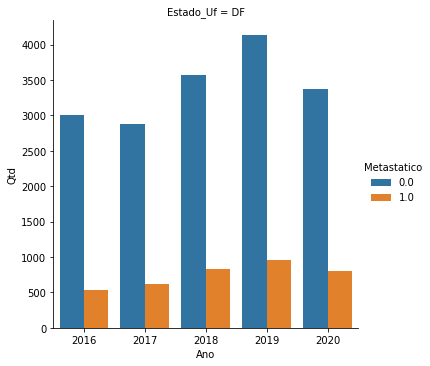

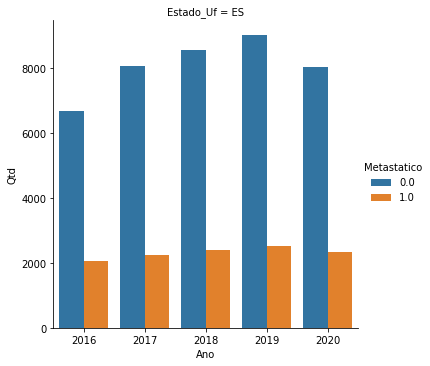

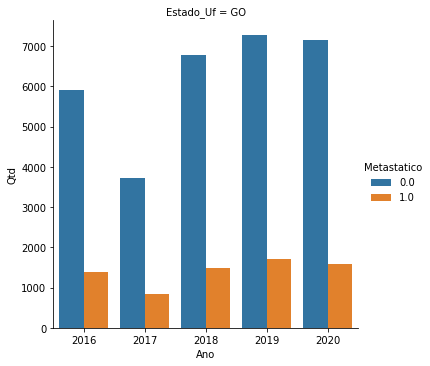

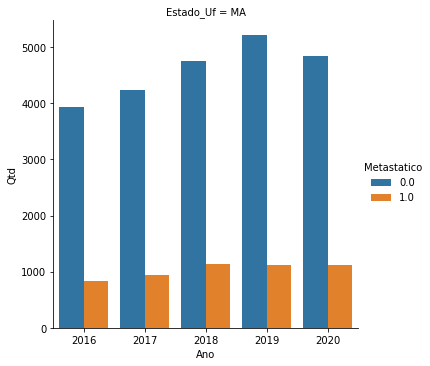

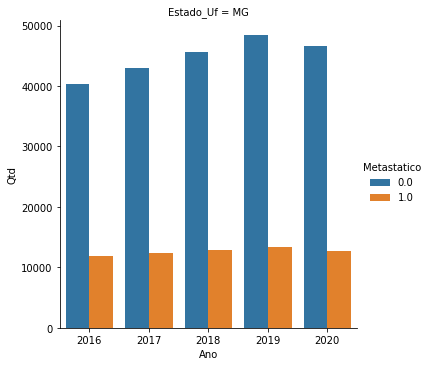

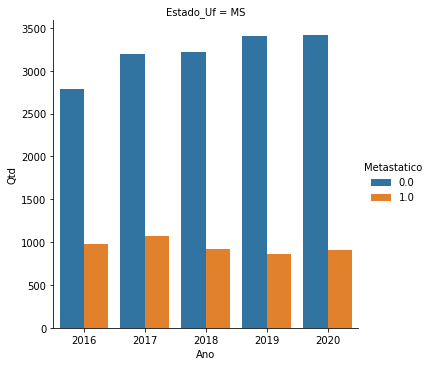

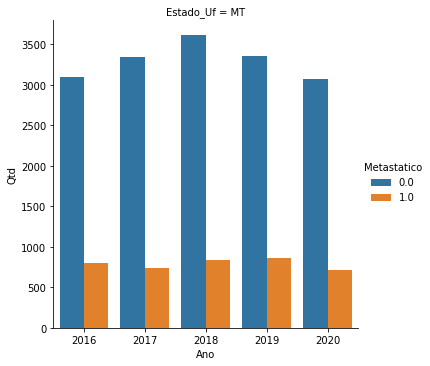

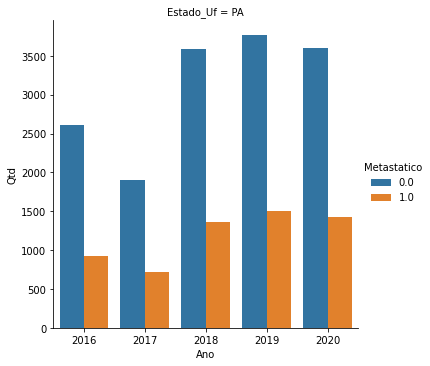

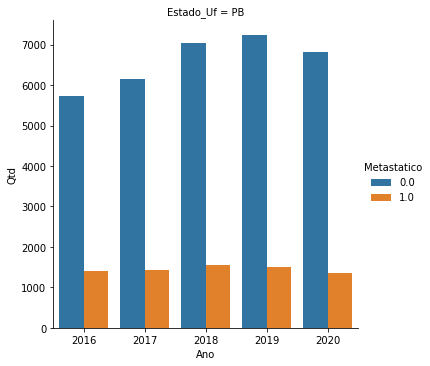

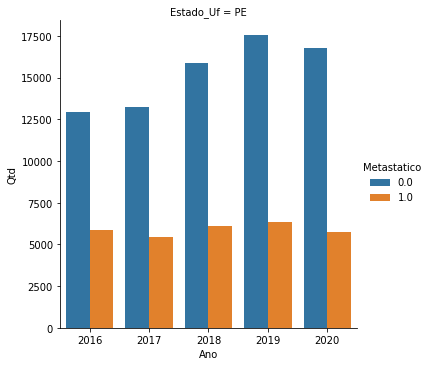

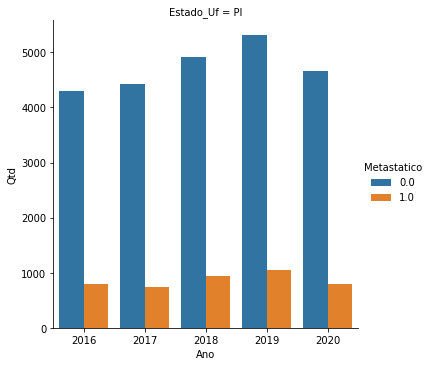

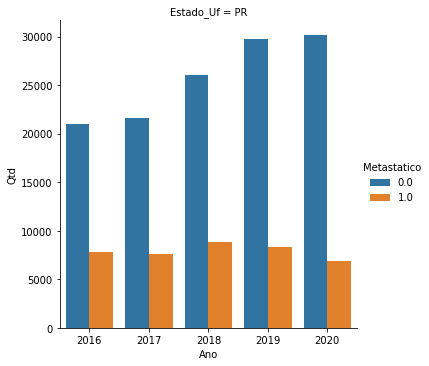

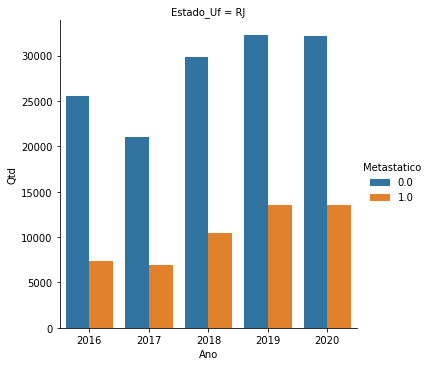

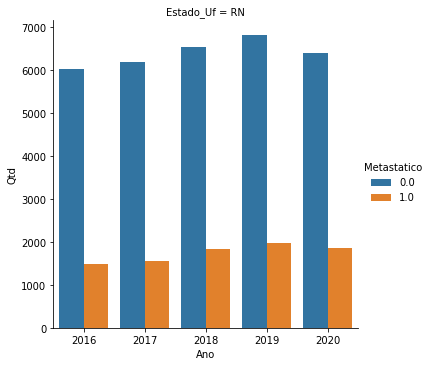

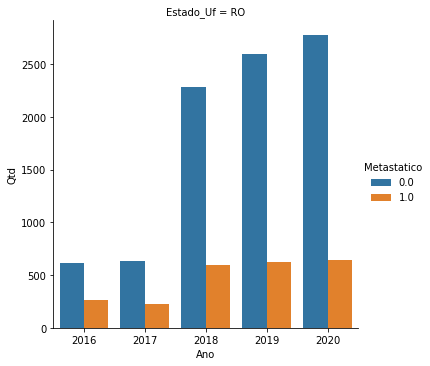

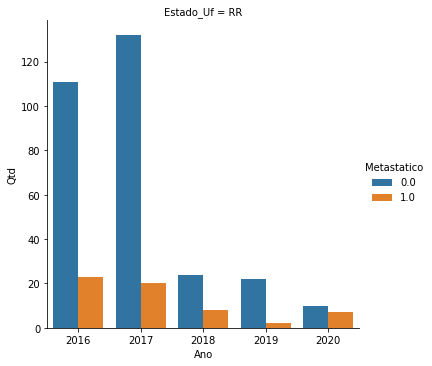

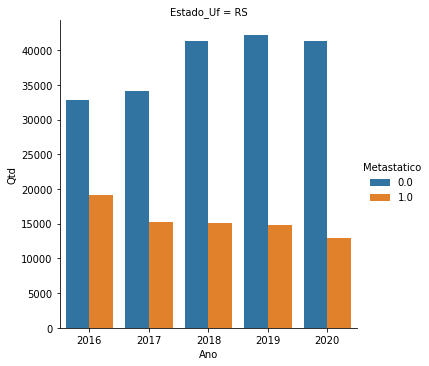

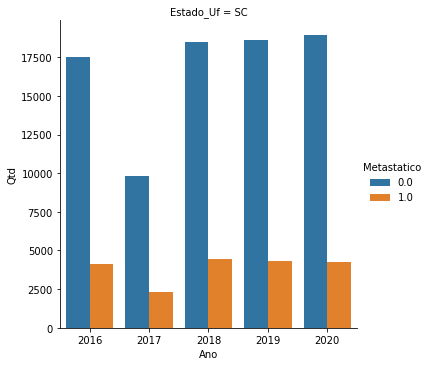

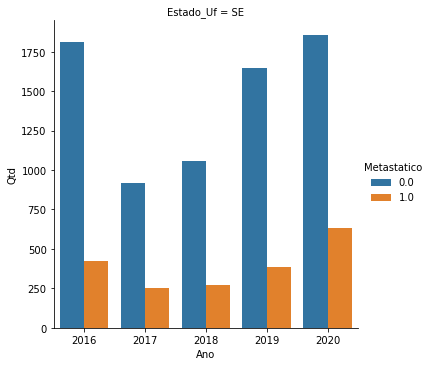

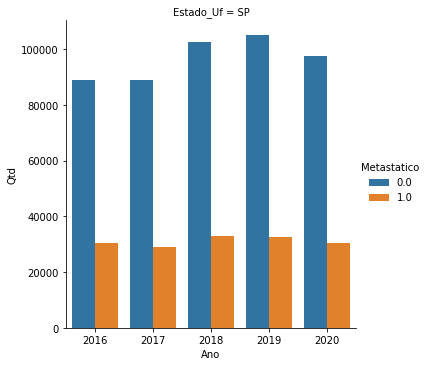

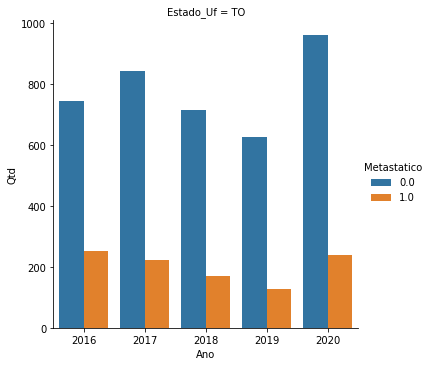

In [ ]:
# N. de Metastatico por Estado e Ano
for uf in df_var_06.Estado_Uf.unique():
  filtro = (df_var_06.Estado_Uf==uf) & (df_var_06.Ap_Tpapac==2)
  sns.catplot(x="Ano", y='Qtd', hue="Metastatico",col='Estado_Uf', data=df_var_06[filtro], kind="bar", ci=0.68)

In [ ]:
def graficoEstadoPorTPAPAC(df, tpapac):
  n_estados = df.ESTADO_UF.sort_values().unique()
  fig, axes = plt.subplots(nrows=len(n_estados), ncols=1, figsize=(10,50))
  i = 0
  for uf in n_estados:
    filtro= (df["ESTADO_UF"]==uf) & (df['AP_TPAPAC']== tpapac)
    df_est = df[filtro].groupby(["ANO"], as_index=False, dropna=False)['QTD'].sum()
    x = df_est.ANO
    y = df_est.QTD
    axes[i].bar(x, y,color = "orange", width = 0.25)
      # Barrar por Metastatico
    filtro2 = ((df["ESTADO_UF"]==uf) & (df['AP_TPAPAC']== tpapac) & (df["METASTATICO"]==0) )
    df_est2 = df[filtro2].groupby(["ANO",'METASTATICO'], as_index=False, dropna=False)['QTD'].sum()    
    x2 = df_est2.ANO
    y2 = df_est2.QTD
    axes[i].bar(x2 + 0.25, y2,color='b', width = 0.25)

    filtro3 = ((df["ESTADO_UF"]==uf) & (df['AP_TPAPAC']== tpapac) & (df["METASTATICO"]==1) )
    df_est3 = df[filtro3].groupby(["ANO",'METASTATICO'], as_index=False, dropna=False)['QTD'].sum()
    x3 = df_est3.ANO
    y3 = df_est3.QTD
    axes[i].bar(x3 + 0.50, y3, color='r', width = 0.25 )

    axes[i].legend(labels=['Todos', 'Metastatico=0', 'Metastatico=1'])

    
    axes[i].set_title('TPACPAC: '+str(tpapac)+' | Estado '+str(uf)+' - Maiores de 60 Anos - Vl. Média:'+str(y.mean()) )
    for idx in range(0,len(x)):
      axes[i].text(x[idx], y[idx], y[idx], fontsize=10)   
      
    #--
    i=i+1
  fig.tight_layout()

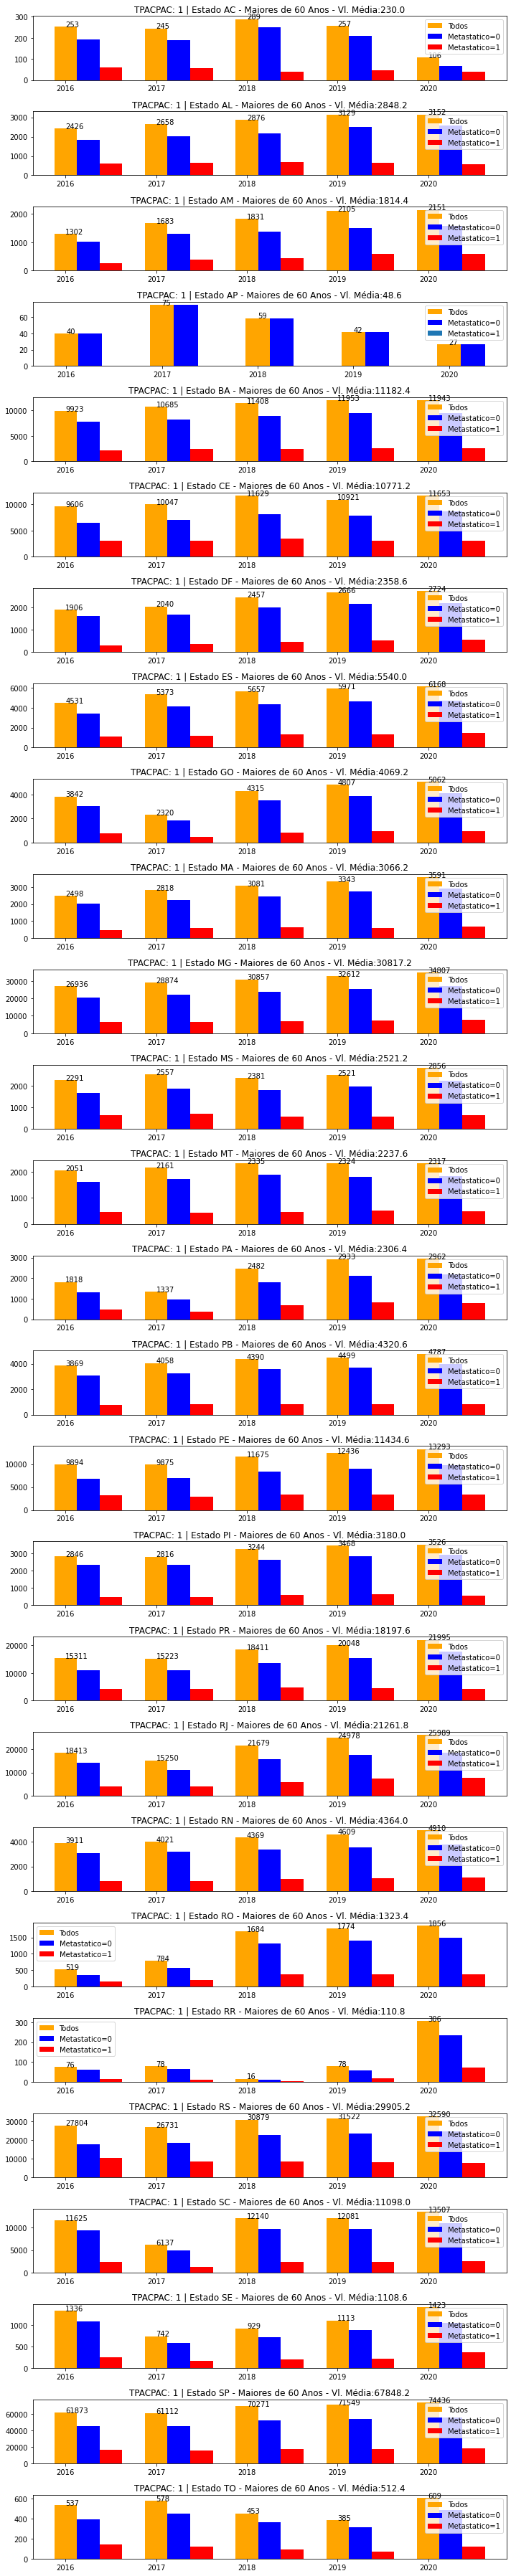

In [ ]:
#TPAPAC=1
graficoEstadoPorTPAPAC(df_2, 1)

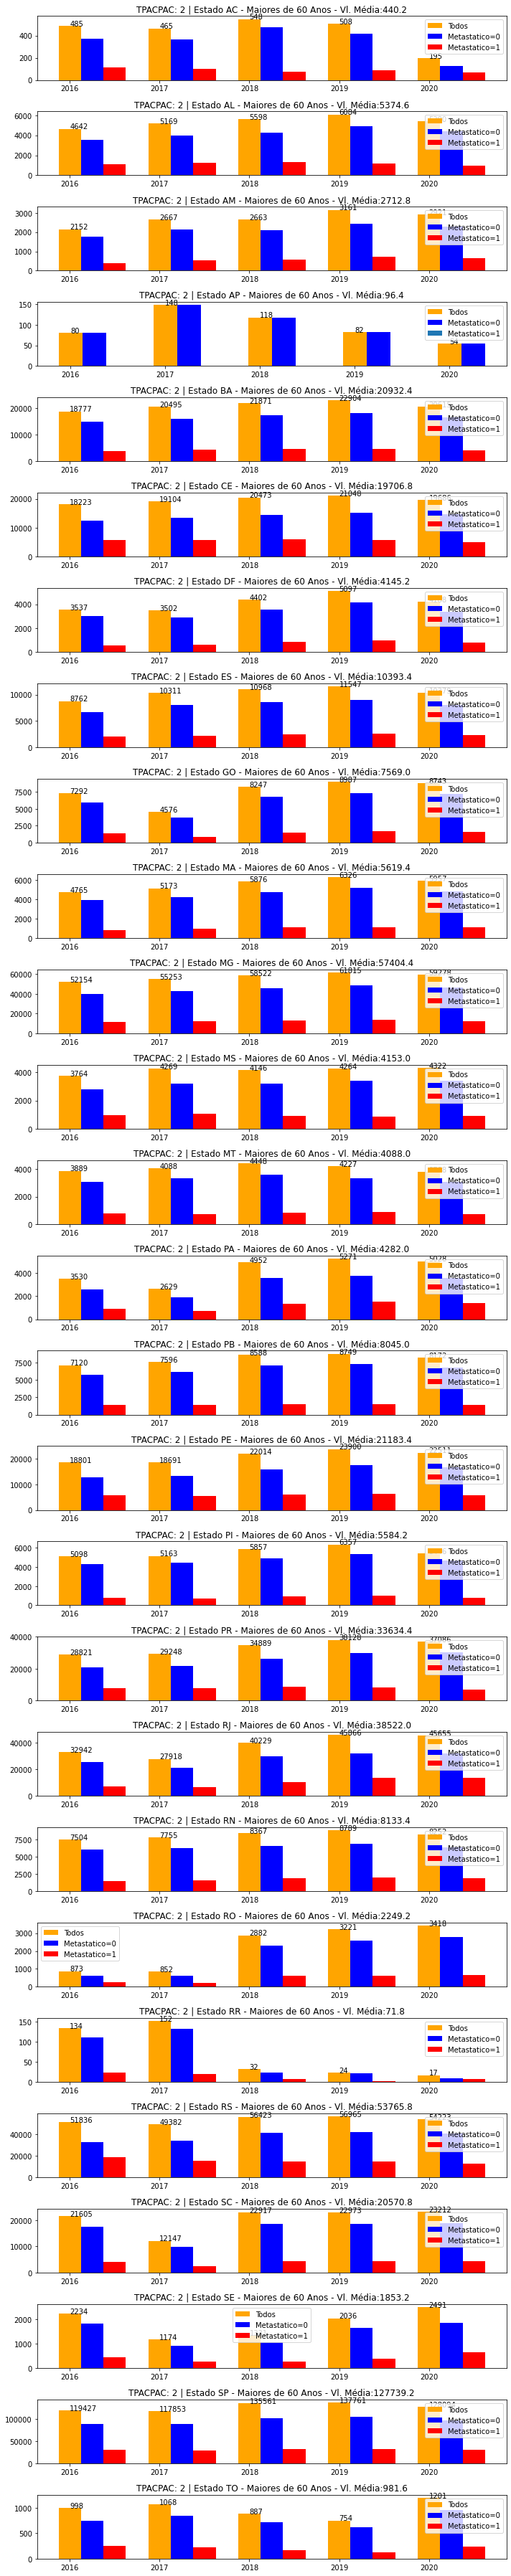

In [ ]:
#TPAPAC=2
graficoEstadoPorTPAPAC(df_2, 2)

# Estado por AQ_ESTADI

In [ ]:
df_2.AQ_ESTADI.unique()

array([0., 1., 2., 3., 4.])

In [ ]:
df_07 = df_2.groupby(['ANO','ESTADO_UF','AQ_ESTADI','METASTATICO'], as_index=False, dropna=False)['QTD'].sum()
df_07.head()

ANO ESTADO_UF  AQ_ESTADI  METASTATICO  QTD
0  2016        AC        1.0          0.0  182
1  2016        AC        2.0          0.0  161
2  2016        AC        2.0          1.0   11
3  2016        AC        3.0          0.0  217
4  2016        AC        3.0          1.0   11

In [ ]:
df_var_07 = pd.DataFrame(columns=['Ano','Estado_Uf','Aq_Estadi','Metastatico', 'Qtd','Variacao'])
i=0
for ano in df_07.ANO.unique():
  for meta in df_07.METASTATICO.unique():
    for uf in df_07.ESTADO_UF.unique():
      for estadi in df_07.AQ_ESTADI.unique():      
        anoAtual = df_07.QTD[(df_07.ANO == ano) & (df_07.METASTATICO == meta) & (df_07.ESTADO_UF == uf) & (df_07.AQ_ESTADI == estadi)].sum()
        anoAnterior = df_07.QTD[(df_07.ANO == ano-1) & (df_07.METASTATICO == meta) & (df_07.ESTADO_UF == uf) & (df_07.AQ_ESTADI == estadi)].sum()
        variacao = 0
        if anoAnterior != 0 and anoAtual != 0:
          variacao = ((anoAtual / anoAnterior)-1) * 100
        elif anoAnterior != 0 and anoAtual == 0:
          variacao = -100
        else:
          variacao = 0

        vet = [str(ano), uf, estadi, meta, anoAtual, variacao]

        df_var_07.loc[i] = vet
        i+=1
#df_var_05

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning

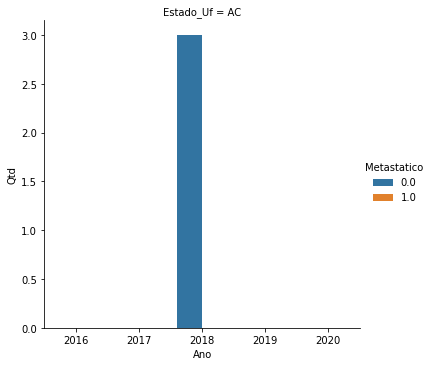

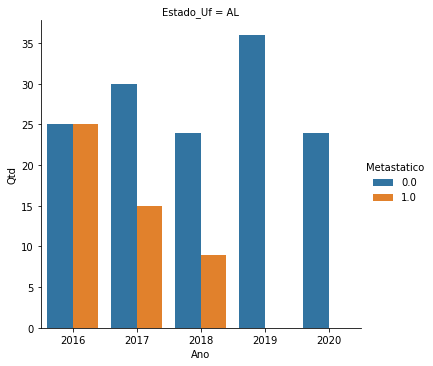

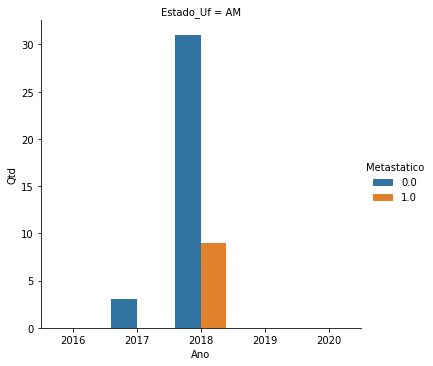

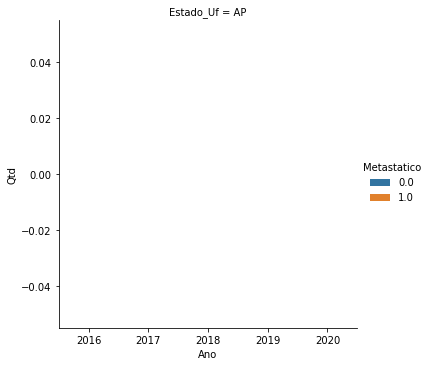

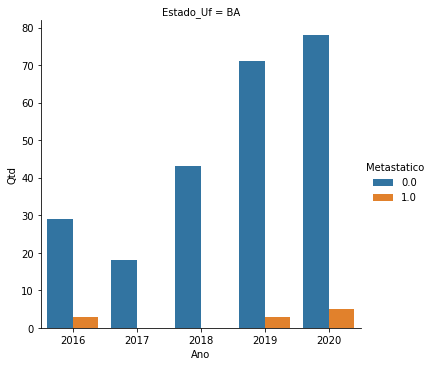

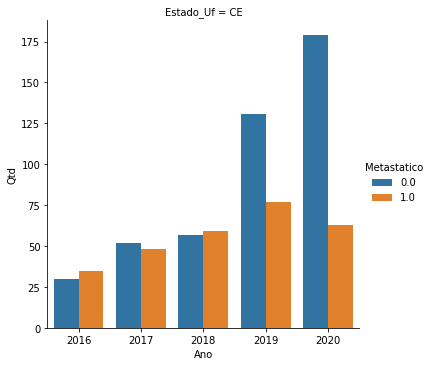

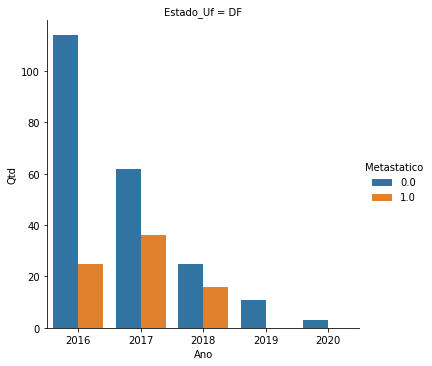

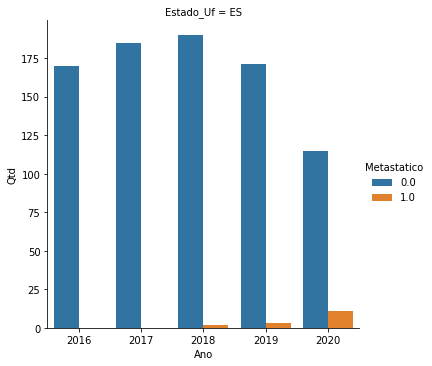

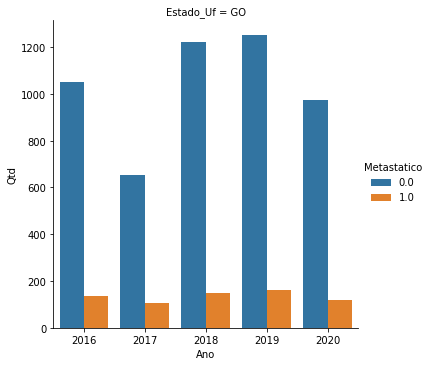

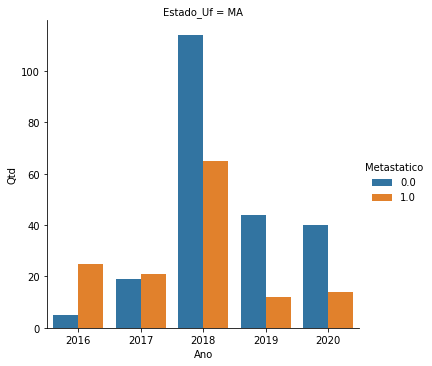

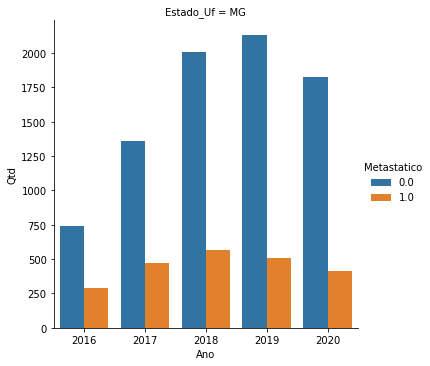

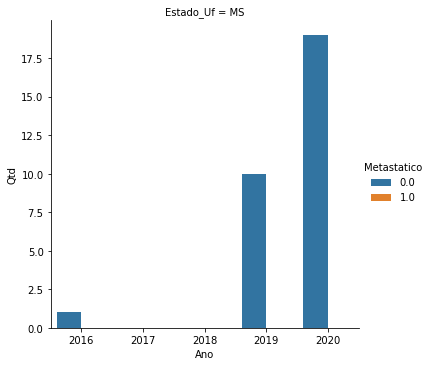

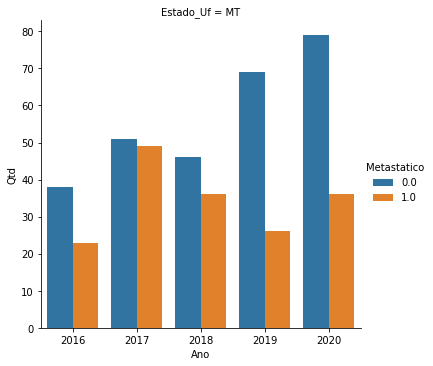

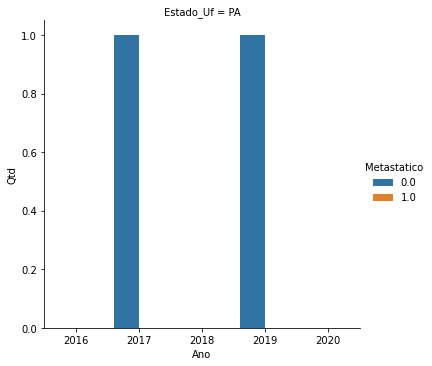

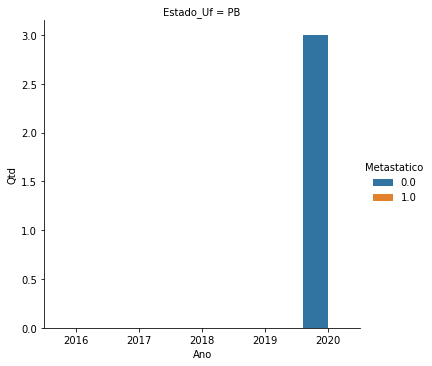

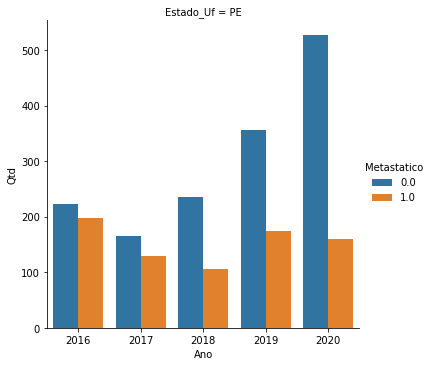

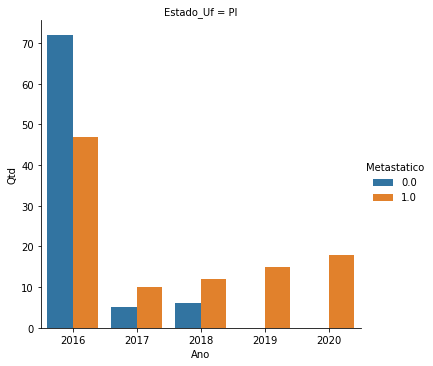

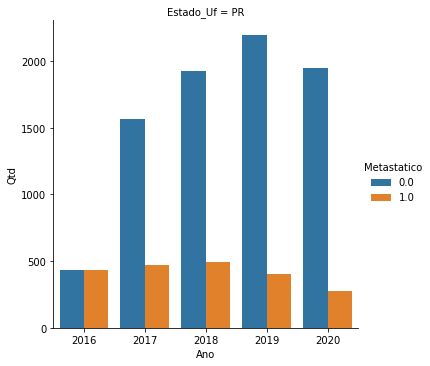

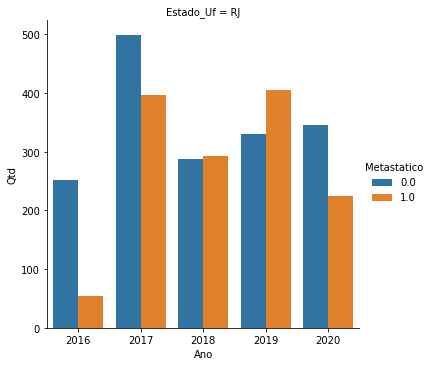

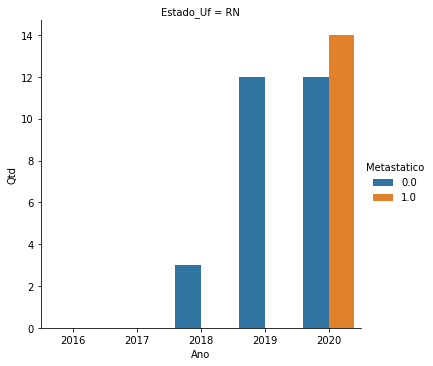

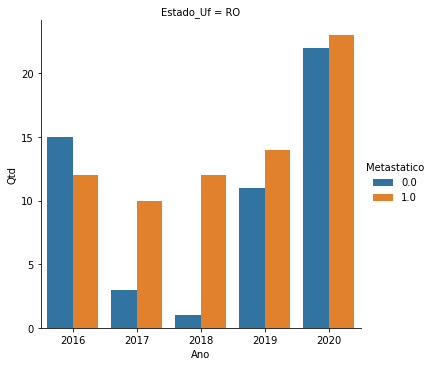

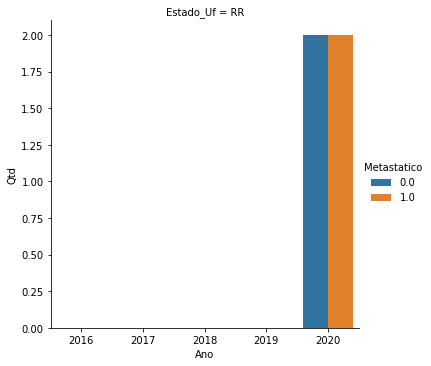

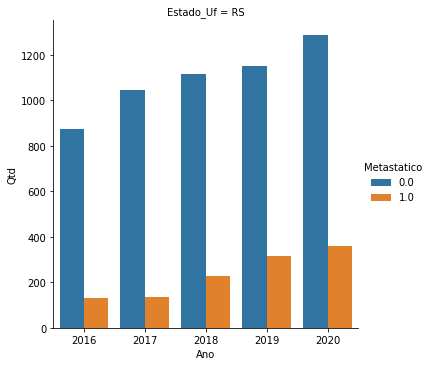

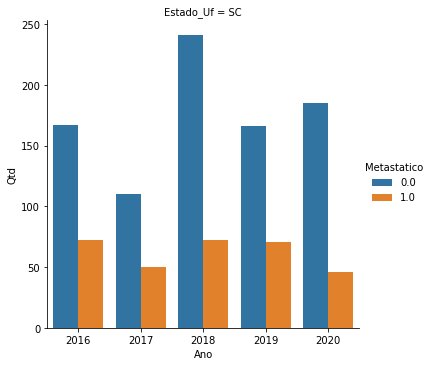

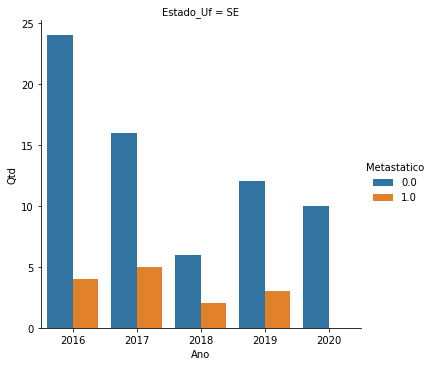

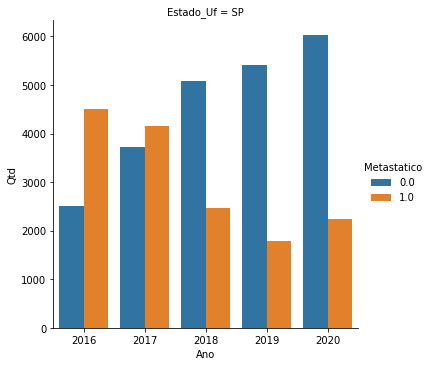

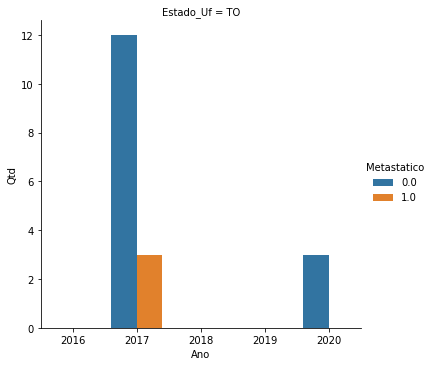

In [ ]:
#AP_ESTADI == 0
for uf in df_var_07.Estado_Uf.unique():
  filtro = (df_var_07.Estado_Uf == uf) & (df_var_07.Aq_Estadi==0)
  sns.catplot(x="Ano", y='Qtd', hue="Metastatico",col='Estado_Uf', data=df_var_07[filtro], kind="bar", ci=0.68)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning

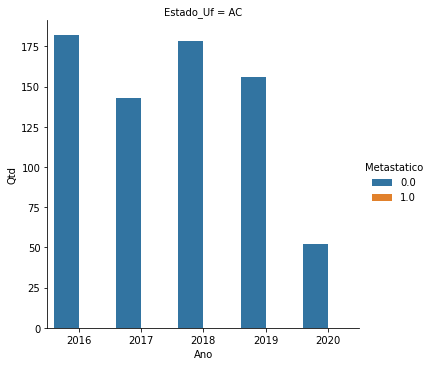

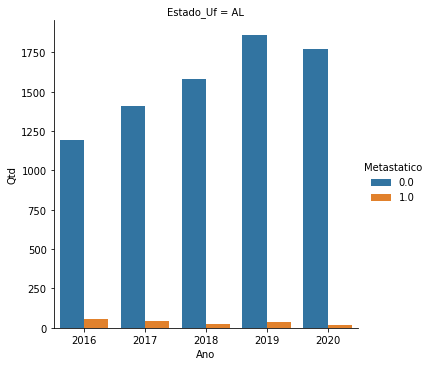

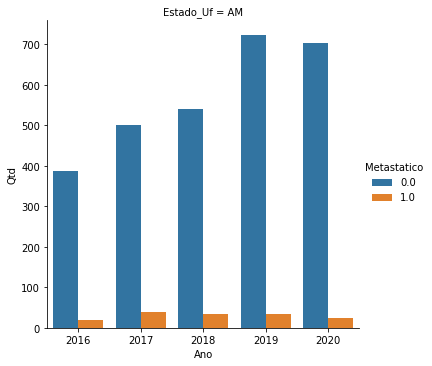

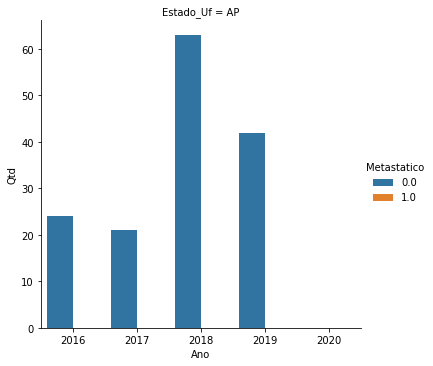

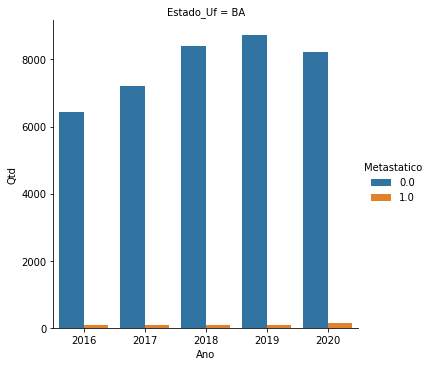

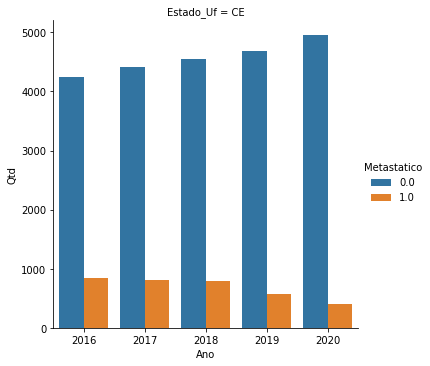

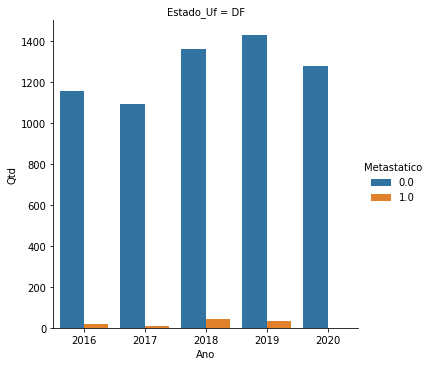

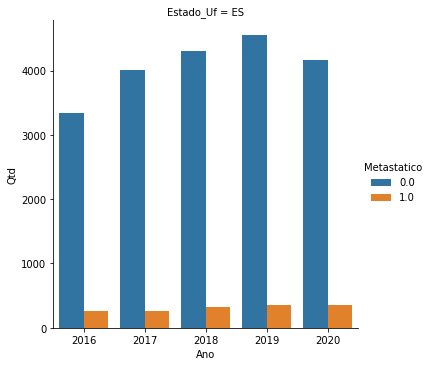

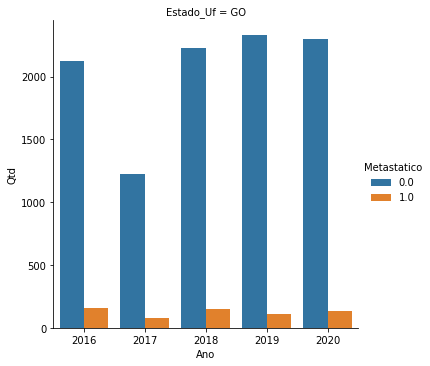

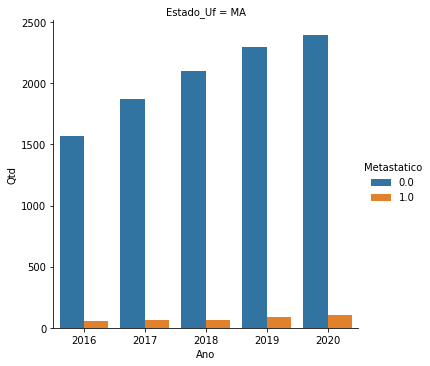

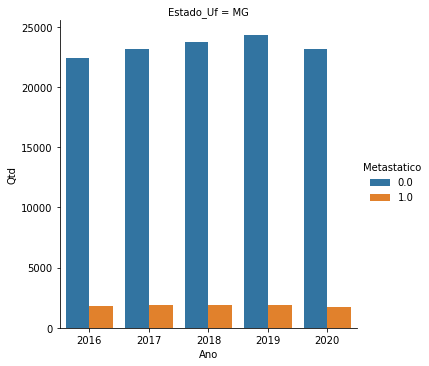

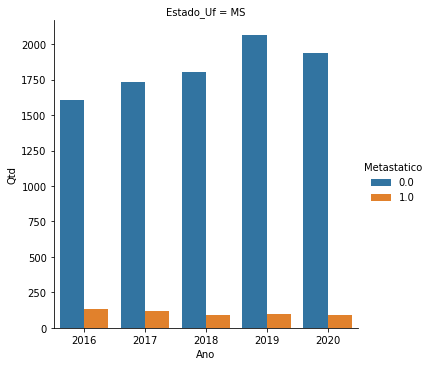

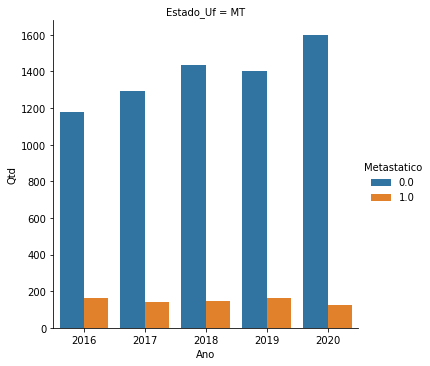

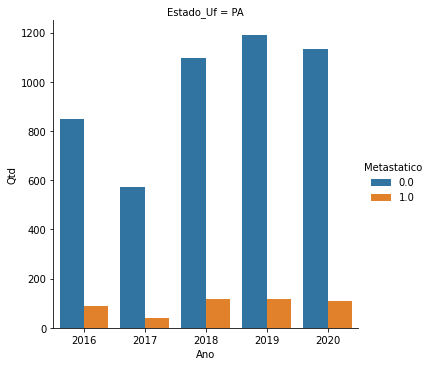

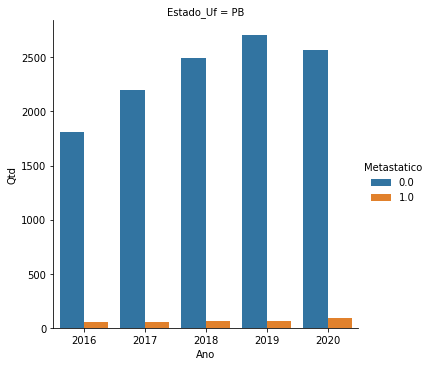

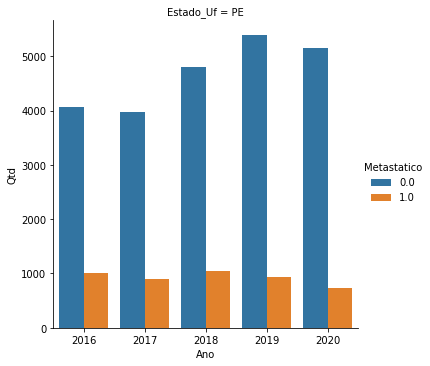

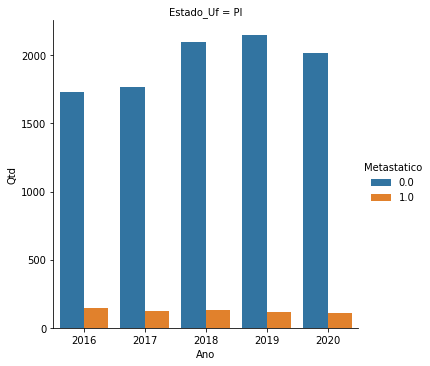

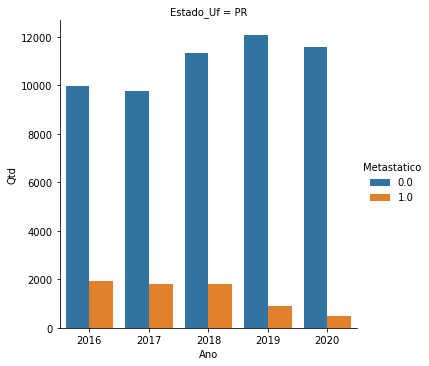

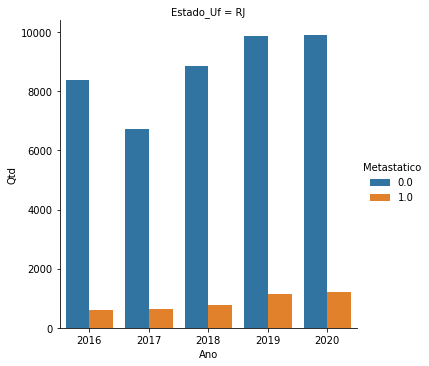

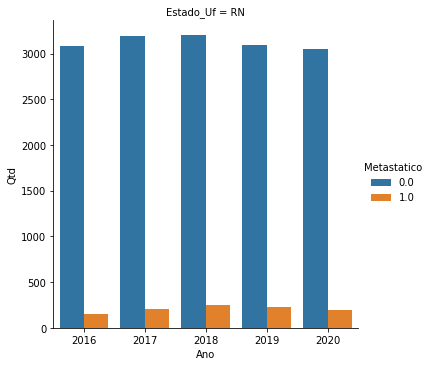

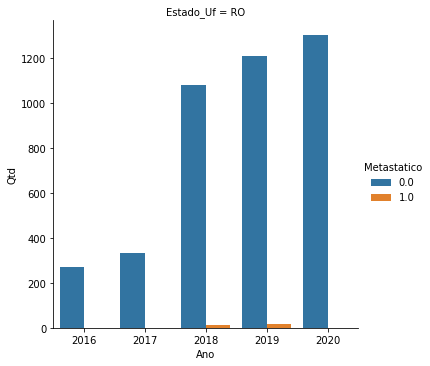

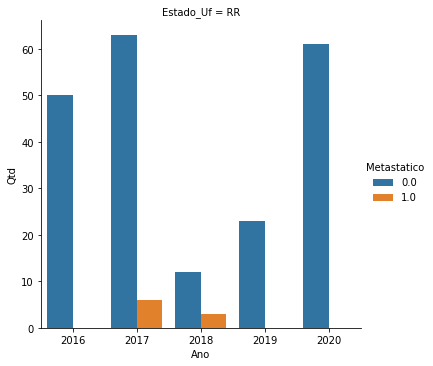

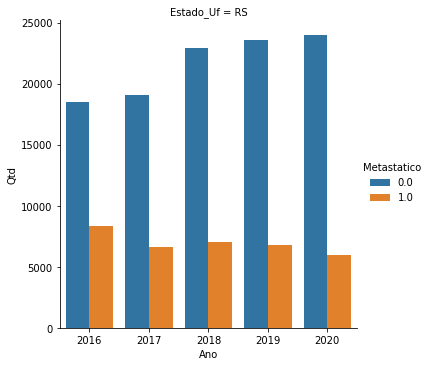

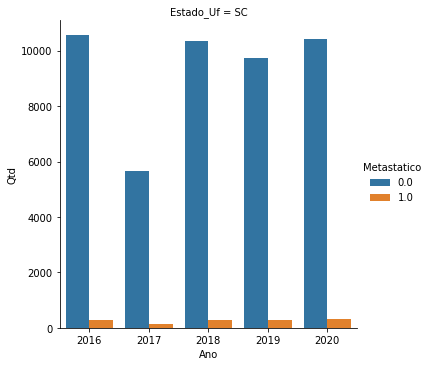

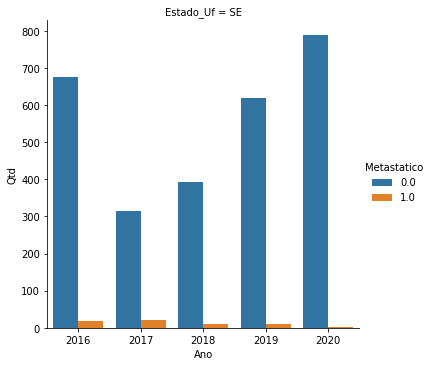

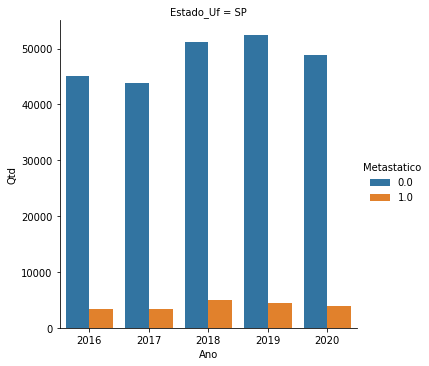

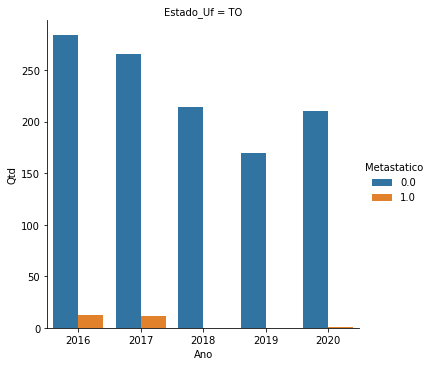

In [ ]:
#AP_ESTADI == 1
for uf in df_var_07.Estado_Uf.unique():
  filtro = (df_var_07.Estado_Uf==uf) & (df_var_07.Aq_Estadi==1)
  sns.catplot(x="Ano", y='Qtd', hue="Metastatico",col='Estado_Uf', data=df_var_07[filtro], kind="bar", ci=0.68)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning

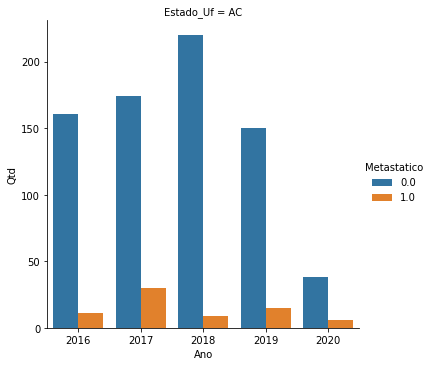

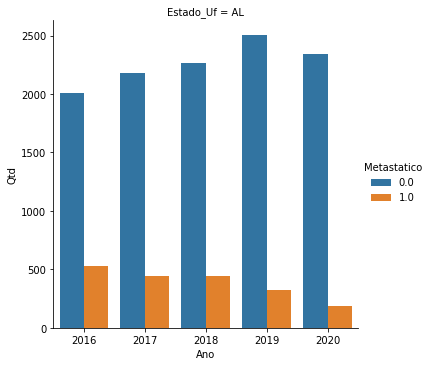

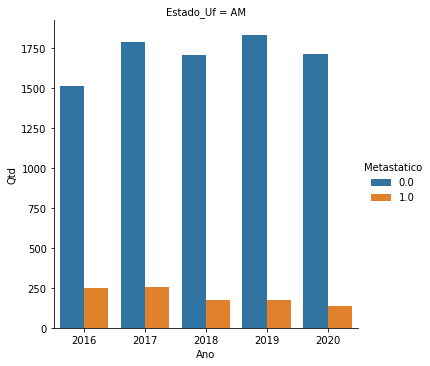

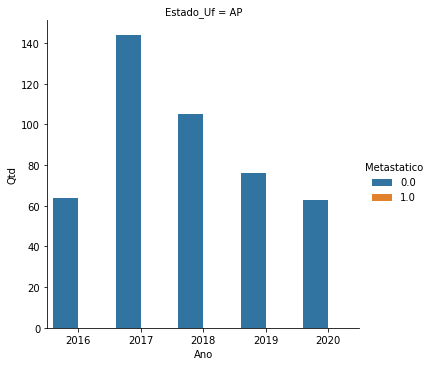

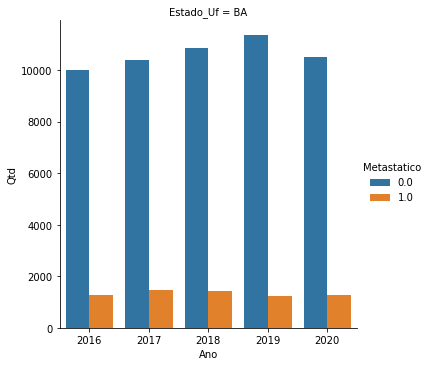

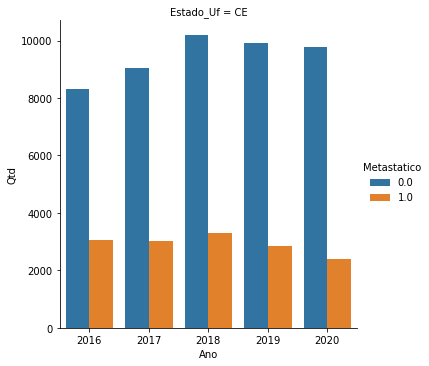

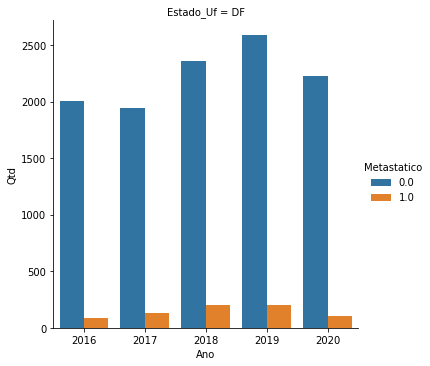

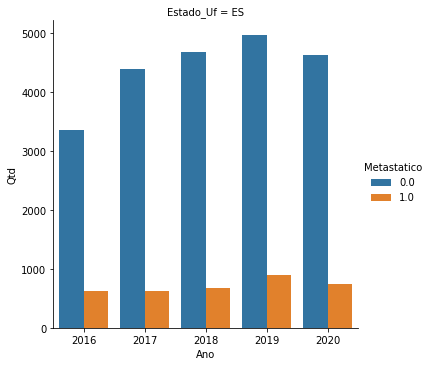

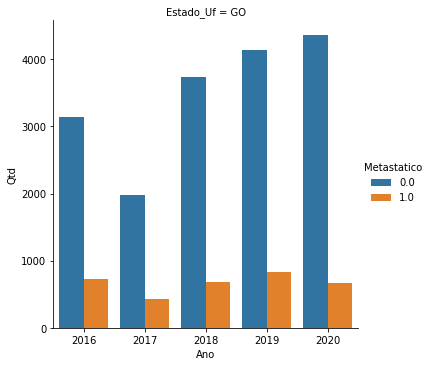

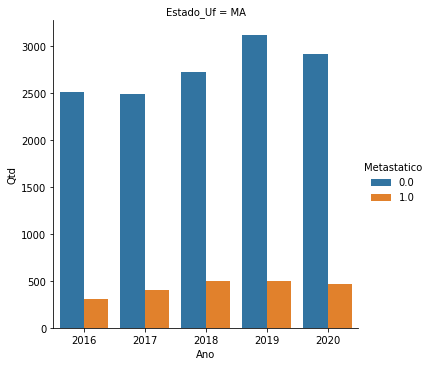

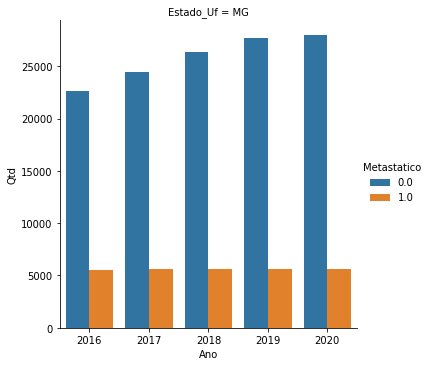

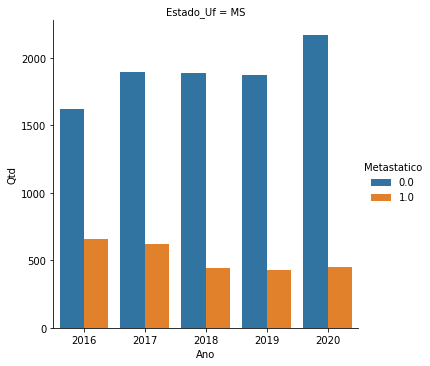

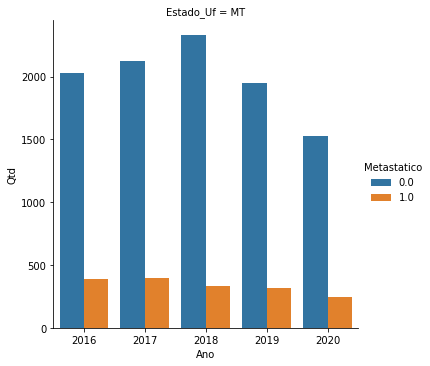

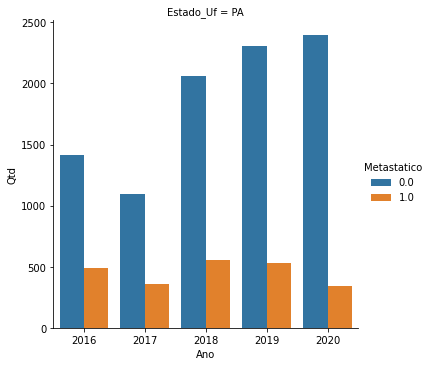

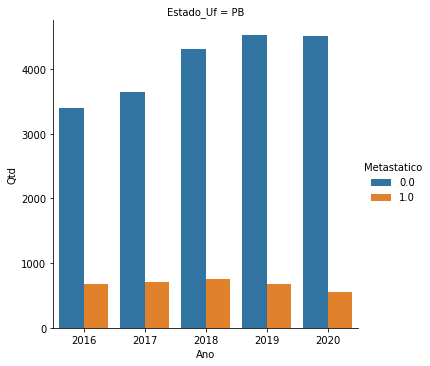

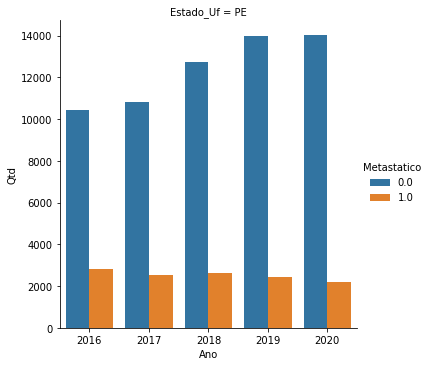

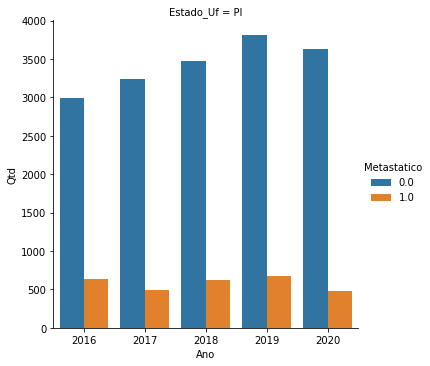

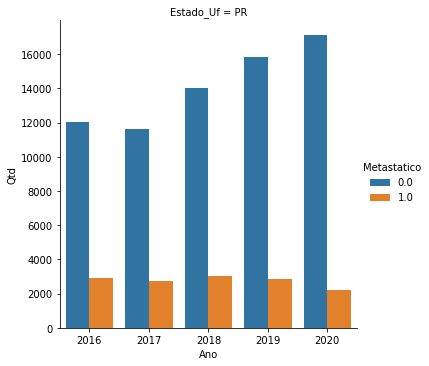

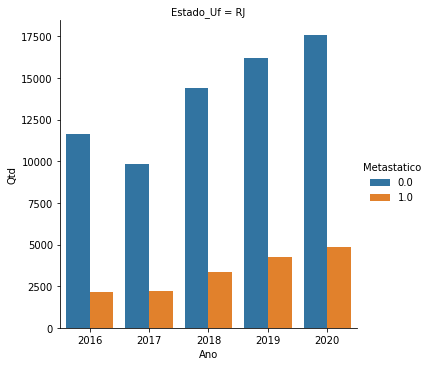

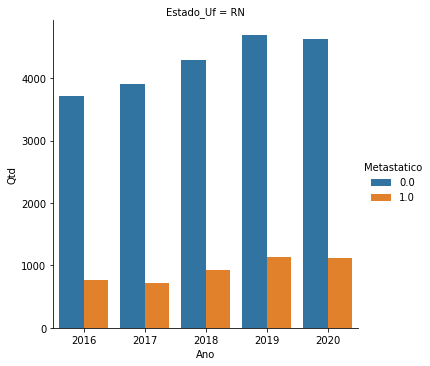

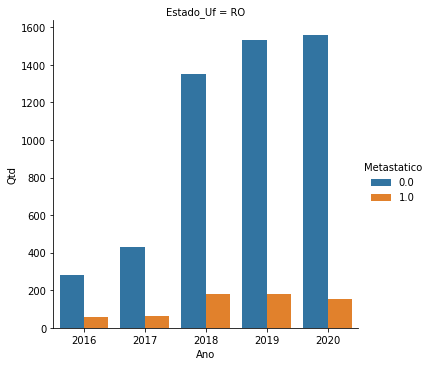

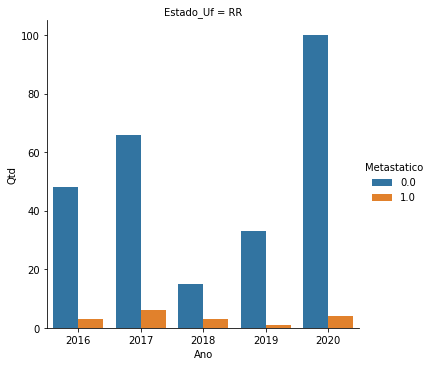

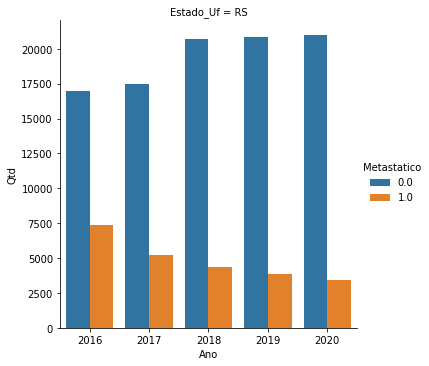

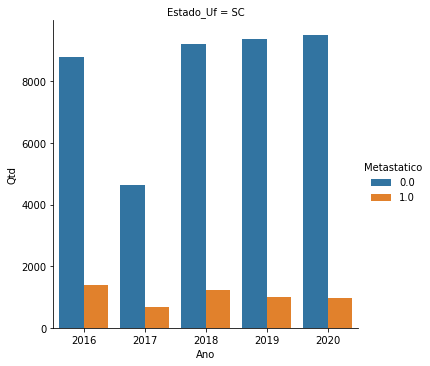

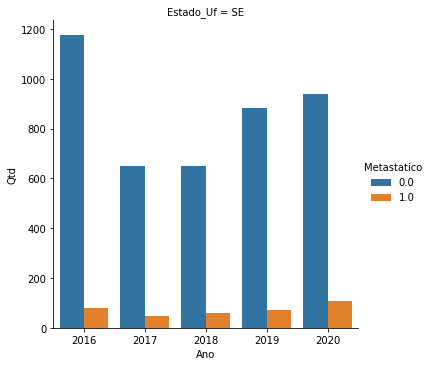

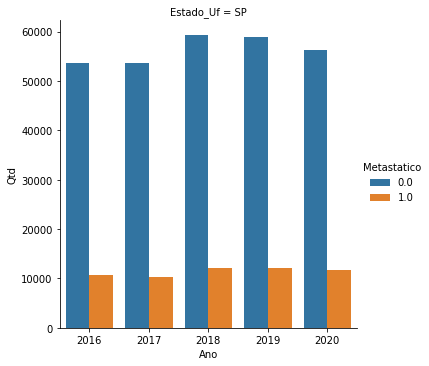

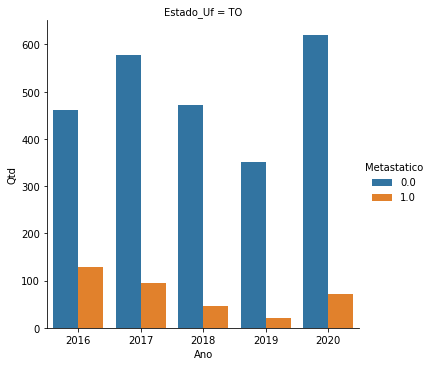

In [ ]:
#AP_ESTADI == 2
for uf in df_var_07.Estado_Uf.unique():
  filtro = (df_var_07.Estado_Uf==uf) & (df_var_07.Aq_Estadi==2)
  sns.catplot(x="Ano", y='Qtd', hue="Metastatico",col='Estado_Uf', data=df_var_07[filtro], kind="bar", ci=0.68)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning

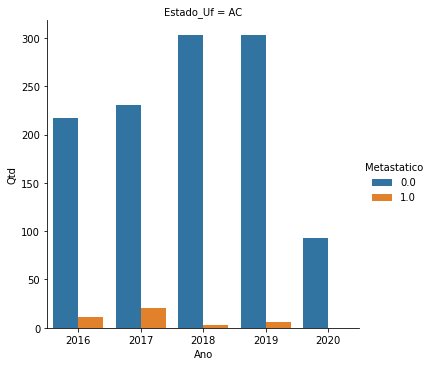

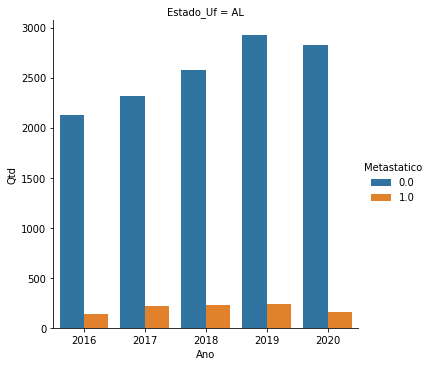

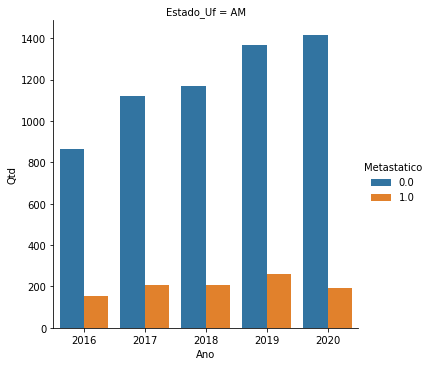

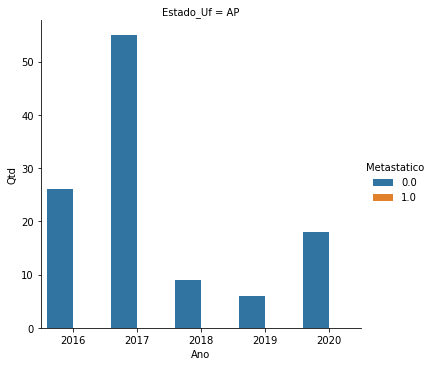

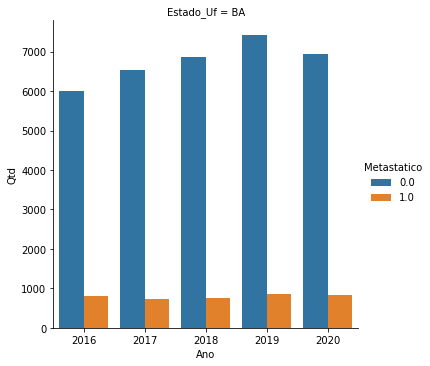

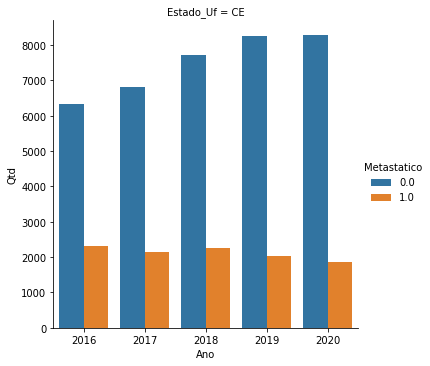

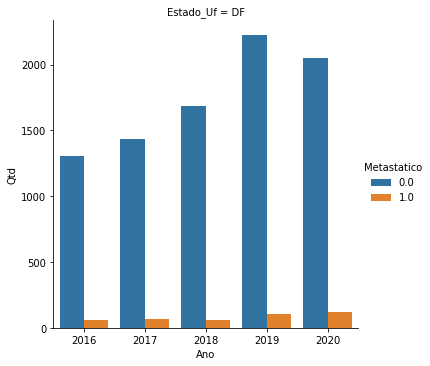

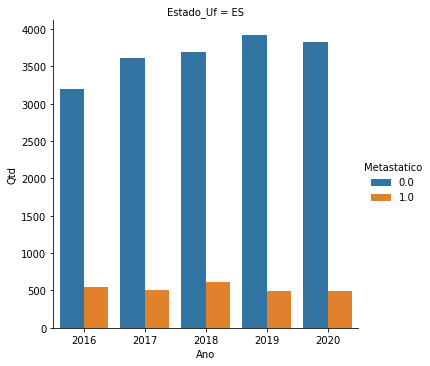

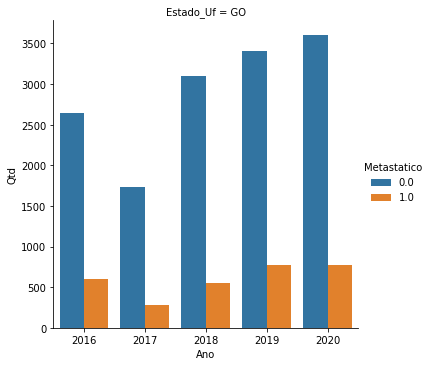

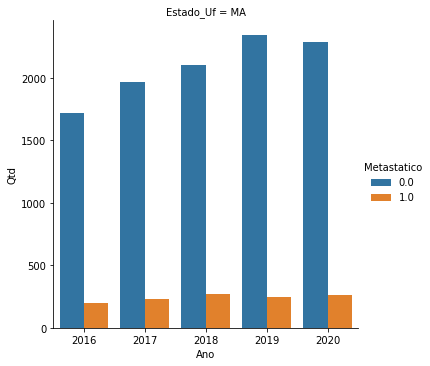

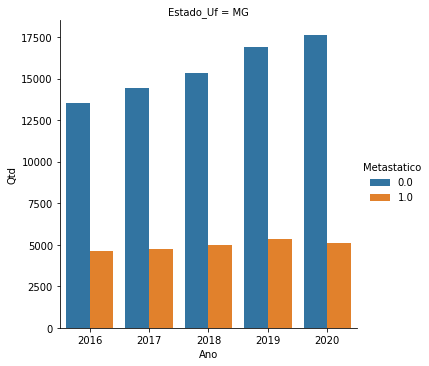

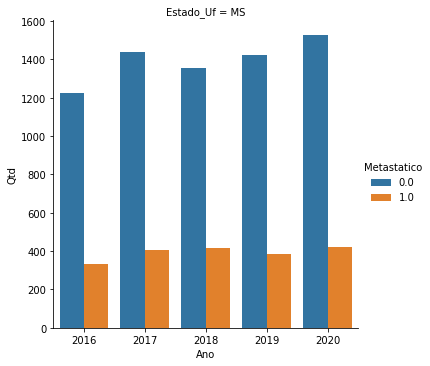

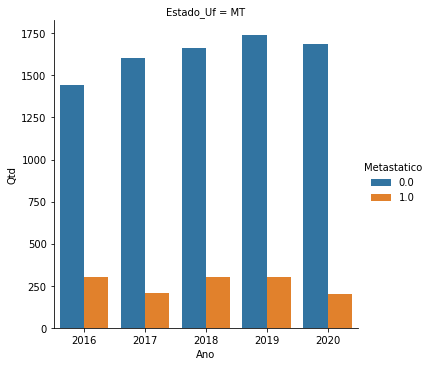

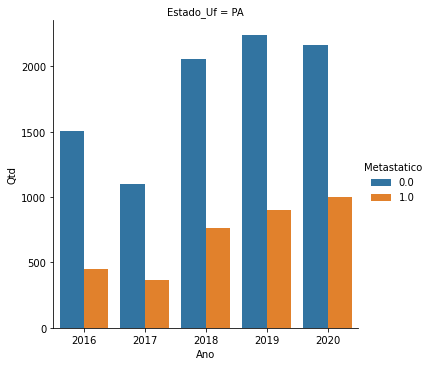

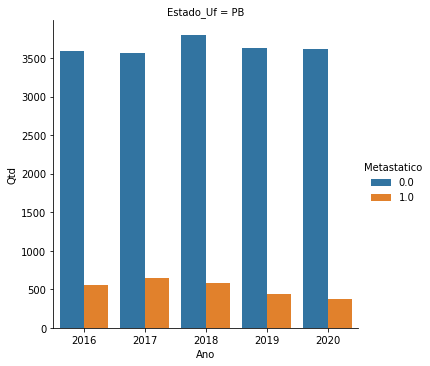

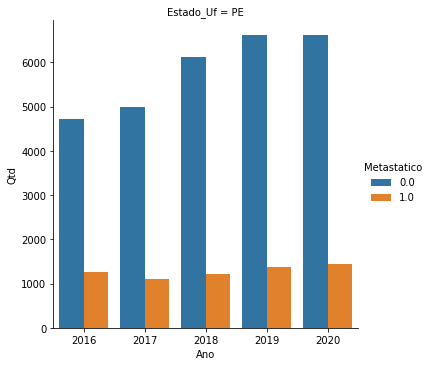

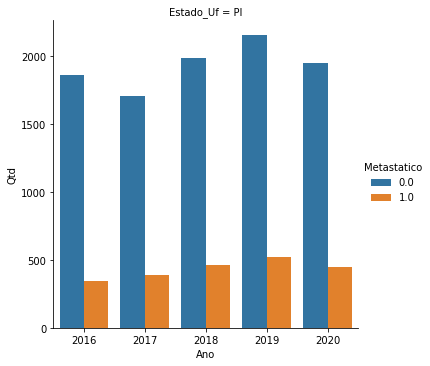

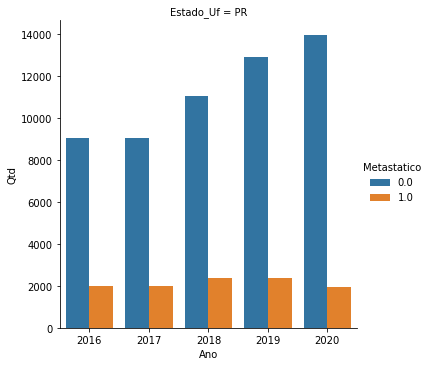

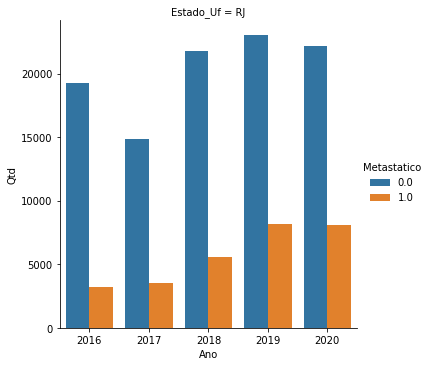

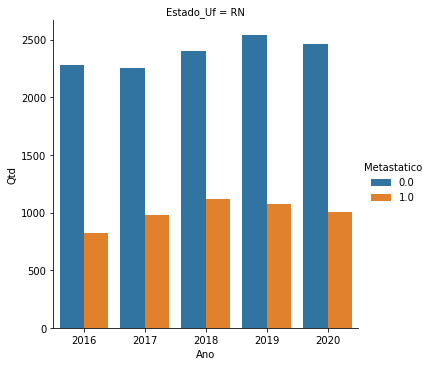

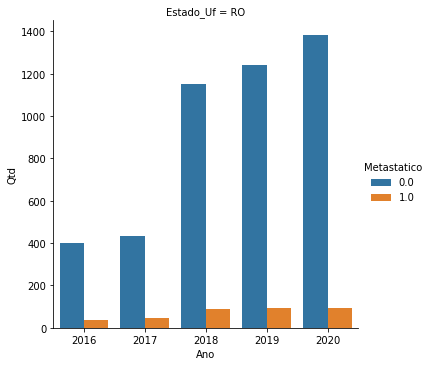

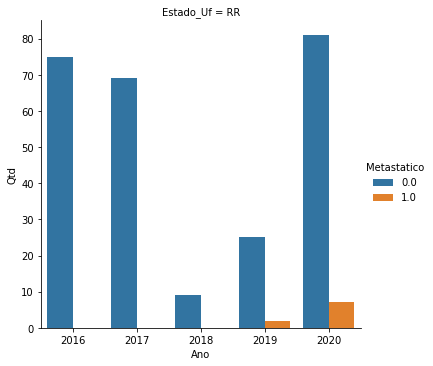

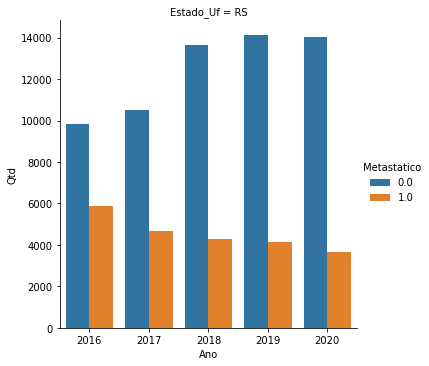

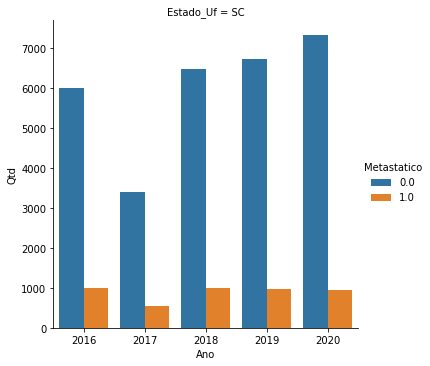

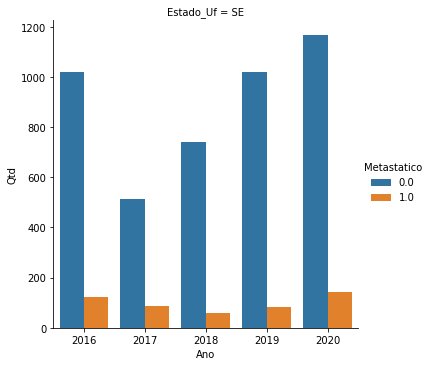

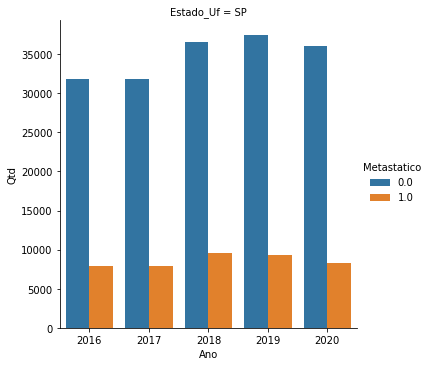

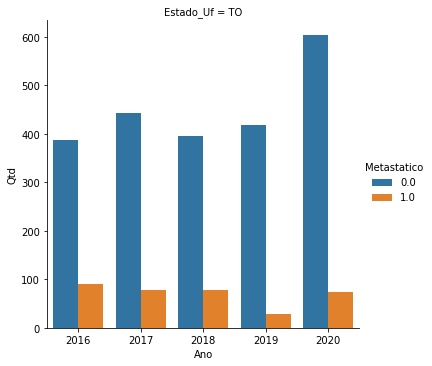

In [ ]:
#AP_ESTADI == 3
for uf in df_var_07.Estado_Uf.unique():
  filtro = (df_var_07.Estado_Uf==uf) & (df_var_07.Aq_Estadi==3)
  sns.catplot(x="Ano", y='Qtd', hue="Metastatico",col='Estado_Uf', data=df_var_07[filtro], kind="bar", ci=0.68)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning

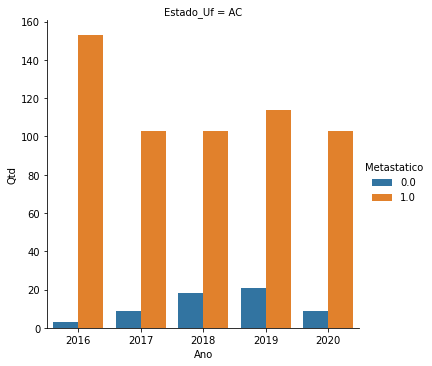

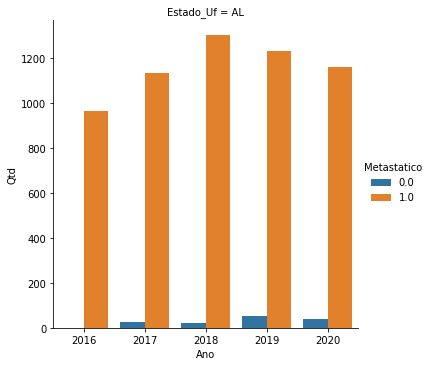

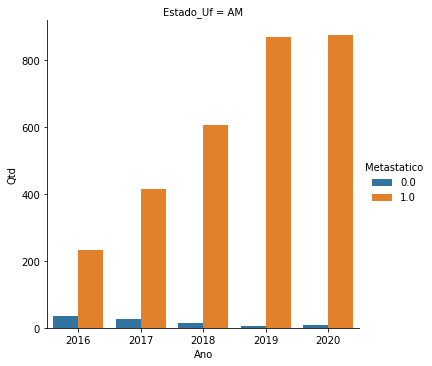

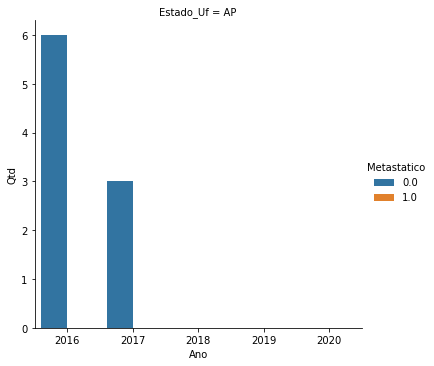

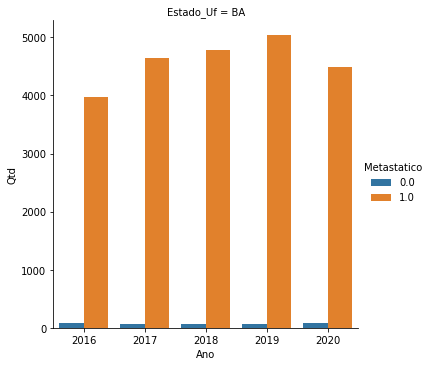

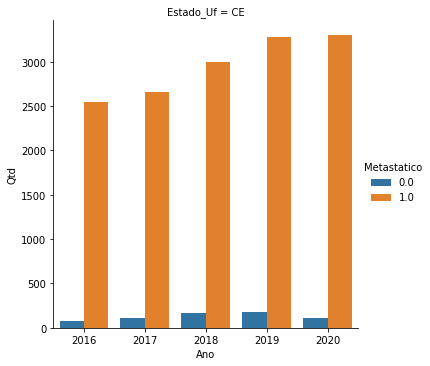

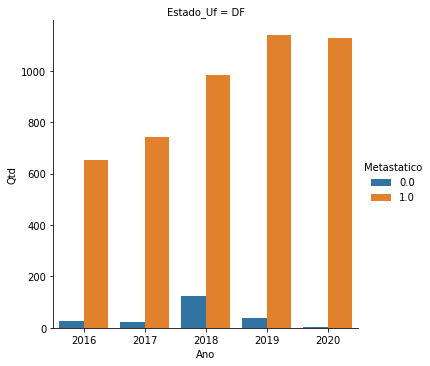

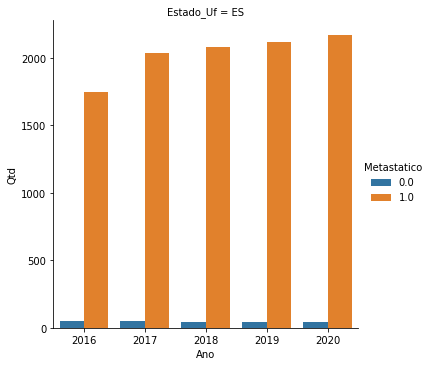

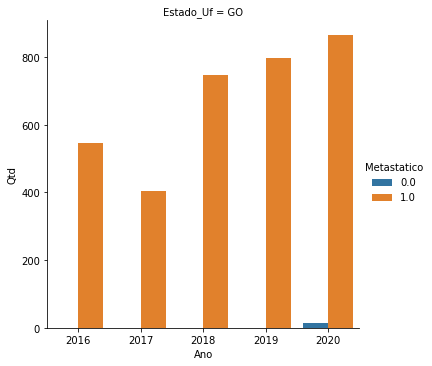

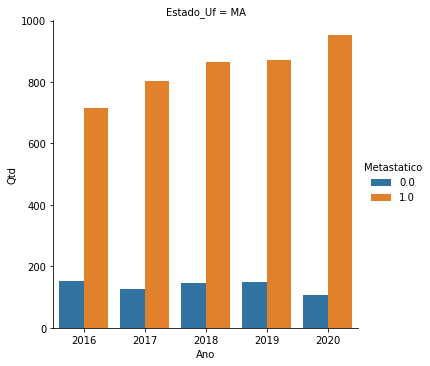

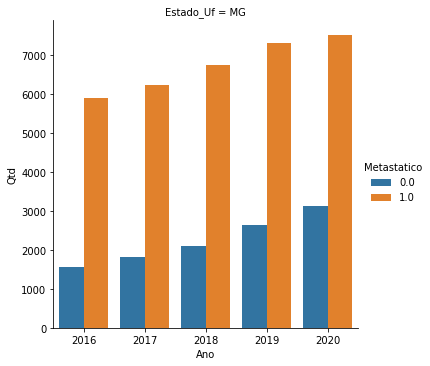

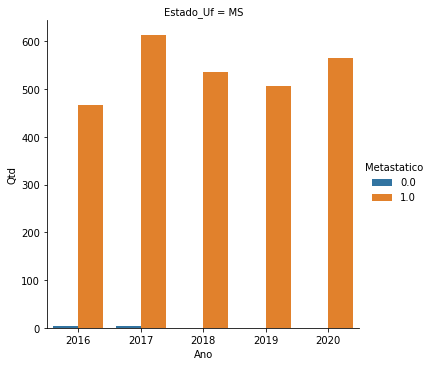

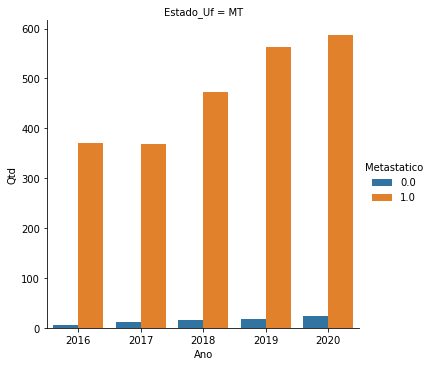

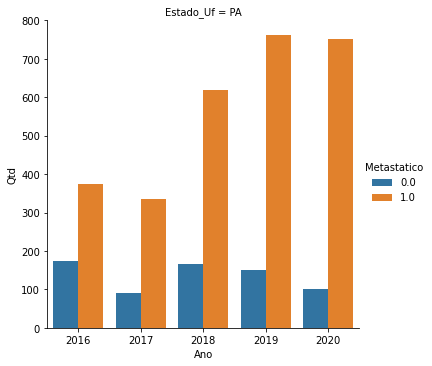

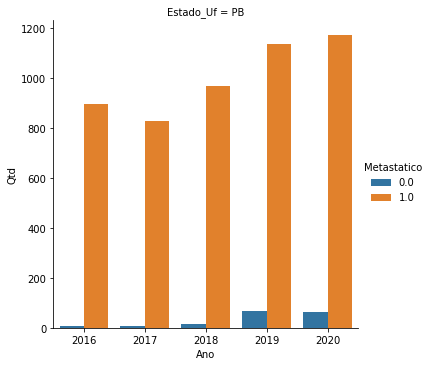

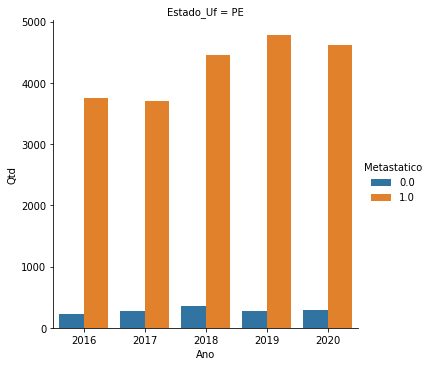

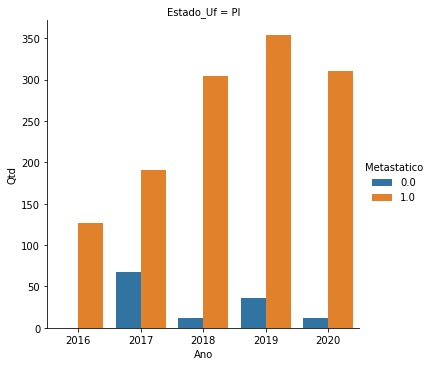

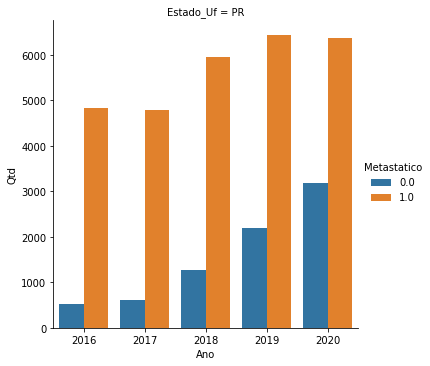

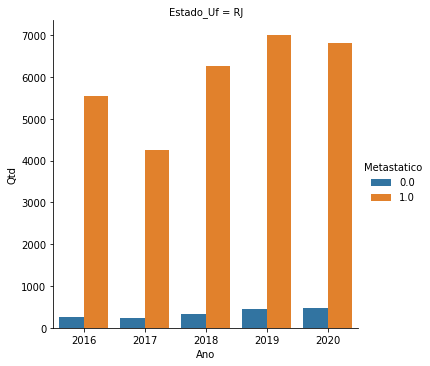

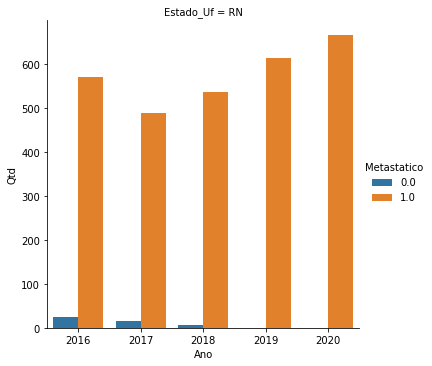

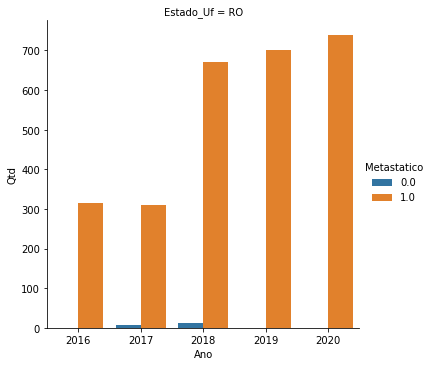

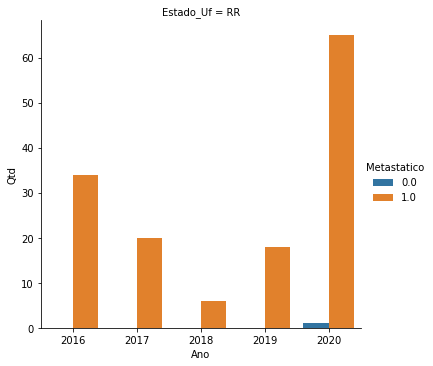

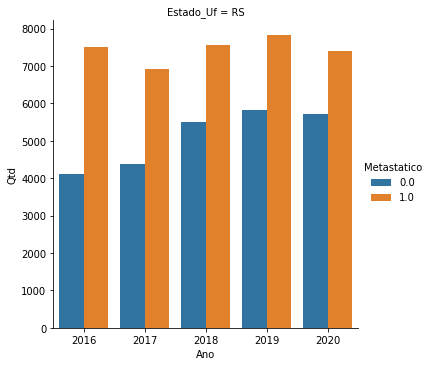

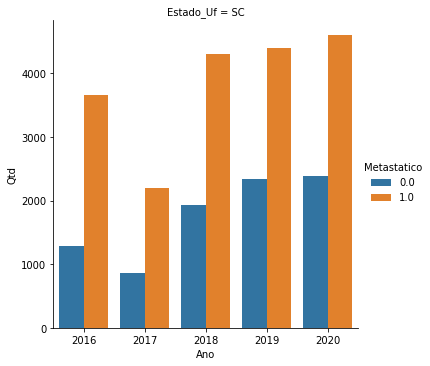

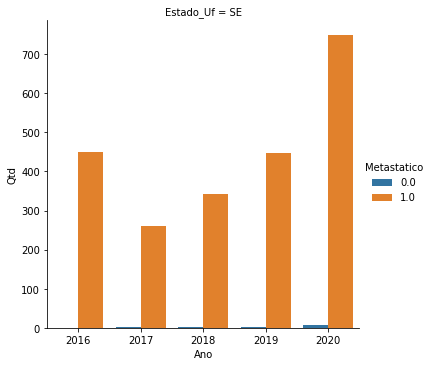

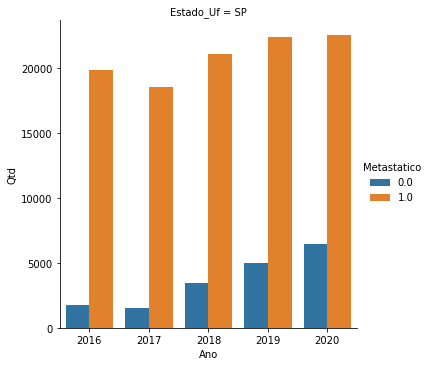

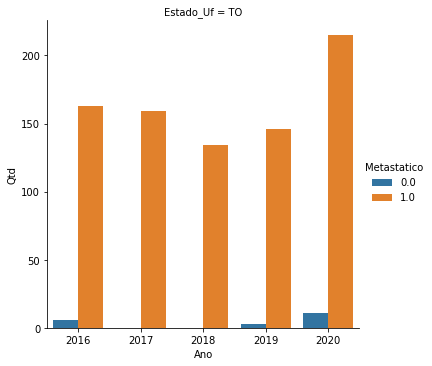

In [ ]:
#AP_ESTADI == 4
for uf in df_var_07.Estado_Uf.unique():
  filtro = (df_var_07.Estado_Uf==uf) & (df_var_07.Aq_Estadi==4)
  sns.catplot(x="Ano", y='Qtd', hue="Metastatico",col='Estado_Uf', data=df_var_07[filtro], kind="bar", ci=0.68)

# Por Datas

In [ ]:
df_2["DTSOLIC"] = df_2["DTSOLIC"].astype("datetime64")
df_2.head()

Idx  AP_NUIDADE  AP_TPAPAC AP_CIDPRI  ...    DTSOLIC METASTATICO   ANO  QTD
0    0          60          1      C500  ... 2018-04-30         0.0  2018    1
1    1          60          1      C500  ... 2018-07-31         0.0  2018    1
2    2          60          1      C500  ... 2018-05-31         1.0  2018    1
3    3          60          1      C500  ... 2019-03-31         0.0  2019    1
4    4          60          1      C500  ... 2018-12-31         0.0  2018    1

[5 rows x 12 columns]

Todos os Dados por mês

# Por anos e meses do ano

In [ ]:
df_08 = df_2.groupby(['ANO','DTSOLIC','ESTADO_UF','METASTATICO'], as_index=False, dropna=False)['QTD'].sum()
df_08.head()

ANO    DTSOLIC ESTADO_UF  METASTATICO  QTD
0  2016 2016-01-31        AC          0.0   44
1  2016 2016-01-31        AC          1.0   14
2  2016 2016-01-31        AL          0.0  463
3  2016 2016-01-31        AL          1.0  119
4  2016 2016-01-31        AM          0.0   91

In [ ]:
df_var_08 = pd.DataFrame(columns=['Ano','DtSolic','Metastatico', 'Qtd'])
i=0
for ano in df_08.ANO.unique():
  for meta in df_08.METASTATICO.unique():
    for dtsolic in df_08.DTSOLIC[df_08.ANO==ano].unique():
      mesAtual = df_08.QTD[(df_08.ANO == ano) & (df_08.METASTATICO == meta) & (df_08.DTSOLIC==dtsolic)].sum()
      vet = [str(ano),dtsolic, meta, mesAtual]

      df_var_08.loc[i] = vet
      i+=1
df_var_08.head()

Ano    DtSolic  Metastatico    Qtd
0  2016 2016-01-31          0.0  43290
1  2016 2016-02-29          0.0  37281
2  2016 2016-03-31          0.0  37916
3  2016 2016-04-30          0.0  42809
4  2016 2016-05-31          0.0  38932

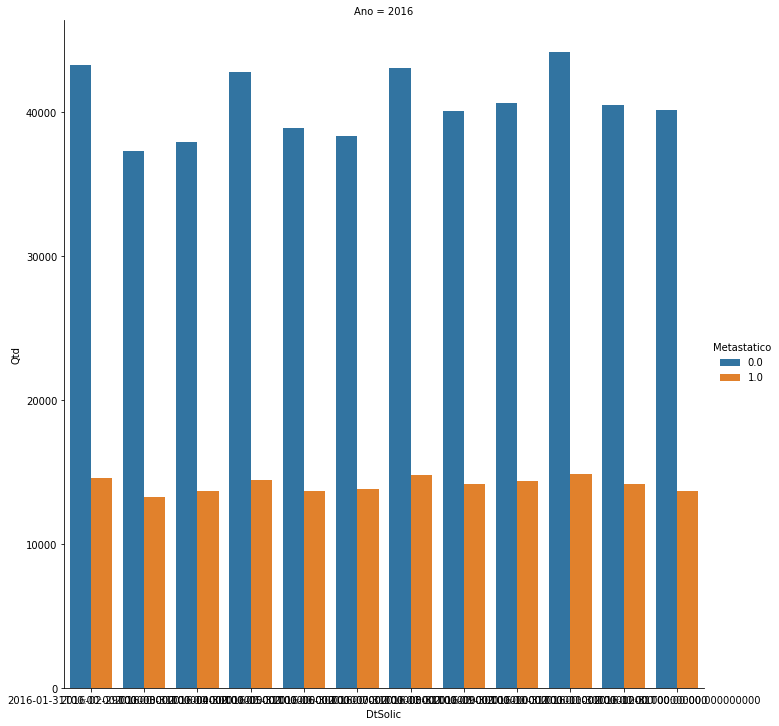

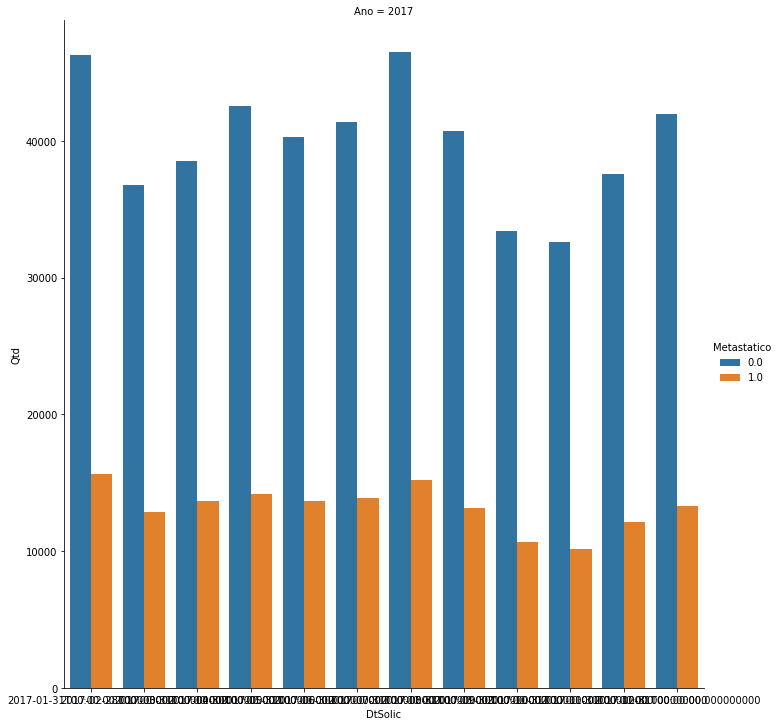

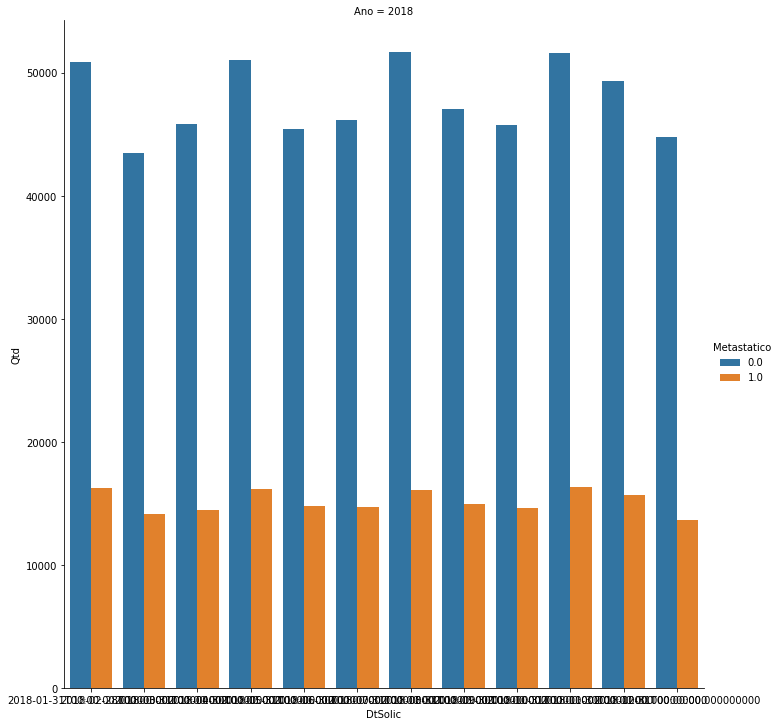

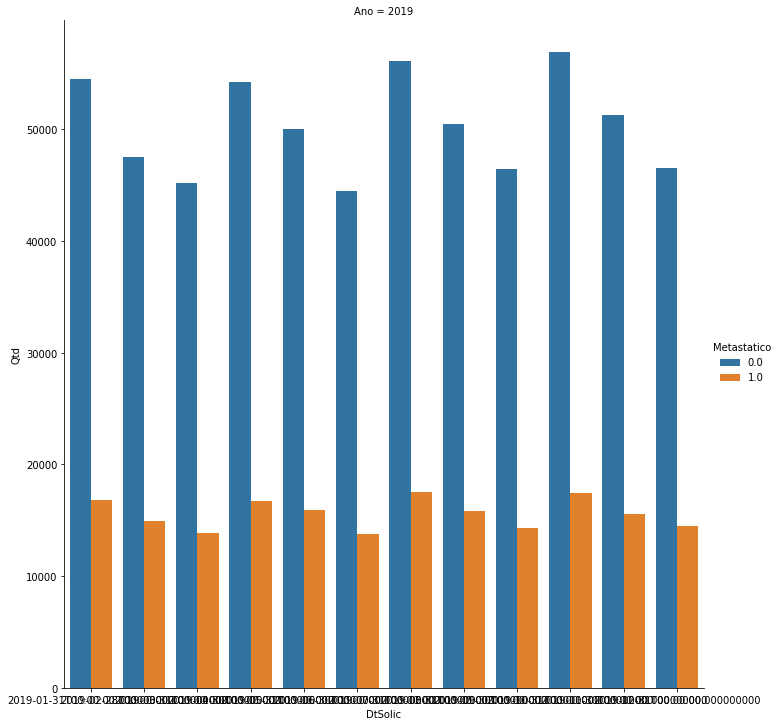

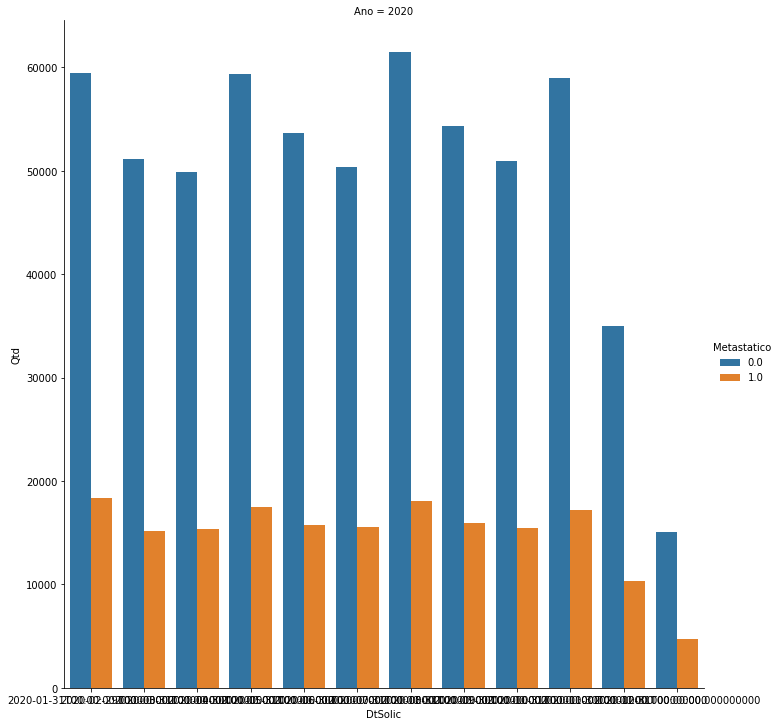

In [ ]:
for ano in df_var_08.Ano.unique():
  filtro = (df_var_08.Ano == ano)
  sns.catplot(x="DtSolic", y='Qtd', hue="Metastatico",col='Ano', data=df_var_08[filtro], kind="bar", ci=0.68, height=5)

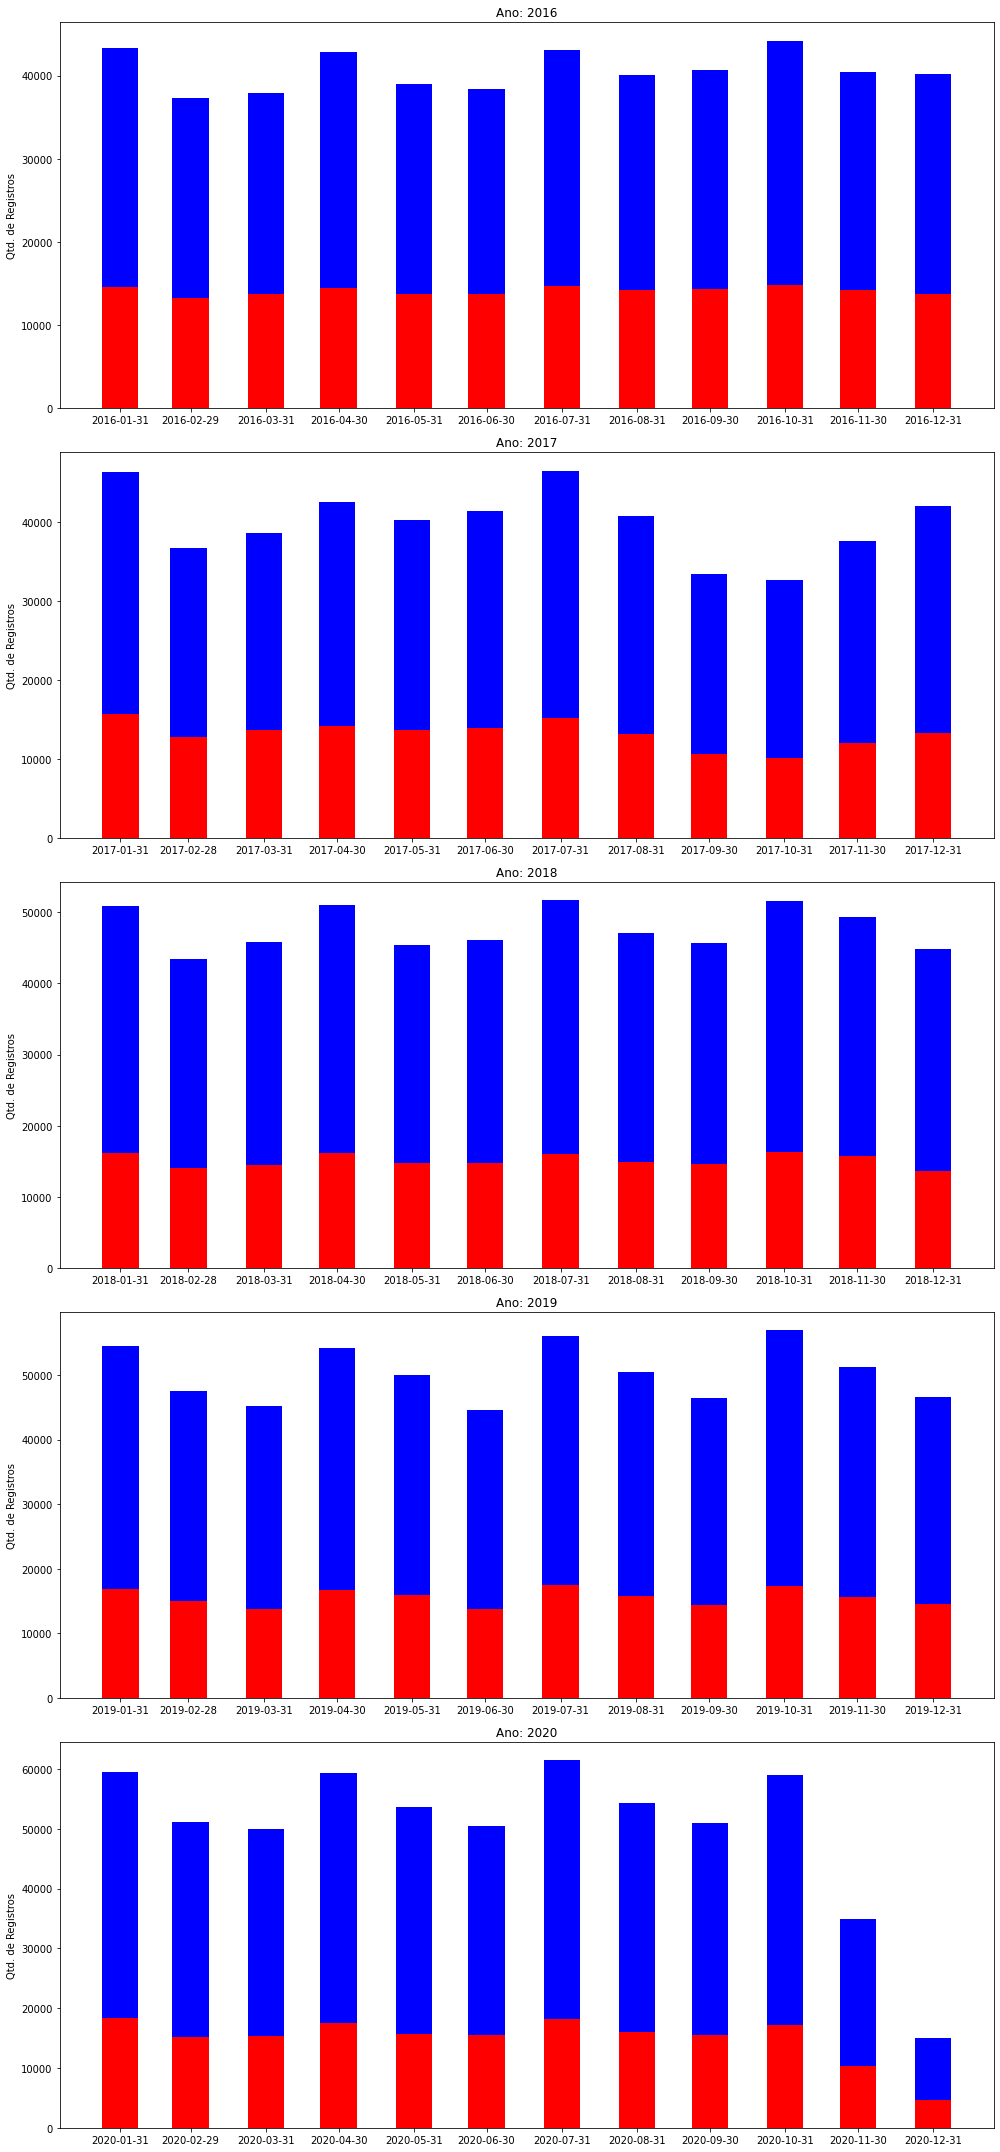

In [ ]:
anos = df_2.ANO.sort_values().unique()
fig, axes = plt.subplots(nrows=len(anos), ncols=1, figsize=(14,30))
i = 0
for ano in anos:    
  filtro =  (df_2['ANO']==ano)
  df_datas = df_2[filtro].groupby(["DTSOLIC","METASTATICO"], as_index=False, dropna=False)['QTD'].sum()
  
  filtro1 = (df_datas.METASTATICO==0)
  x1 = df_datas.DTSOLIC[filtro1]
  y1 = df_datas.QTD[filtro1]
  y_labels = df_datas.QTD
  axes[i].bar(x1, y1, color='b', width = 15)
  
  #for idx in range(0,len(x1)):
    #axes[i].text(x1[idx], y1[idx], y1[idx])#, fontsize=10)

  xticks = df_datas.DTSOLIC.unique()
  axes[i].set_xticks(xticks)
  axes[i].set_ylabel('Qtd. de Registros')

  # Barra por Metastatico = 1
  filtro2 = (df_datas.METASTATICO==1)
  x2 = df_datas.DTSOLIC[filtro2]
  y2 = df_datas.QTD[filtro2]
  
  #y_labels2 = df_datas2.QTD
  axes[i].bar(x2, y2, color='r', width = 15)

  #axes[i].legend(labels=['Metastatico=0', 'Metastatico=1'])

  #for idx in range(0,len(x2)):
    #axes[i].text(x2[idx], y2[idx], y2[idx], fontsize=10)
  
  axes[i].set_title('Ano: '+ str(ano))
  i=i+1
fig.tight_layout()

# Por Estado e por Data(Mês/Ano)

In [ ]:
df_09 = df_2.groupby(['ANO','DTSOLIC','ESTADO_UF','METASTATICO'], as_index=False, dropna=False)['QTD'].sum()
df_09['MES'] =[ (str(dt).split('-')[1]) for dt in df_09.DTSOLIC ]
df_09.head()

ANO    DTSOLIC ESTADO_UF  METASTATICO  QTD MES
0  2016 2016-01-31        AC          0.0   44  01
1  2016 2016-01-31        AC          1.0   14  01
2  2016 2016-01-31        AL          0.0  463  01
3  2016 2016-01-31        AL          1.0  119  01
4  2016 2016-01-31        AM          0.0   91  01

In [ ]:
for ano in df_var_08.Ano.unique():
  filtro = (df_var_08.Ano == ano)
  sns.catplot(x="DtSolic", y='Qtd', hue="Metastatico",col='Ano', data=df_var_08[filtro], kind="bar", ci=0.68, height=10)

In [ ]:
def graficoEstadoPorData(df, uf):
  anos = df.ANO.sort_values().unique()
  for ano in anos:  
    filtro = (df_09.ANO == ano) & (df_09.ESTADO_UF==uf)
    sns.catplot(x="MES", y='QTD', hue="METASTATICO", col='ANO', data=df_09[filtro], kind="bar", ci=0.68, height=5)

ACRE

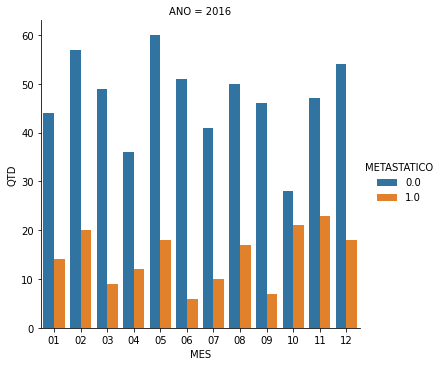

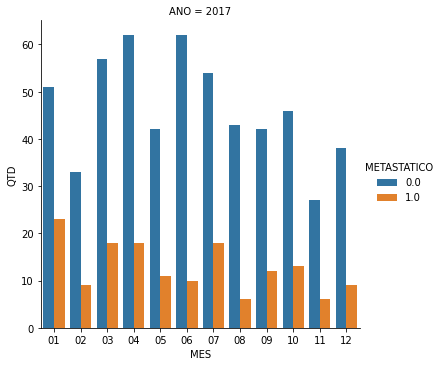

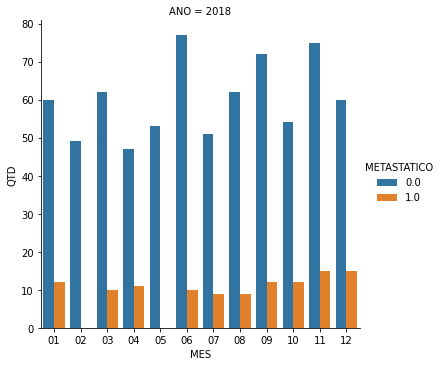

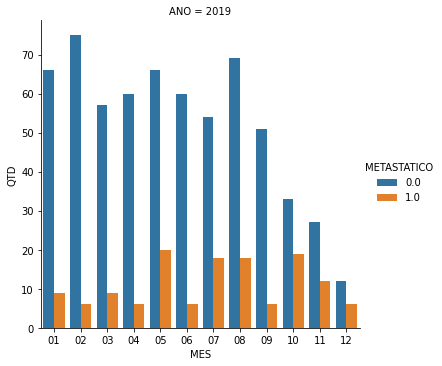

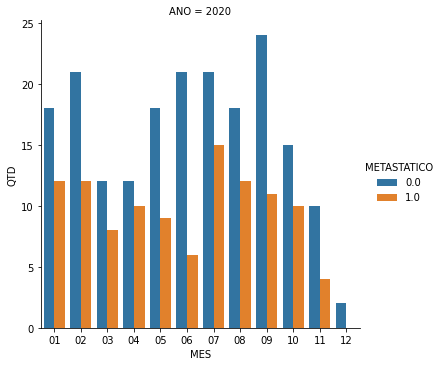

In [ ]:
graficoEstadoPorData(df_2, 'AC')

ALAGOAS

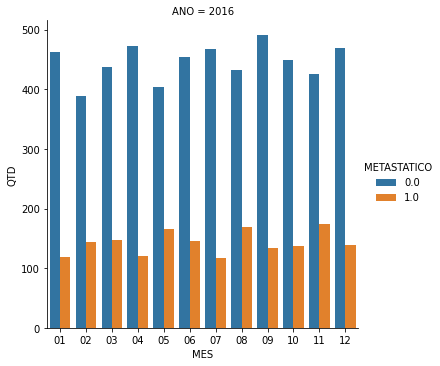

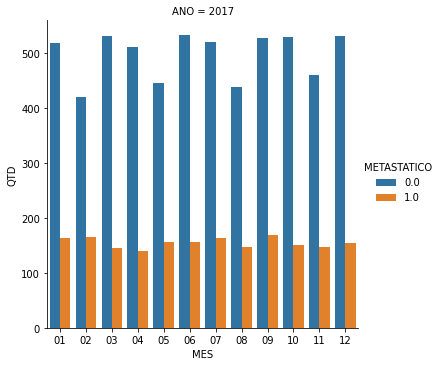

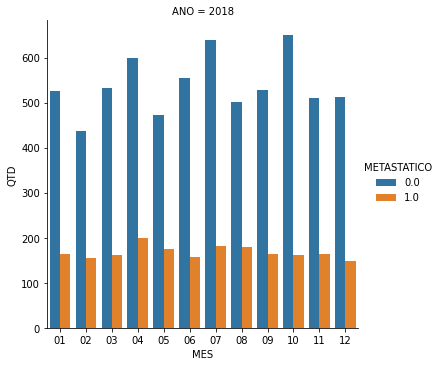

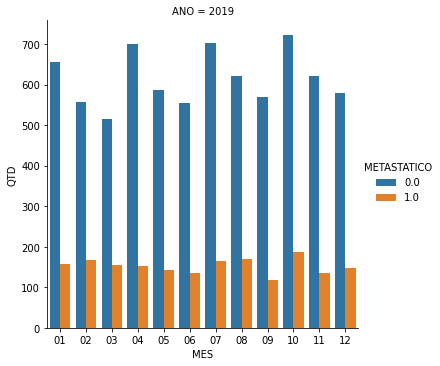

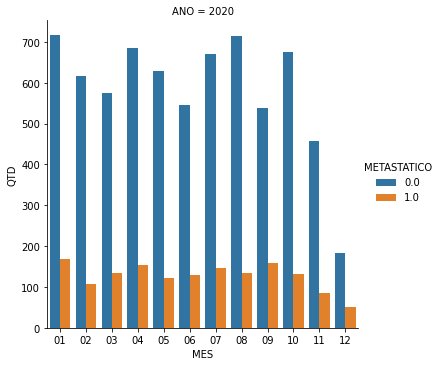

In [ ]:
graficoEstadoPorData(df_2, 'AL')

AMAZONAS

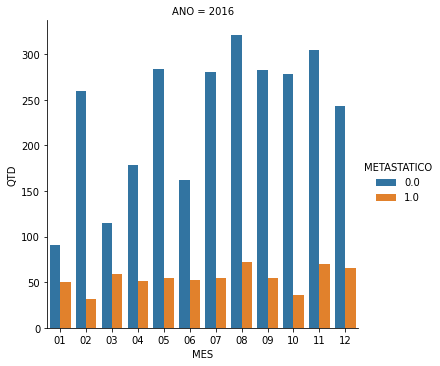

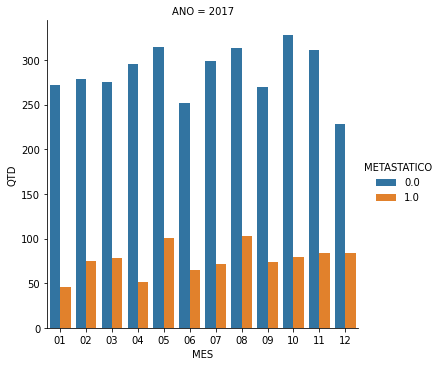

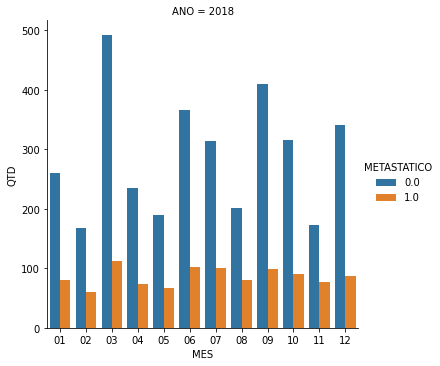

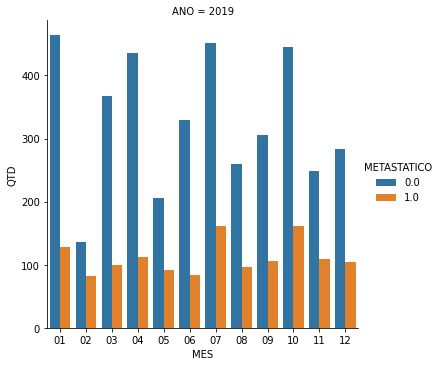

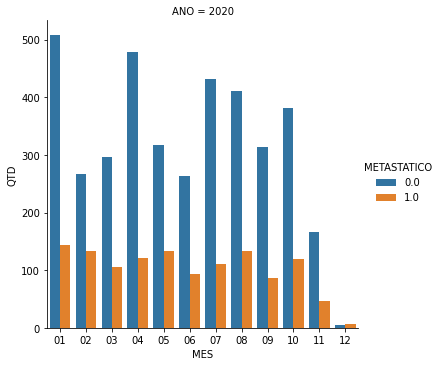

In [ ]:
graficoEstadoPorData(df_2, 'AM')

BAHIA

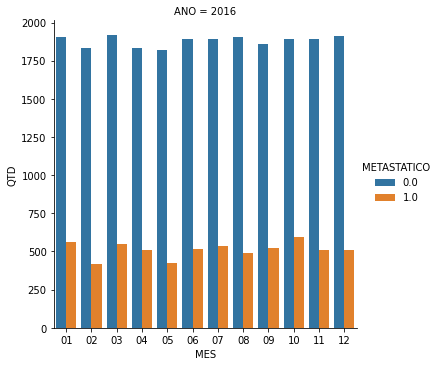

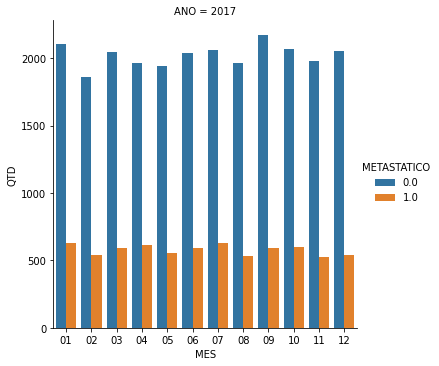

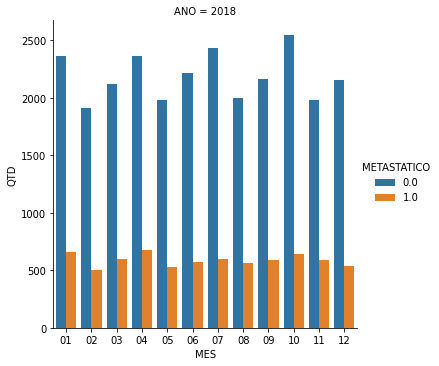

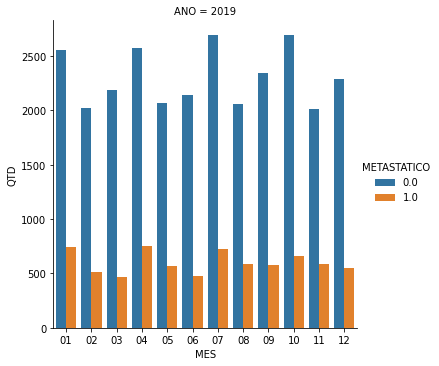

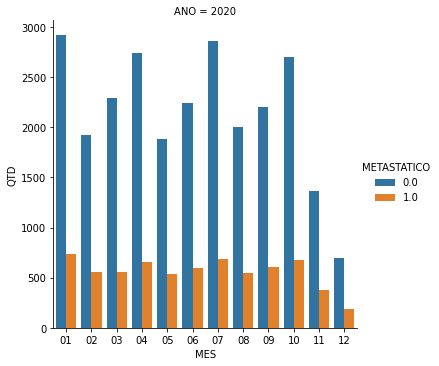

In [ ]:
graficoEstadoPorData(df_2, 'BA')

CEARA

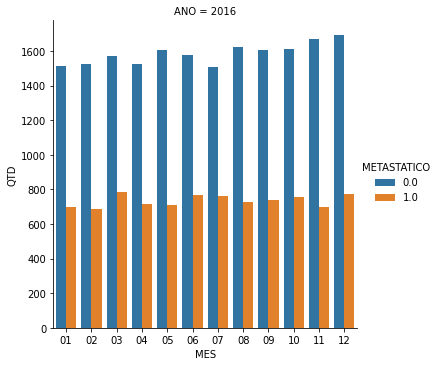

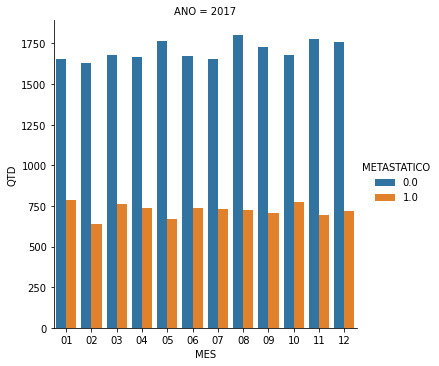

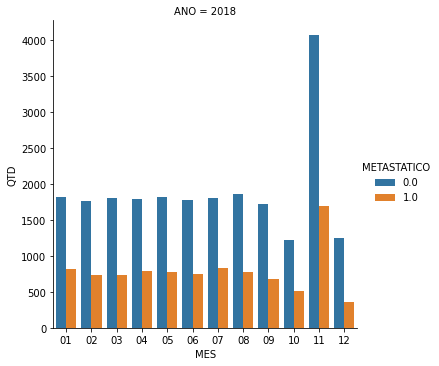

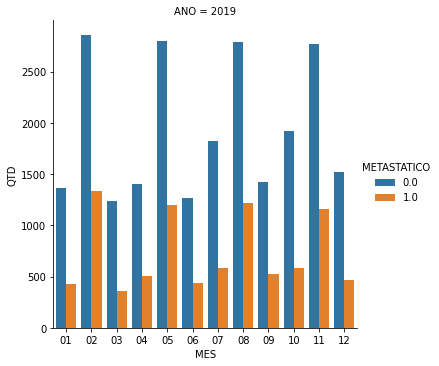

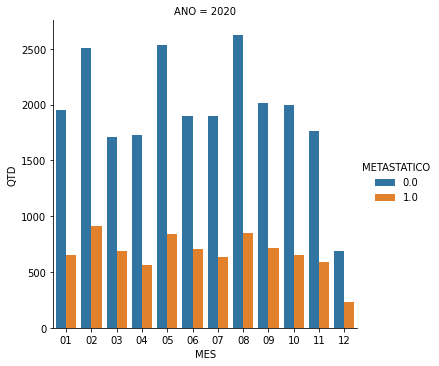

In [ ]:
graficoEstadoPorData(df_2, 'CE')

DISTRITO FEDERAL

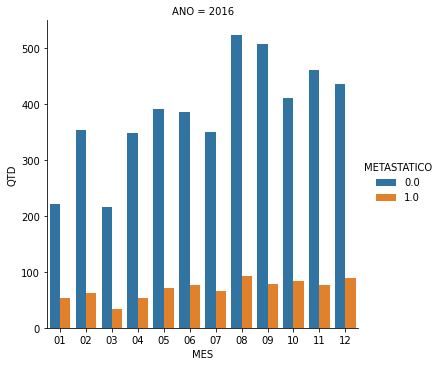

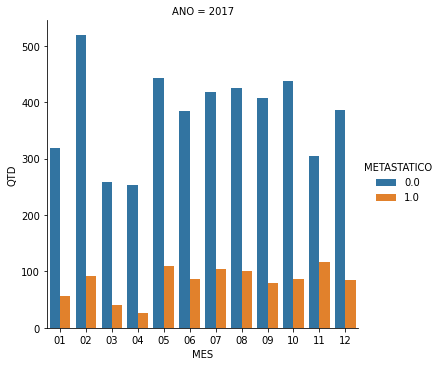

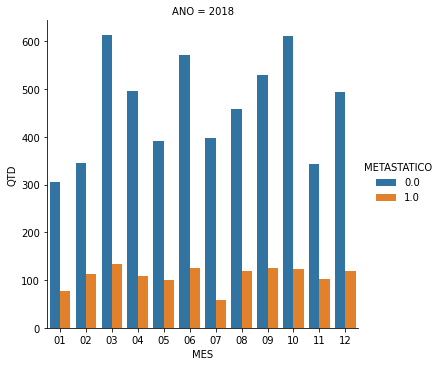

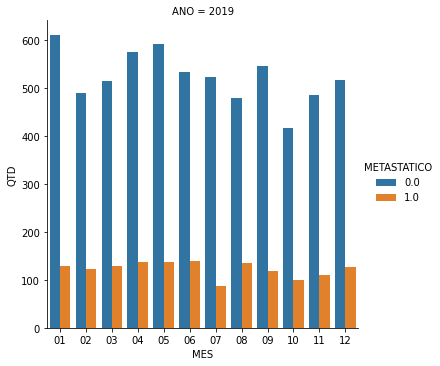

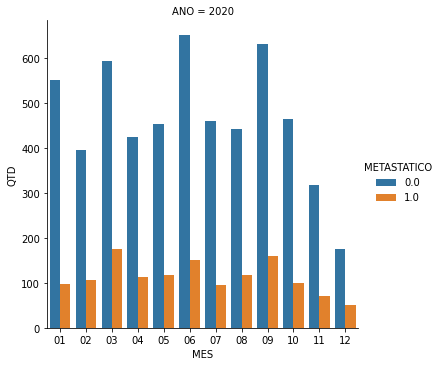

In [ ]:
graficoEstadoPorData(df_2, 'DF')

ESPIRITO SANTO

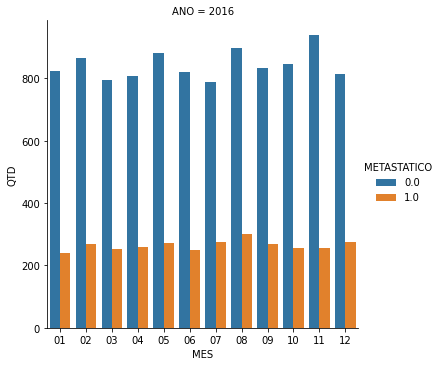

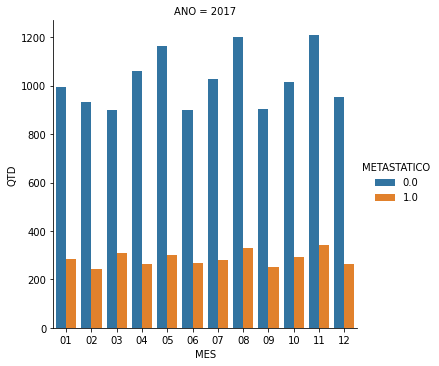

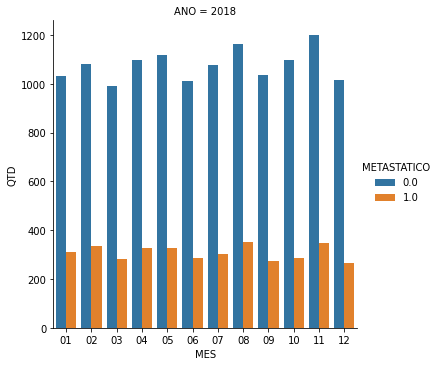

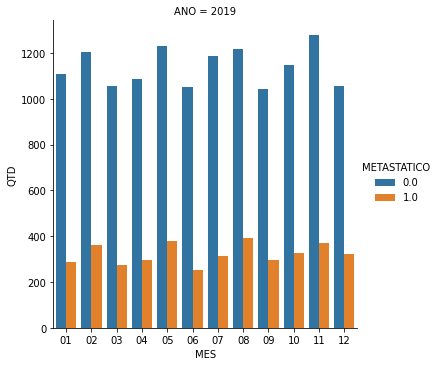

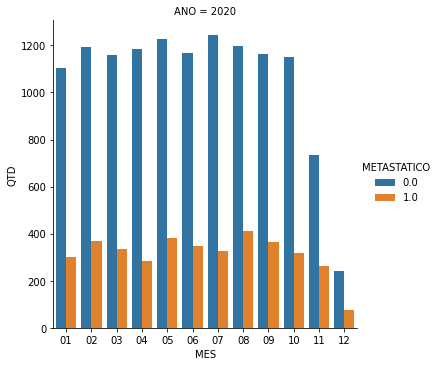

In [ ]:
graficoEstadoPorData(df_2, 'ES')

GOIÁS

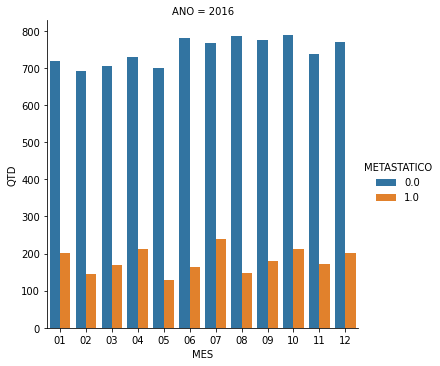

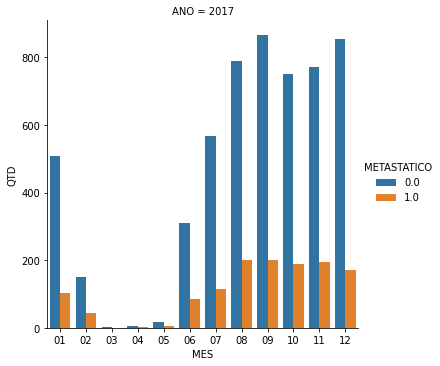

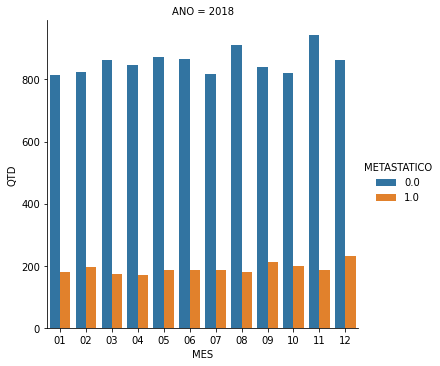

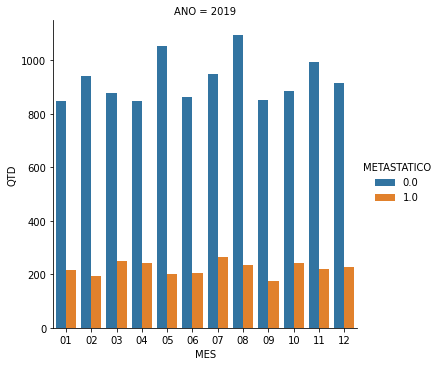

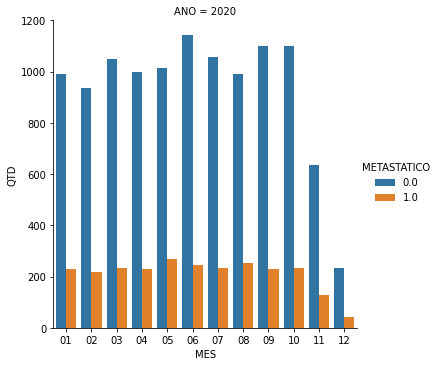

In [ ]:
graficoEstadoPorData(df_2, 'GO')

MARANHÃO

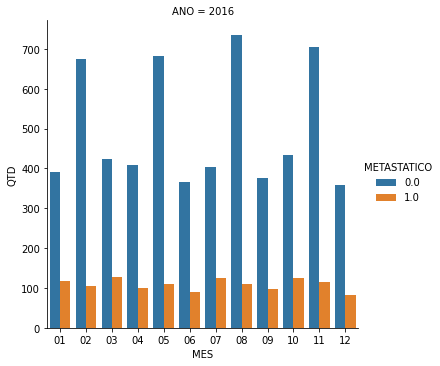

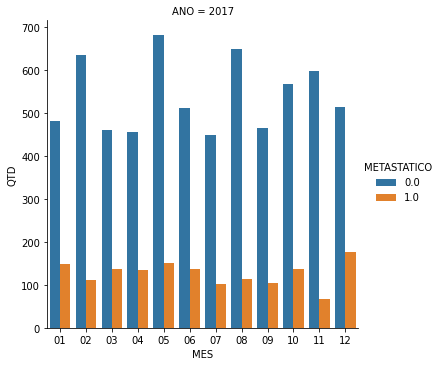

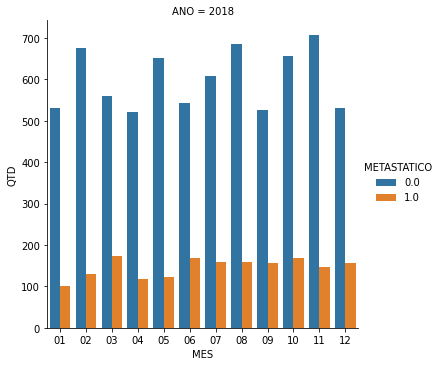

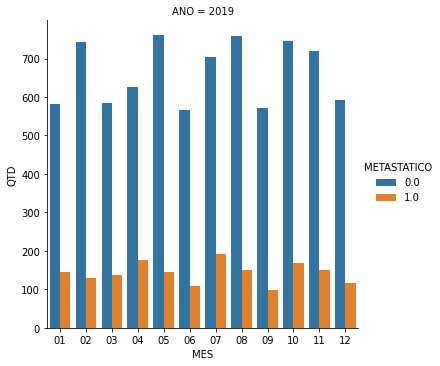

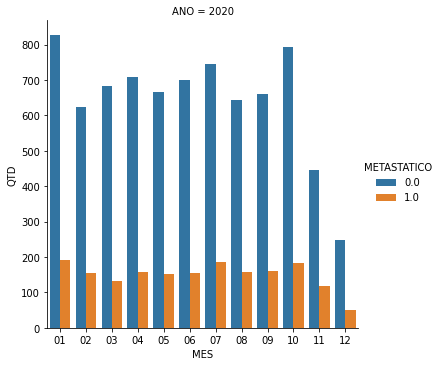

In [ ]:
graficoEstadoPorData(df_2, 'MA')

MINAS GERAIS

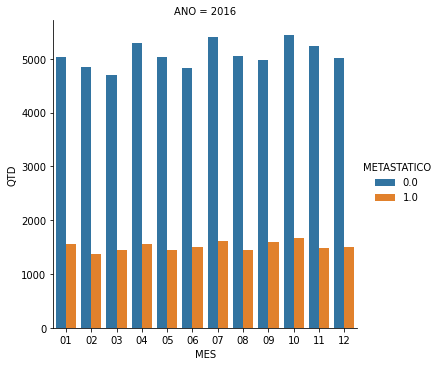

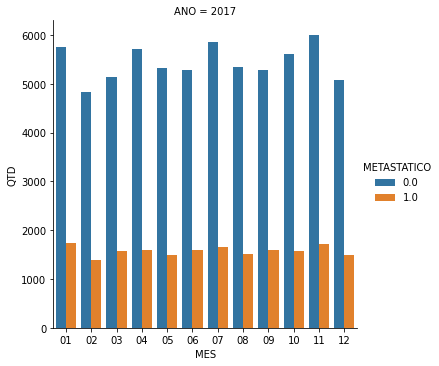

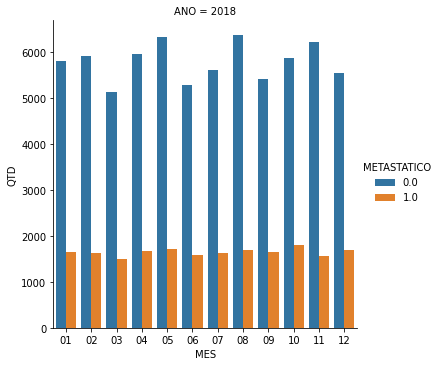

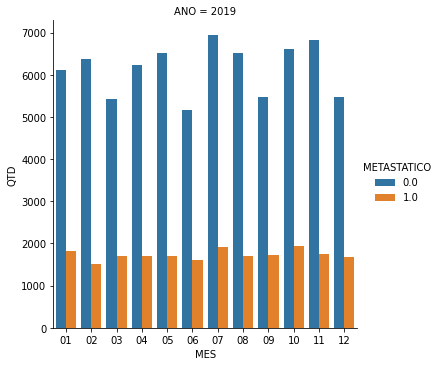

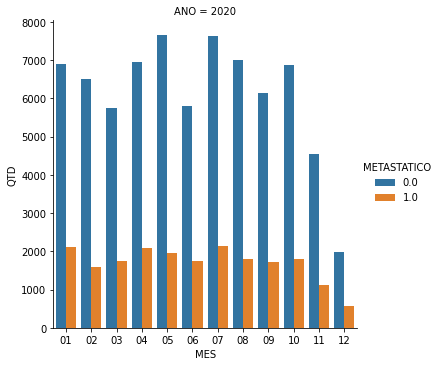

In [ ]:
graficoEstadoPorData(df_2, 'MG')

MATO GROSSO DO SUL

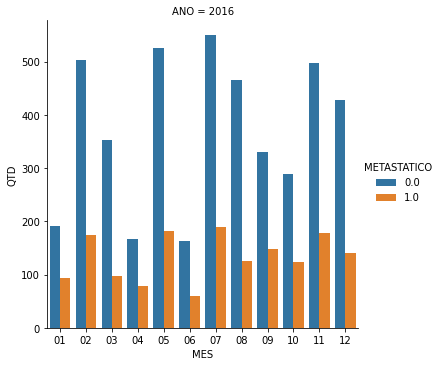

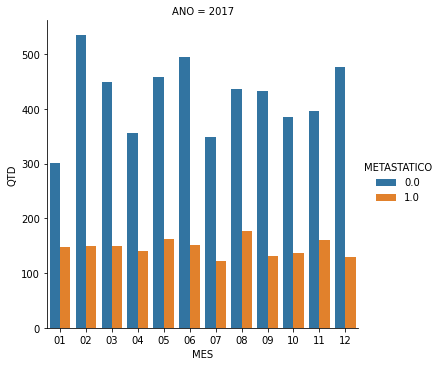

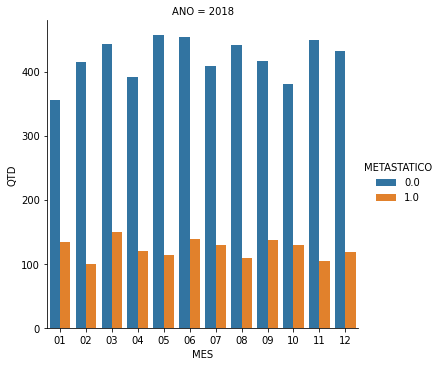

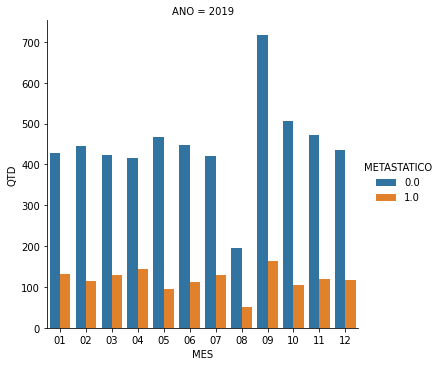

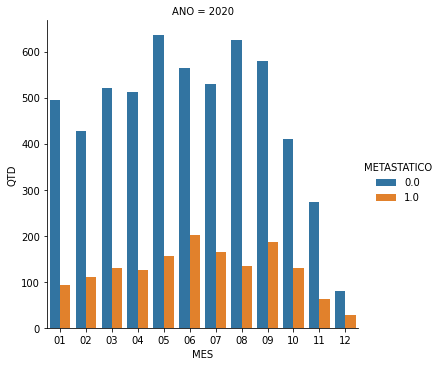

In [ ]:
graficoEstadoPorData(df_2, 'MS')

MATO GROSSO

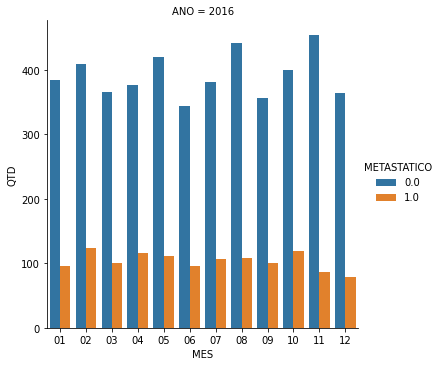

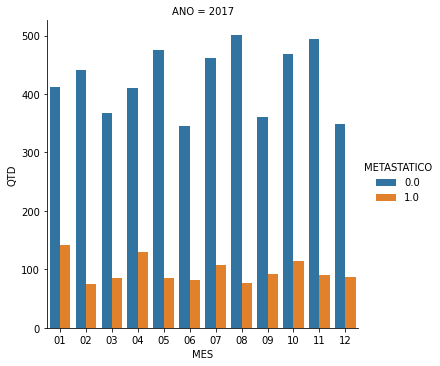

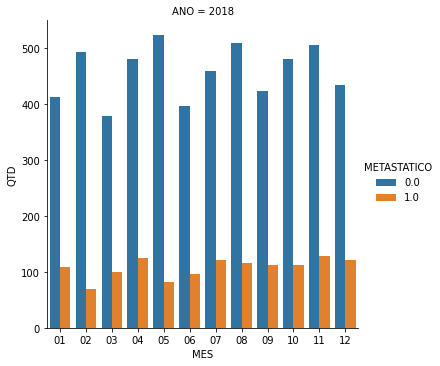

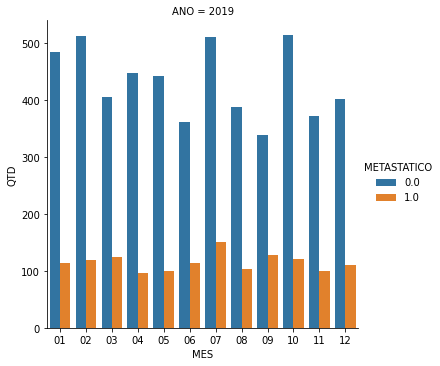

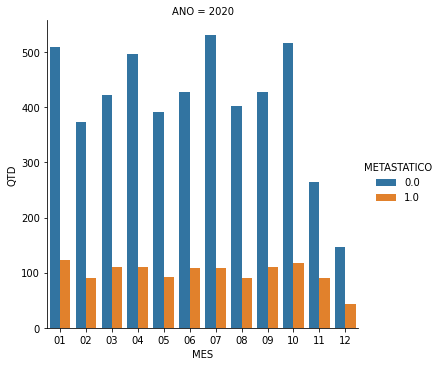

In [ ]:
graficoEstadoPorData(df_2, 'MT') 

PARÁ

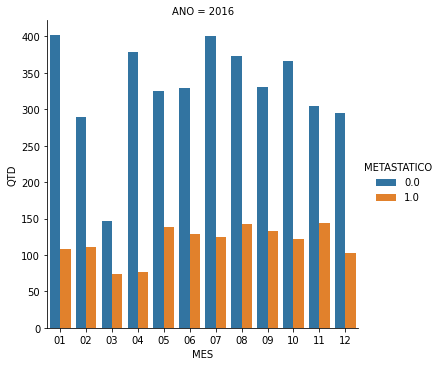

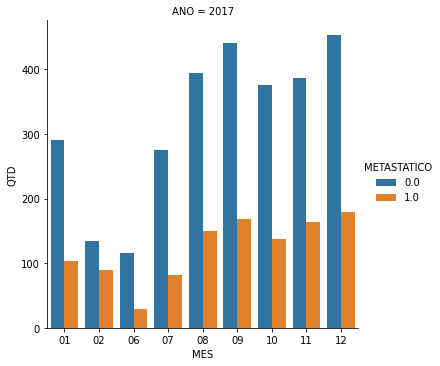

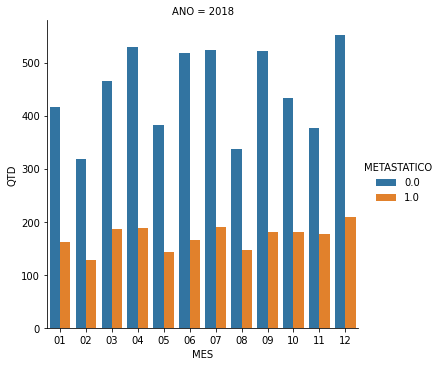

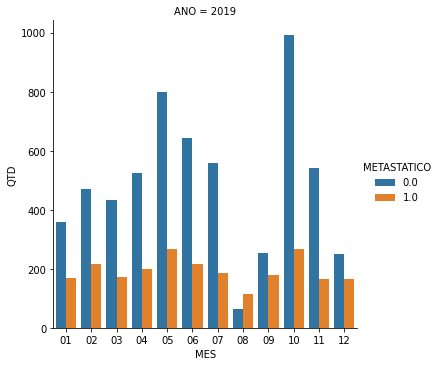

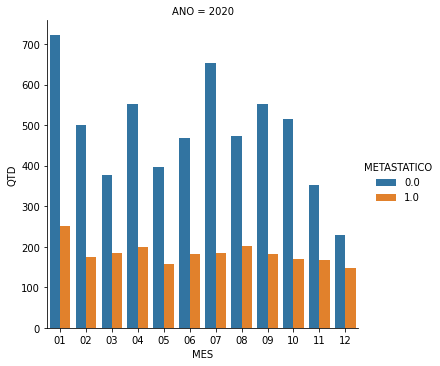

In [ ]:
graficoEstadoPorData(df_2, 'PA') 

PARAÍBA

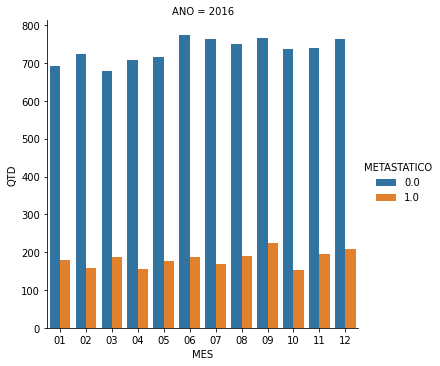

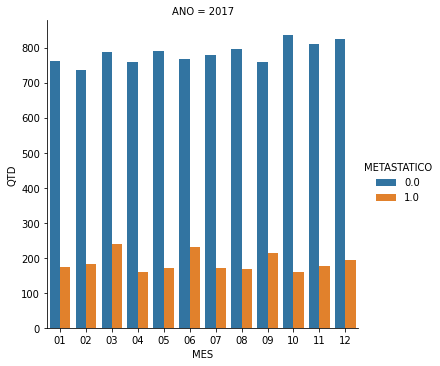

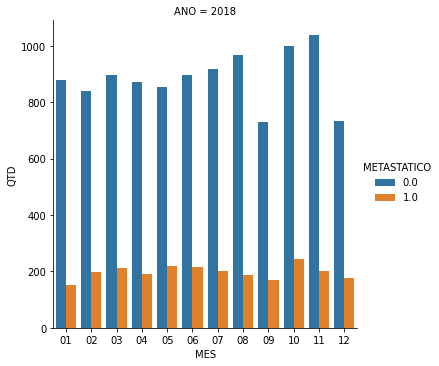

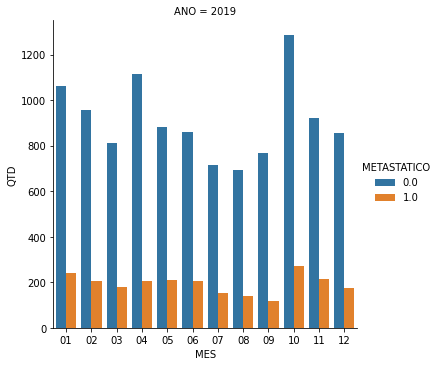

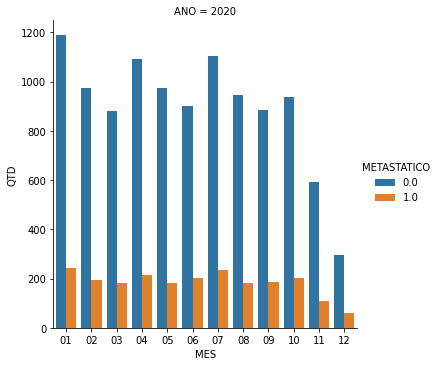

In [ ]:
graficoEstadoPorData(df_2, 'PB') 

PERNAMBUCO

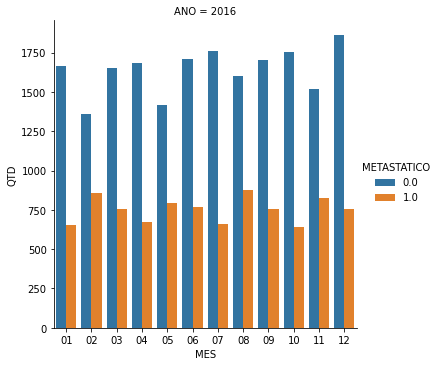

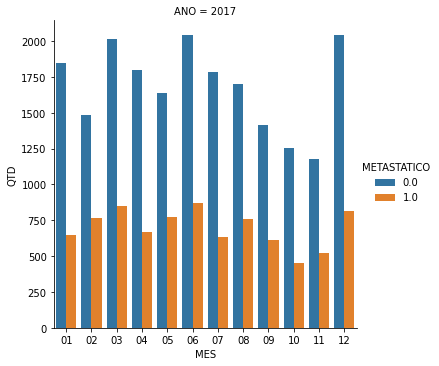

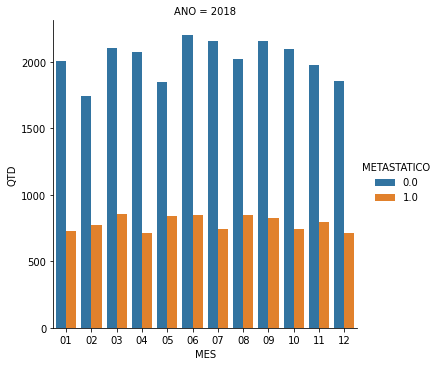

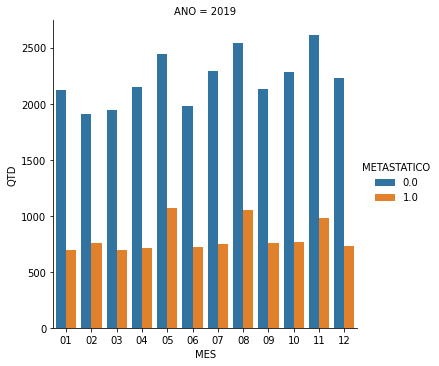

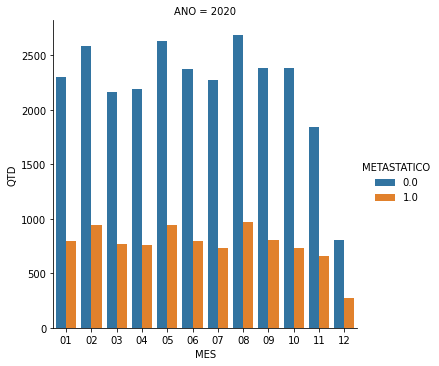

In [ ]:
graficoEstadoPorData(df_2, 'PE') 

PIAUÍ

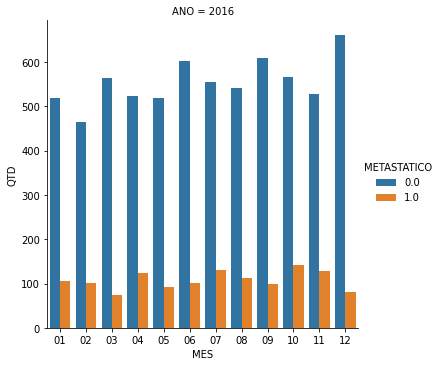

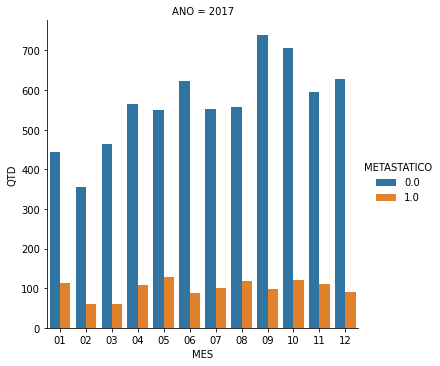

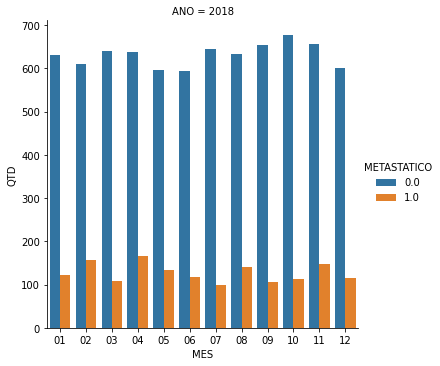

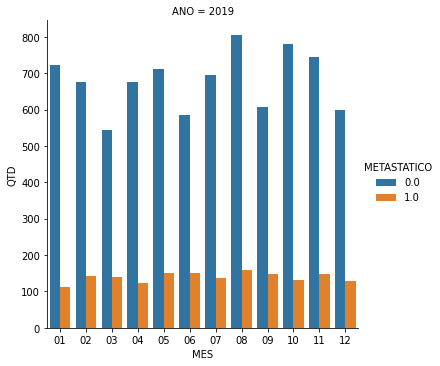

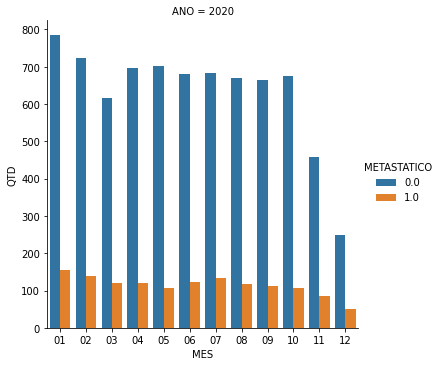

In [ ]:
graficoEstadoPorData(df_2, 'PI') 

PARANÁ

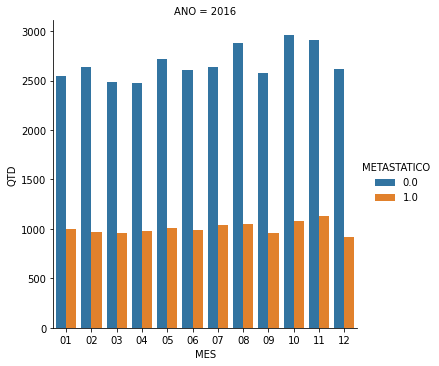

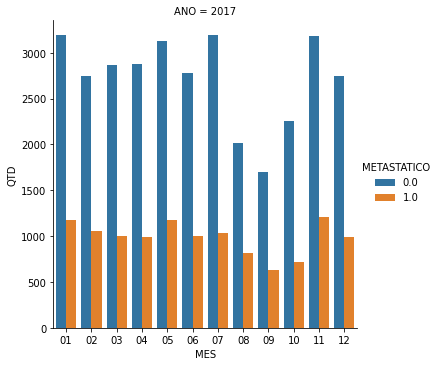

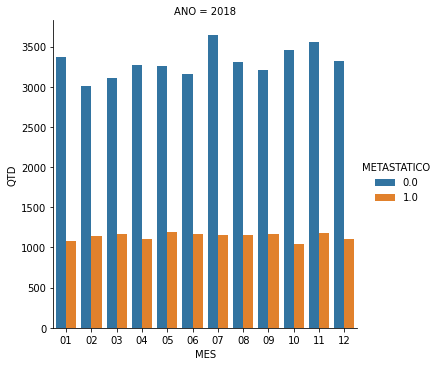

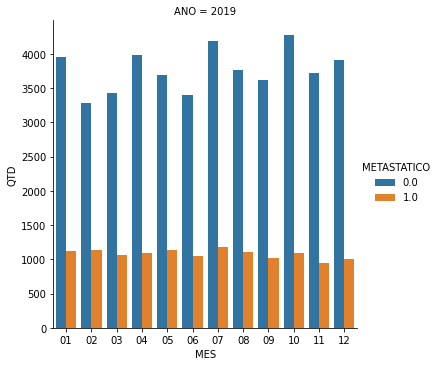

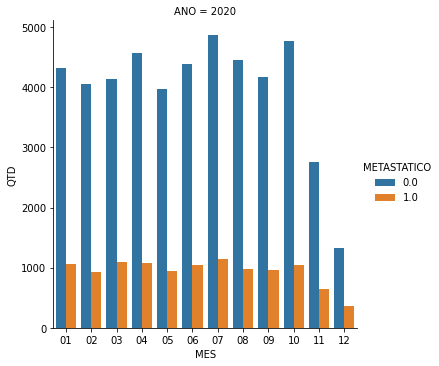

In [ ]:
graficoEstadoPorData(df_2, 'PR') 

RIO DE JANEIRO

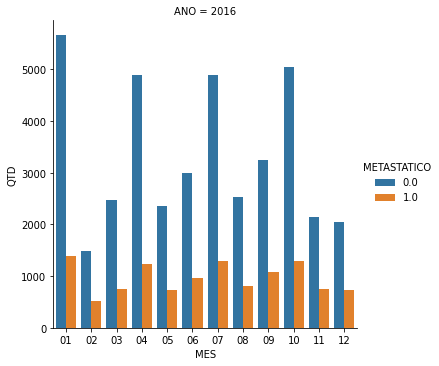

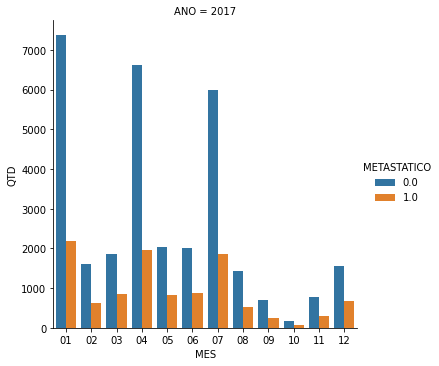

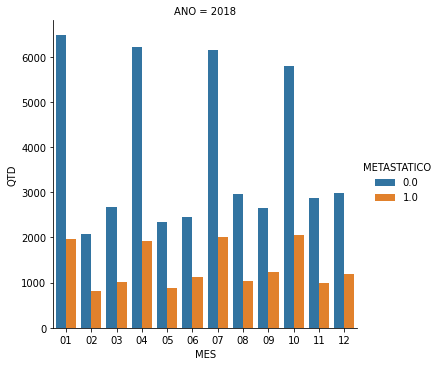

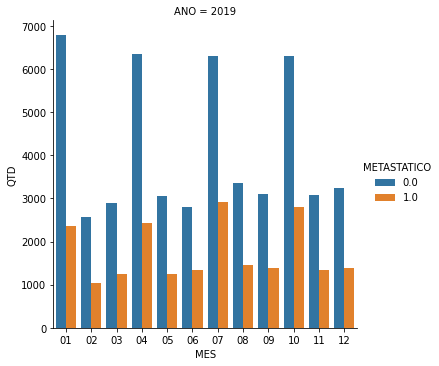

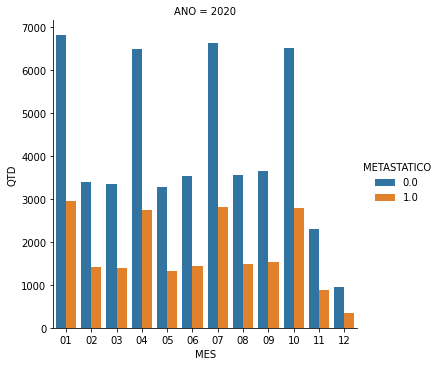

In [ ]:
graficoEstadoPorData(df_2, 'RJ') 

RIO GRANDE DO NORTE

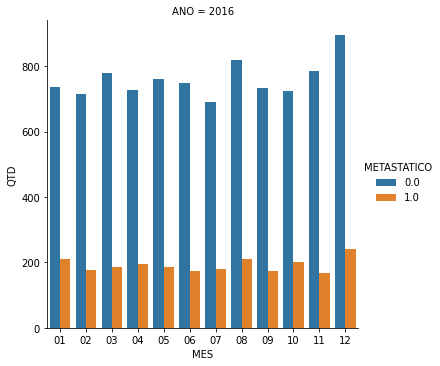

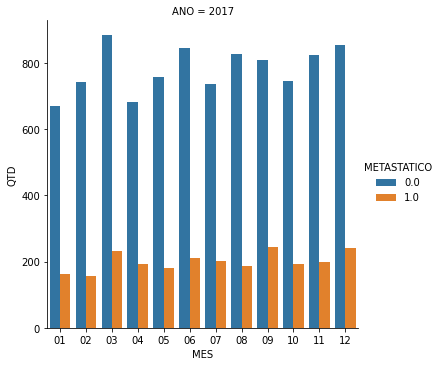

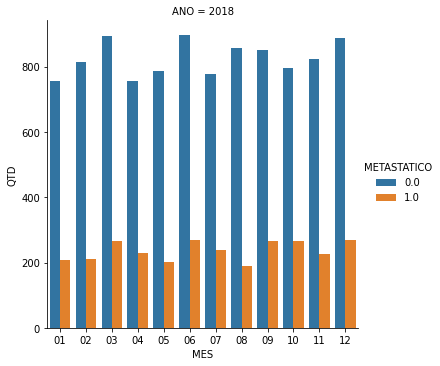

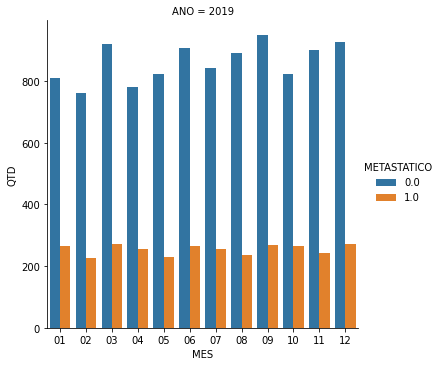

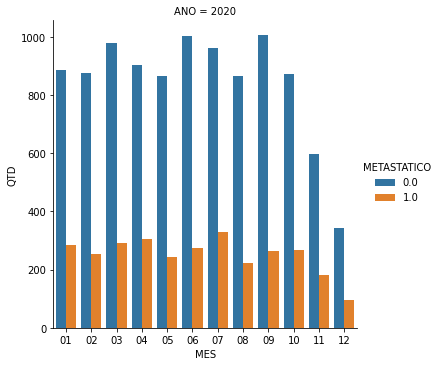

In [ ]:
graficoEstadoPorData(df_2, 'RN') 

RONDONIA

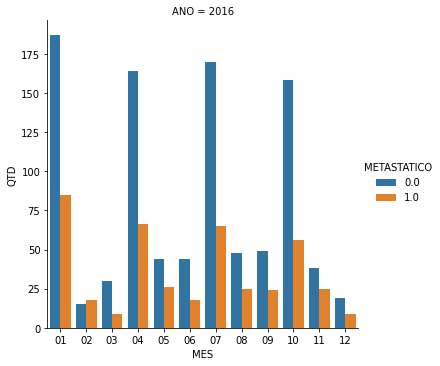

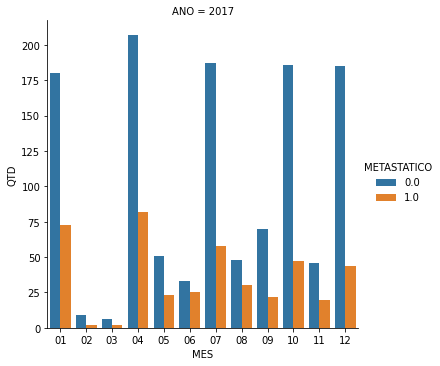

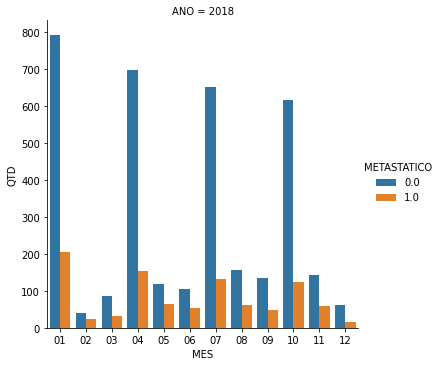

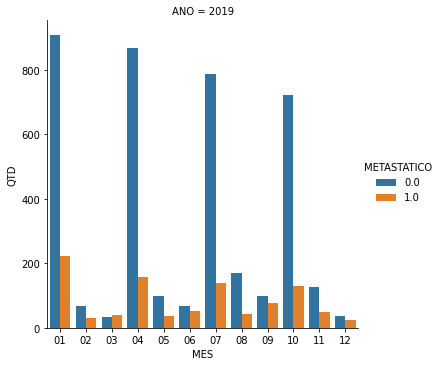

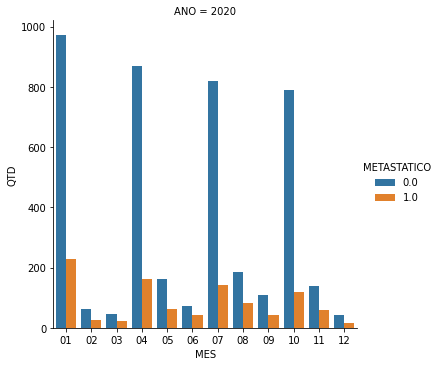

In [ ]:
graficoEstadoPorData(df_2, 'RO') 

RIO GRANDE DO SUL

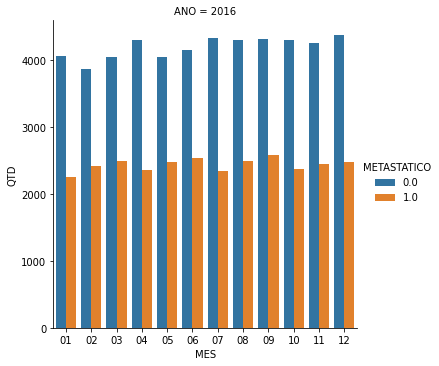

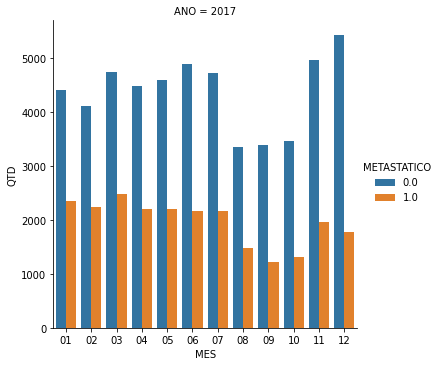

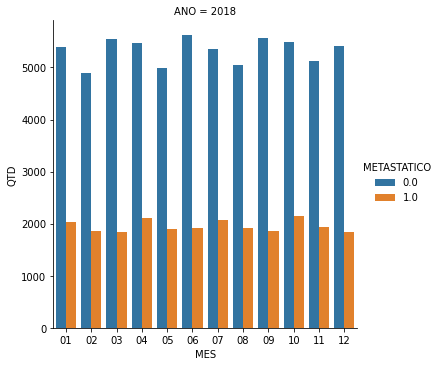

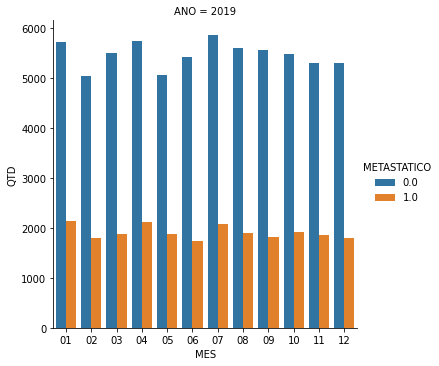

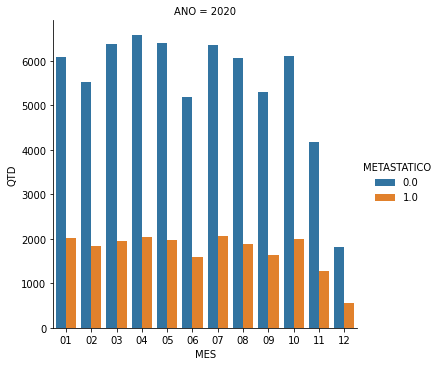

In [ ]:
graficoEstadoPorData(df_2, 'RS') 

SANTA CATARINA

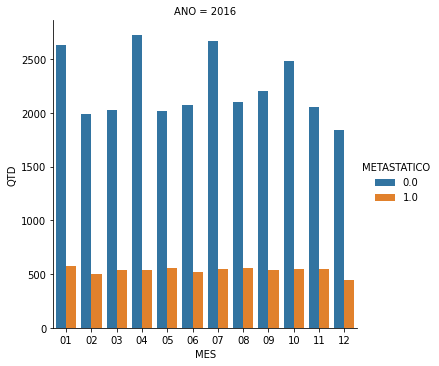

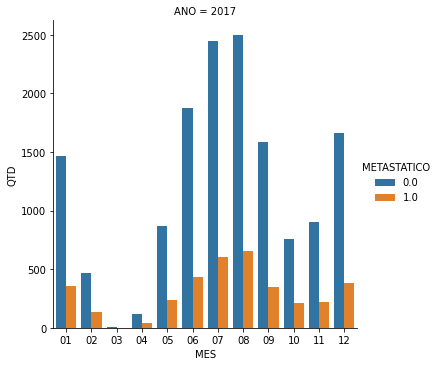

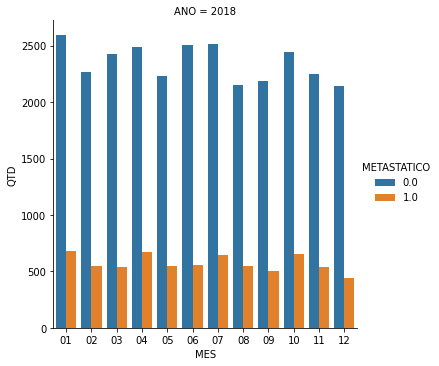

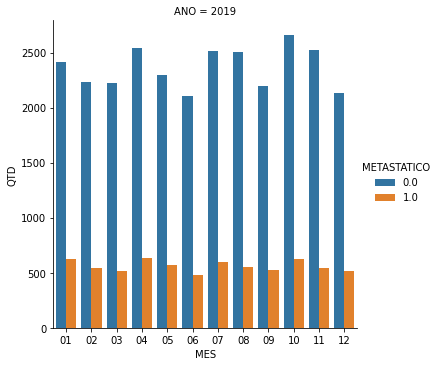

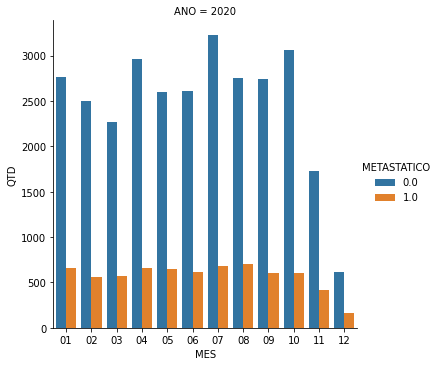

In [ ]:
graficoEstadoPorData(df_2, 'SC')	   


SERGIPE

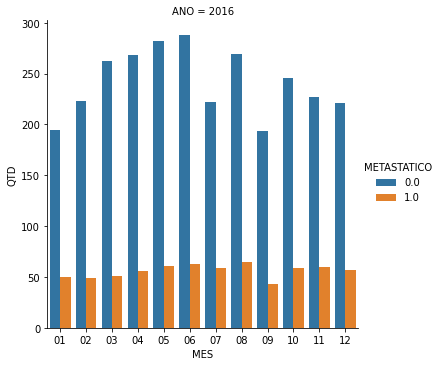

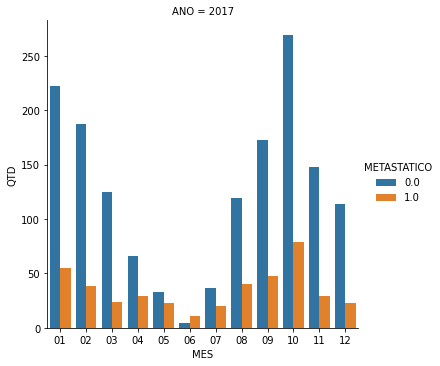

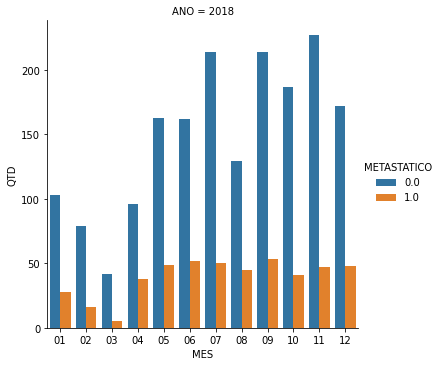

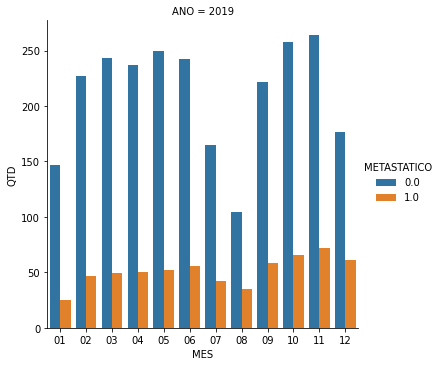

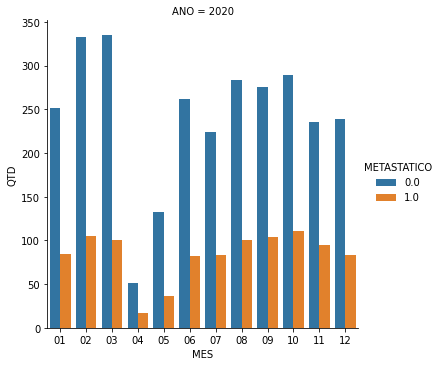

In [ ]:
graficoEstadoPorData(df_2, 'SE') 

SÃO PAULO

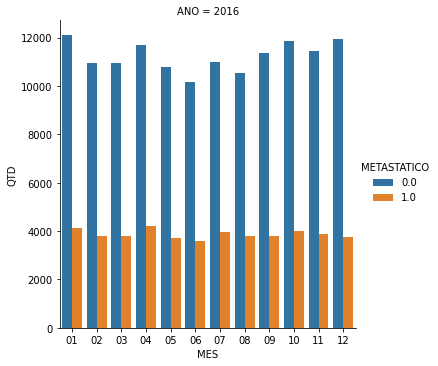

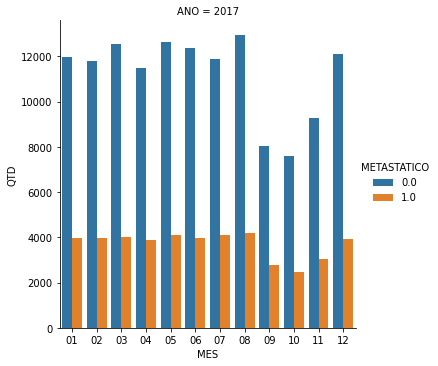

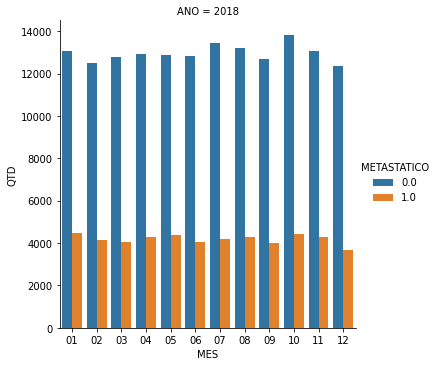

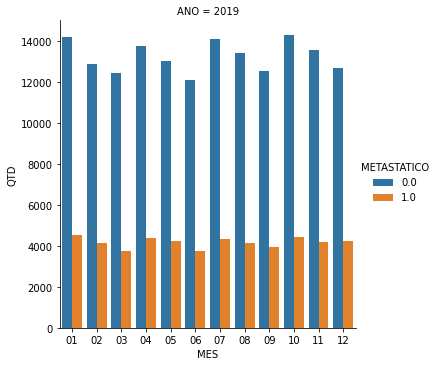

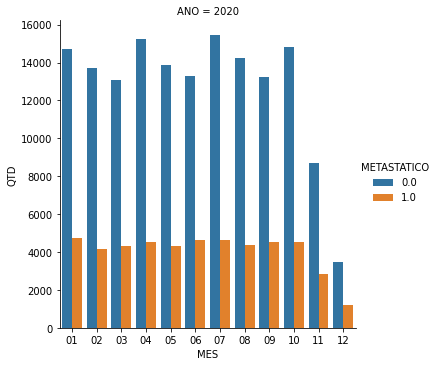

In [ ]:
graficoEstadoPorData(df_2, 'SP') 

TOCANTINS

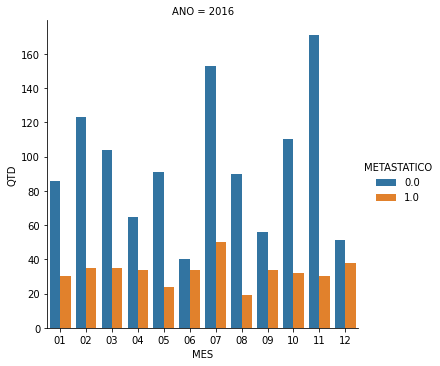

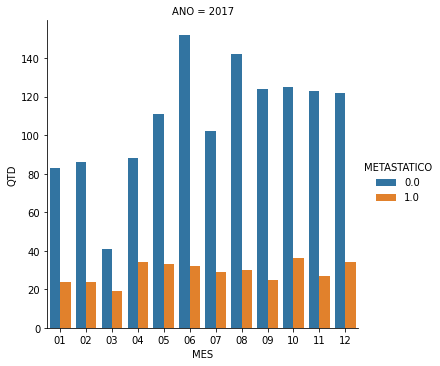

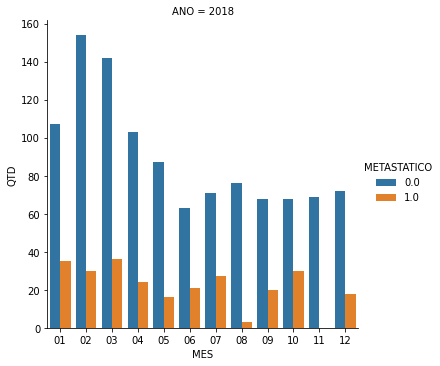

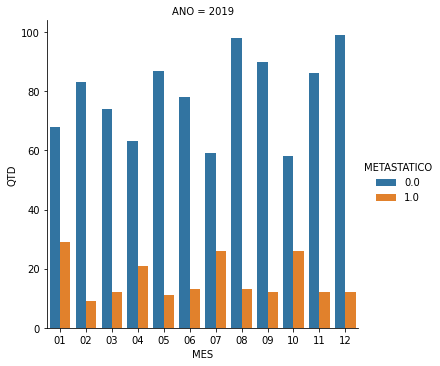

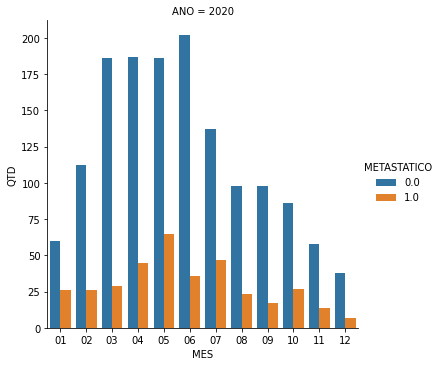

In [ ]:
graficoEstadoPorData(df_2, 'TO')